In [205]:
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
from gensim.models.word2vec import Word2Vec

In this section, you can decide which model for which corpus you want to use for your analysis. Here by default, it's the Academy corpus within the years 1720-2000. We tested over 10-year slides, it's clearly much less effective due to the small size of the French corpora.
After the load, put the path to your directory of models, and then select your range in "year in range".
This corpus seems much too small to be reliable however.

In [207]:
from collections import OrderedDict

models = OrderedDict([
    (year, Word2Vec.load('/home/odysseus/Téléchargements/hist-vec-master/acad/LemCorpAcad_models/{}.bin'.format(year)))
    for year in range(1720, 2000, 20)
])

In [208]:
def cosine_series(anchor, query):
    
    series = OrderedDict()
    
    for year, model in models.items():
        
        series[year] = (
            model.similarity(anchor, query)
            if query in model else 0
        )

    return series

In [209]:
import numpy as np
import statsmodels.api as sm

def lin_reg(series):

    x = np.array(list(series.keys()))
    y = np.array(list(series.values()))

    x = sm.add_constant(x)

    return sm.OLS(y, x).fit()

In [210]:
def plot_cosine_series(anchor, query, w=5, h=4):
    
    series = cosine_series(anchor, query)
    
    fit = lin_reg(series)

    x1 = list(series.keys())[0]
    x2 = list(series.keys())[-1]

    y1 = fit.predict()[0]
    y2 = fit.predict()[-1]
    
    print(query)
    
    plt.figure(figsize=(w, h))
    plt.ylim(0, 1)
    plt.title(query)
    plt.xlabel('Year')
    plt.ylabel('Similarity')
    plt.plot(list(series.keys()), list(series.values()))
    plt.plot([x1, x2], [y1, y2], color='gray', linewidth=0.5)
    plt.show()

The cell below (which calls the methods above), shows how two words differ from one another <b>through time</b>, with <b>cosine</b> similarity. Here, we show how "poésie" evolves compared to "littérature". You can manually change both below.

poésie


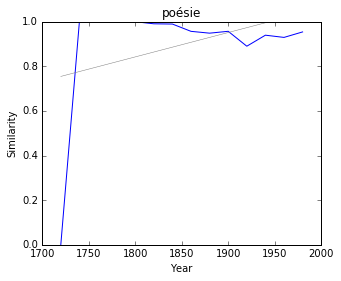

In [211]:
plot_cosine_series('littérature', 'poésie')

The two next cells get the 200 most similar terms to a specific term, from the training models, here "littérature".

In [212]:
def union_neighbor_vocab(anchor, topn=200):
    
    vocab = set()
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocab.update([s[0] for s in similar])
        
    return vocab

At this point, we'll do the same thing as above, and calculate, for each token in the 200 nearest terms to the main entry, the <b>proximity</b> of this term and its <b>significance</b>. The significance is calculated with the p value, that is to say that, below a certain threshold (0.05) we have a strong likelyhood that the result is sure and significant.

In [213]:
testList = ('littérature', 'science', 'savoir', 'histoire', 'lettre', 'critique', 'esprit', 'langue', 'politique', 
            'pouvoir', 'droit', 'loi', 'génie')
entries={}

for word in testList:
    data = []
    for token in union_neighbor_vocab(word):
    
        series = cosine_series('littérature', token)
        fit = lin_reg(series)
    
        if fit.pvalues[1] < 0.05:
            data.append((token, fit.params[1], fit.pvalues[1]))
    entries[word]=data

# Increasing

In this part, we want to show what terms <b>emerge</b> more and more with the main entry, that is to say each word of the given test list. The <b>"slope"</b> is the degree of progress, and the <b>"p" value</b> its efficiency. So here, the main emergence with "littérature" which is significant is "humanisme". All terms seem to be significant, except "fédéralisme", "welschinger", "maniere", "hennet", "réapparition", "deffence", "bourgin", "colonie", "naturalisme", "réalisme", "sillery", "gréco", "compétence", "symbolisme", "catholique", "japonais", "manuel", "romand", "topographie, "organisme", "prédominance". That is to say that those terms can be nearest, but that statistically they are not significant enough to be sure, while the others are more certain.

In this following cell, we show how the top ten most similar vectors change through time compared to the words in the test list : "humanisme" for example seems to be very rare before 1860, and then becomes more and more similar to "littérature". Those show the terms that were not similar in the beginning, but <b>tend to be more and more related</b> to "littérature". You should keep in mind the p values associated to each vector.

### <i><b>littérature</i></b>

              token     slope         p
219          métier  0.004854  0.000034
684            rêve  0.004845  0.000065
107         formule  0.004795  0.000036
174  responsabilité  0.004721  0.000064
74        romancier  0.004715  0.000043
89         aventure  0.004714  0.000092
528       certitude  0.004710  0.000023
292          vision  0.004686  0.000091
800         essence  0.004683  0.000052
563           souci  0.004681  0.000070



métier


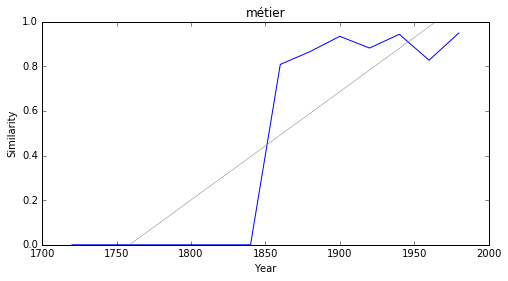

rêve


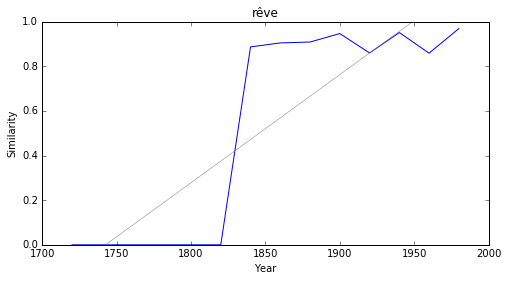

formule


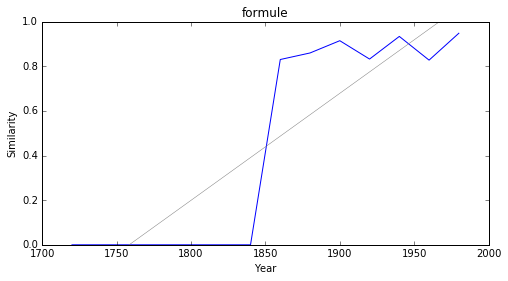

responsabilité


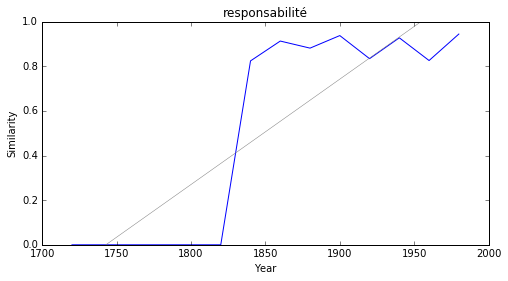

romancier


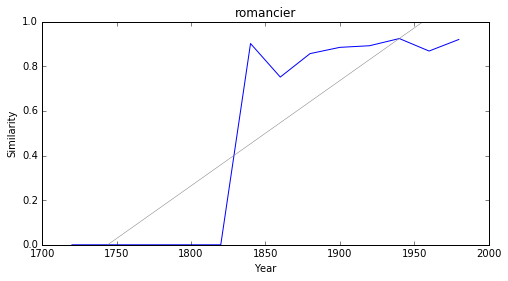

aventure


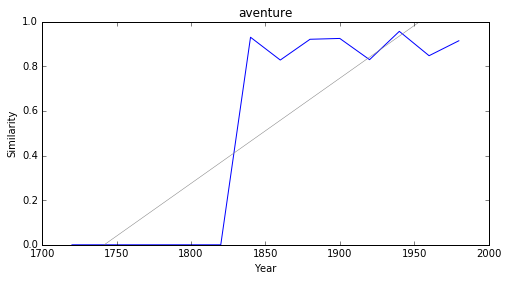

certitude


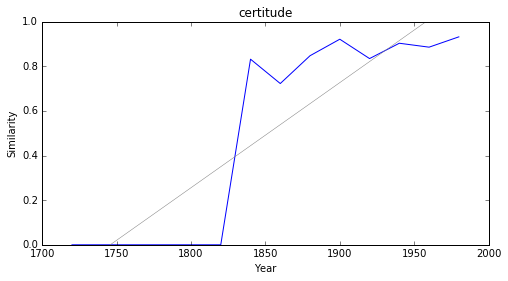

vision


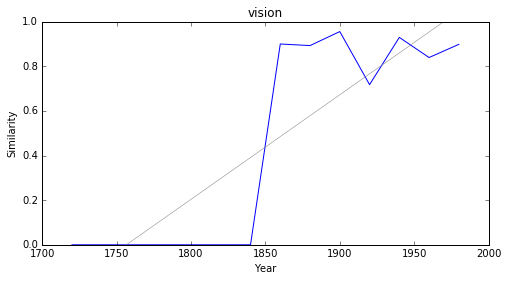

essence


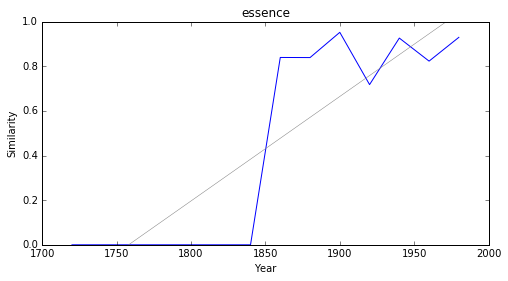

souci


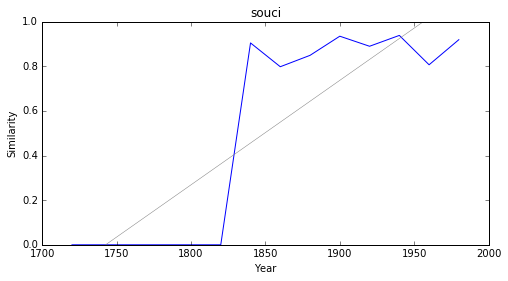

### <i><b>science</i></b>

              token     slope         p
213          métier  0.004854  0.000034
648            rêve  0.004845  0.000065
173  responsabilité  0.004721  0.000064
76        romancier  0.004715  0.000043
88         aventure  0.004714  0.000092
282          vision  0.004686  0.000091
775         essence  0.004683  0.000052
281           thème  0.004682  0.000056
531           souci  0.004681  0.000070
6              pire  0.004678  0.000020



métier


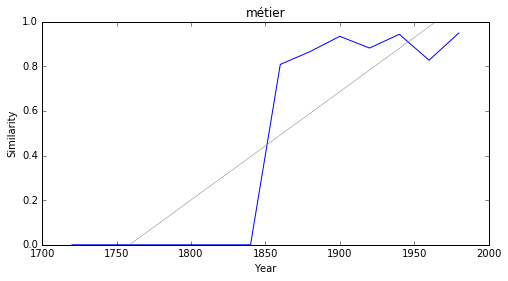

rêve


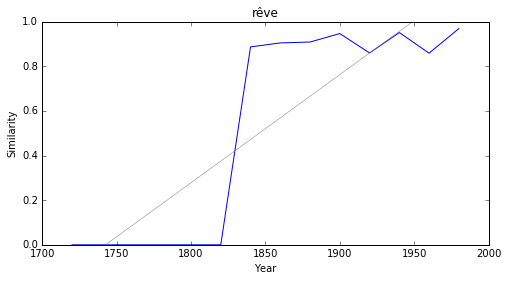

responsabilité


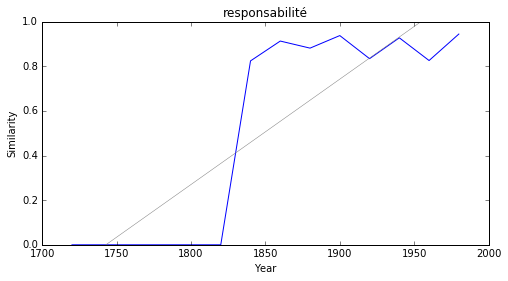

romancier


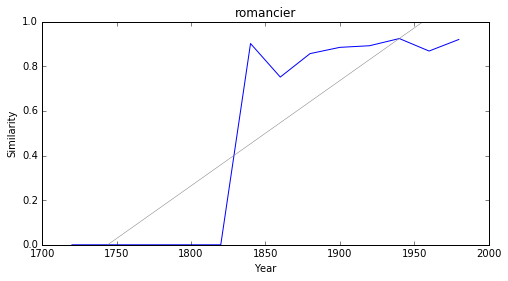

aventure


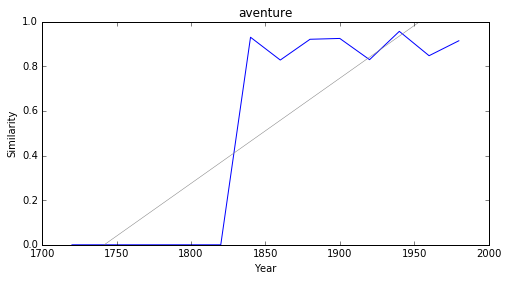

vision


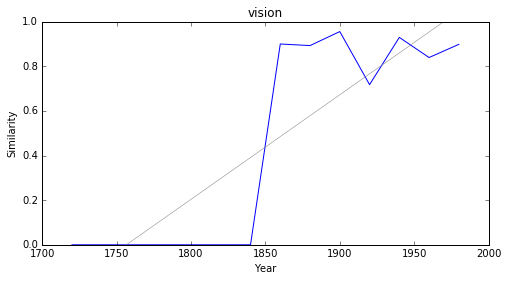

essence


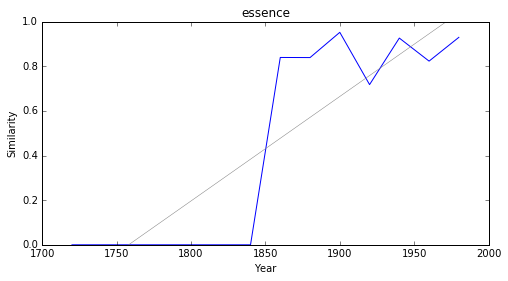

thème


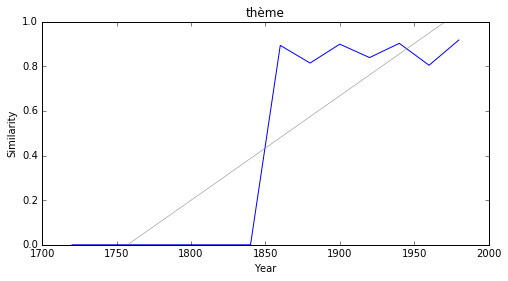

souci


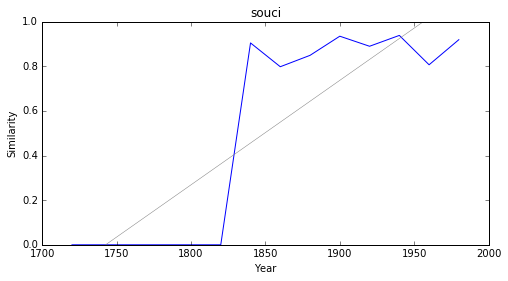

pire


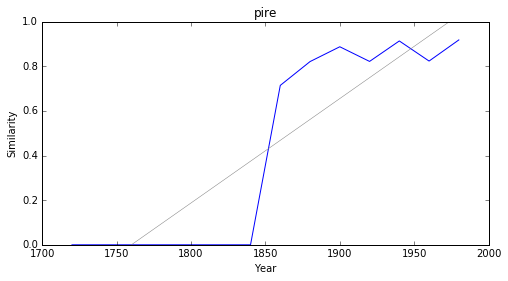

### <i><b>savoir</i></b>

           token     slope         p
275      définir  0.004642  0.000008
384          cas  0.004595  0.000026
230        néant  0.004587  0.000067
537        façon  0.004580  0.000025
290  précisément  0.004540  0.000007
227   passionner  0.004454  0.000064
380      réjouir  0.004432  0.000025
149       battre  0.004408  0.000100
163     affirmer  0.004393  0.000012
67        quelqu  0.004380  0.000059



définir


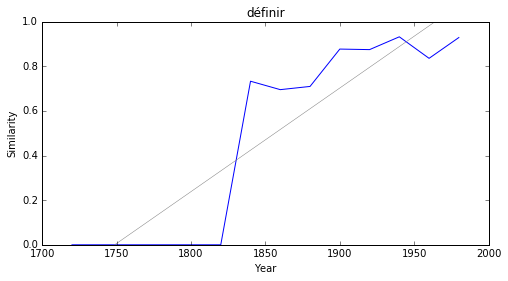

cas


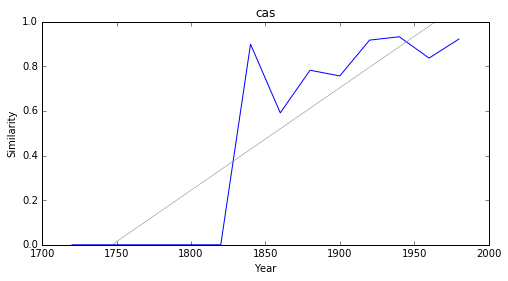

néant


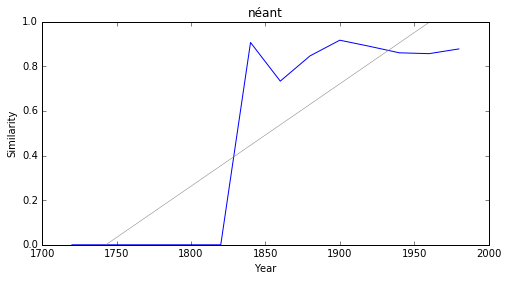

façon


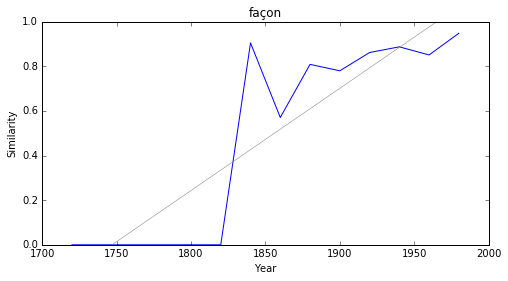

précisément


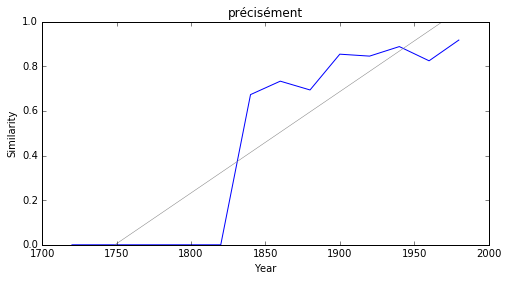

passionner


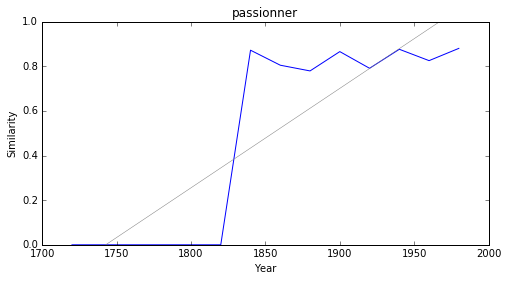

réjouir


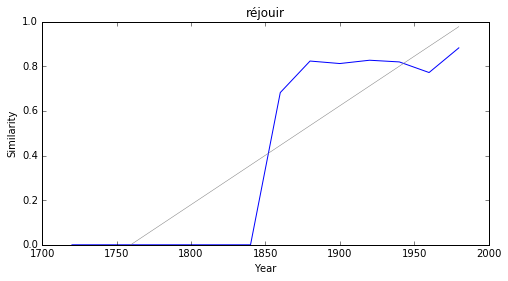

battre


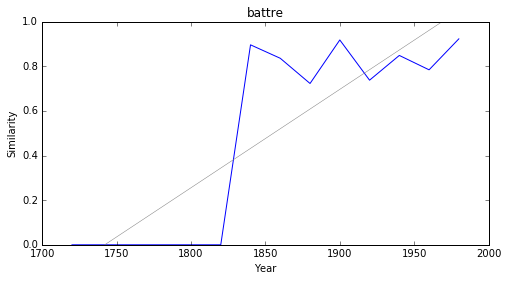

affirmer


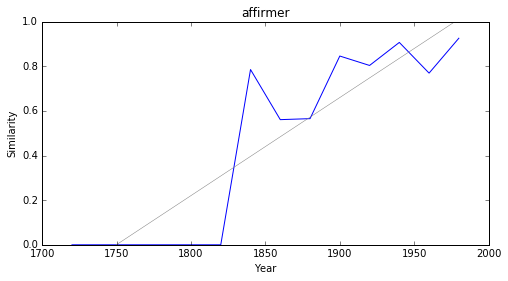

quelqu


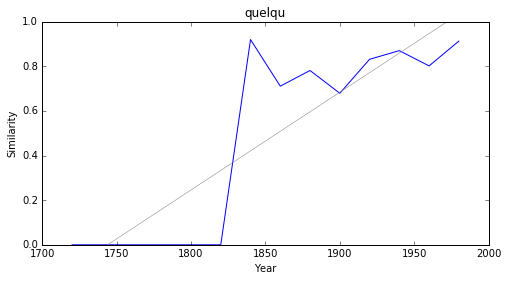

### <i><b>histoire</i></b>

            token     slope         p
677          rêve  0.004845  0.000065
80      romancier  0.004715  0.000043
94       aventure  0.004714  0.000092
294        vision  0.004686  0.000091
793       essence  0.004683  0.000052
293         thème  0.004682  0.000056
4            pire  0.004678  0.000020
360       légende  0.004659  0.000049
383  personnalité  0.004650  0.000067
240      mystique  0.004640  0.000083



rêve


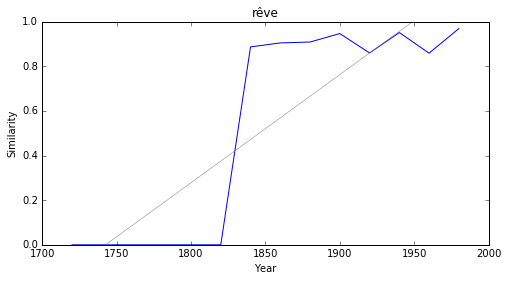

romancier


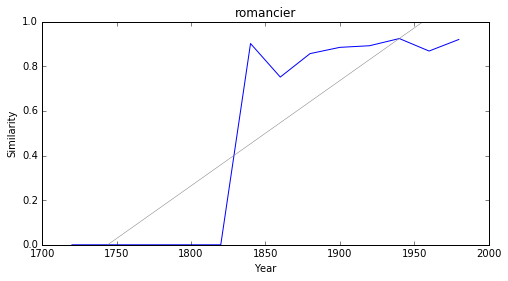

aventure


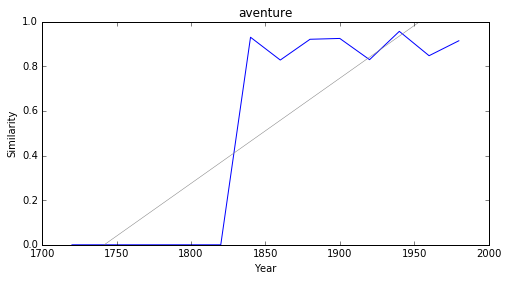

vision


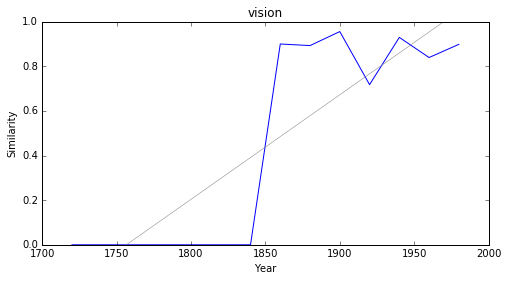

essence


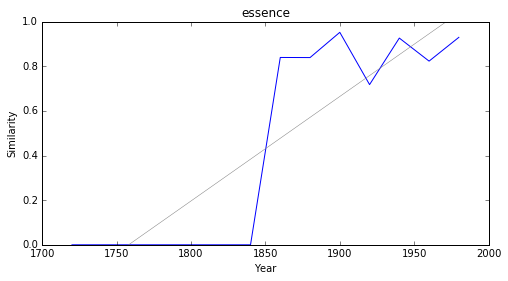

thème


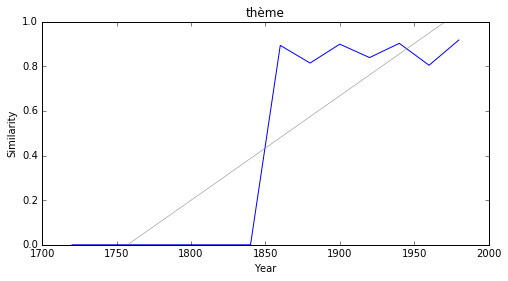

pire


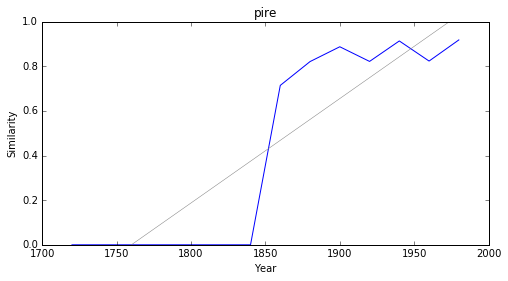

légende


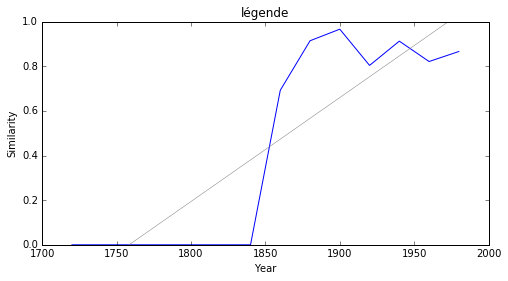

personnalité


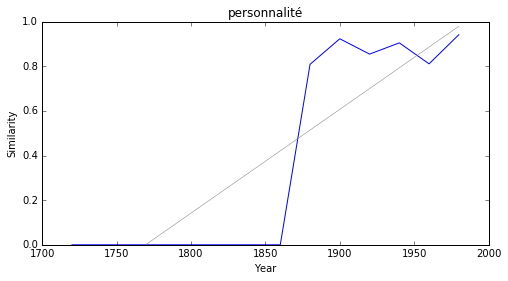

mystique


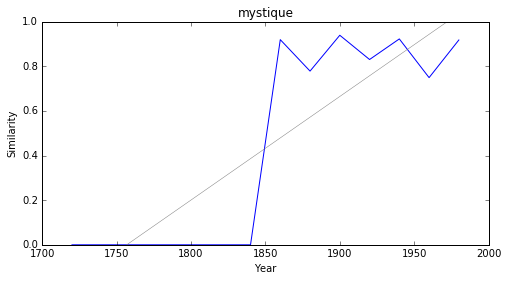

### <i><b>lettre</i></b>

         token     slope         p
259     métier  0.004854  0.000034
858       rêve  0.004845  0.000065
21   romancier  0.004715  0.000043
23    aventure  0.004714  0.000092
820  certitude  0.004710  0.000023
757     vision  0.004686  0.000091
756      thème  0.004682  0.000056
599      souci  0.004681  0.000070
452  tentation  0.004674  0.000031
533    légende  0.004659  0.000049



métier


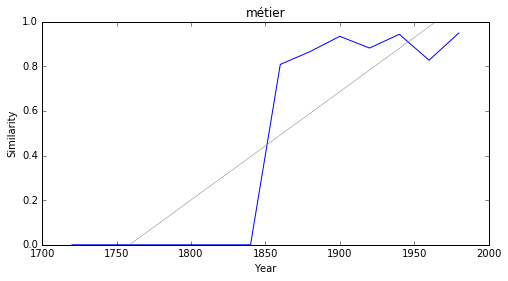

rêve


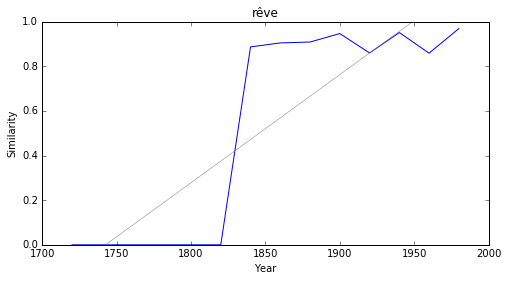

romancier


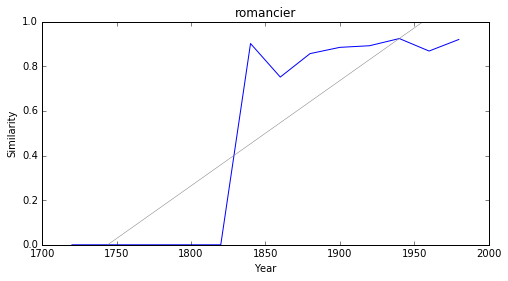

aventure


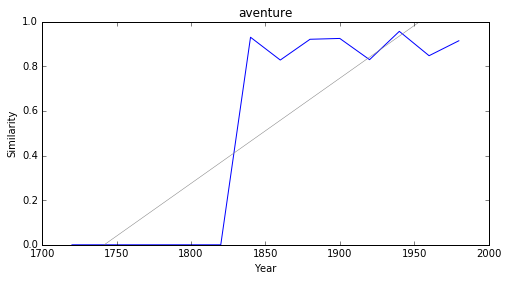

certitude


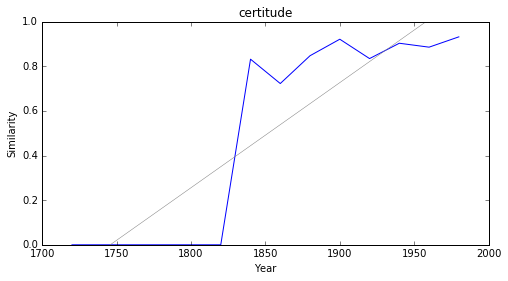

vision


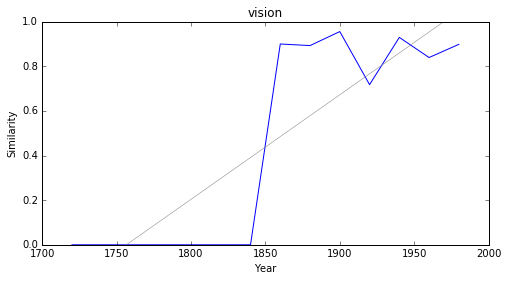

thème


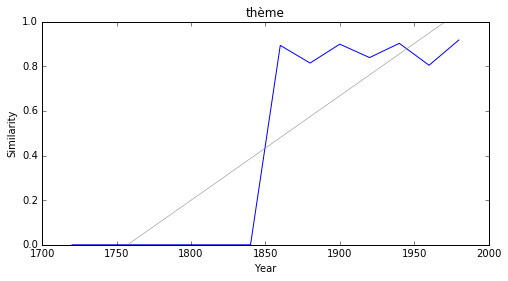

souci


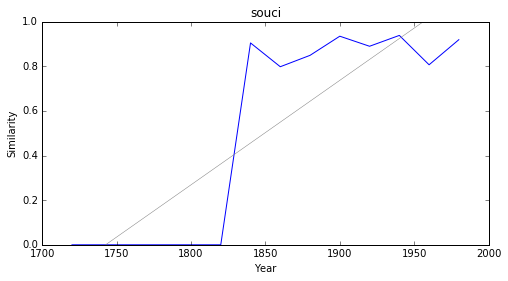

tentation


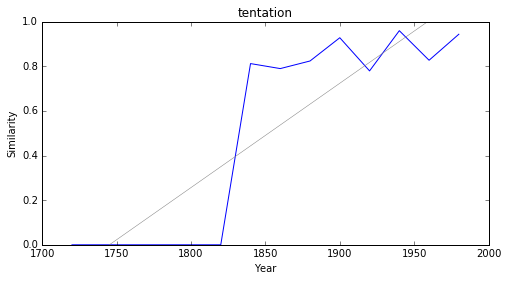

légende


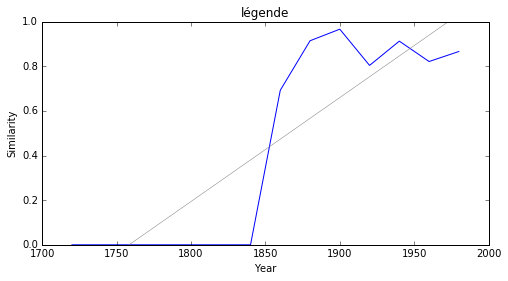

### <i><b>critique</i></b>

         token     slope         p
292     métier  0.004854  0.000034
945       rêve  0.004845  0.000065
768    formule  0.004795  0.000036
23   romancier  0.004715  0.000043
27    aventure  0.004714  0.000092
890  certitude  0.004710  0.000023
399     proche  0.004693  0.000046
825     vision  0.004686  0.000091
234    essence  0.004683  0.000052
824      thème  0.004682  0.000056



métier


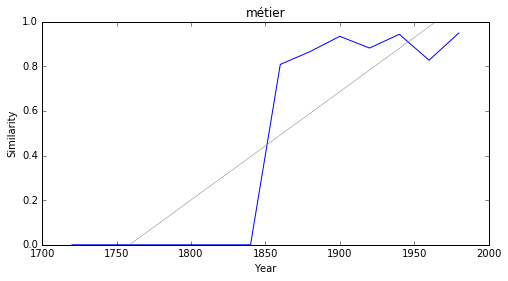

rêve


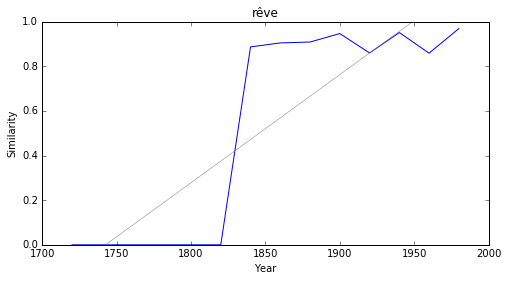

formule


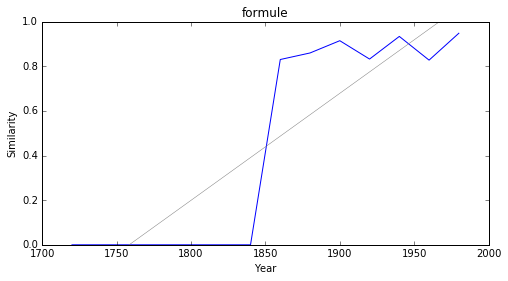

romancier


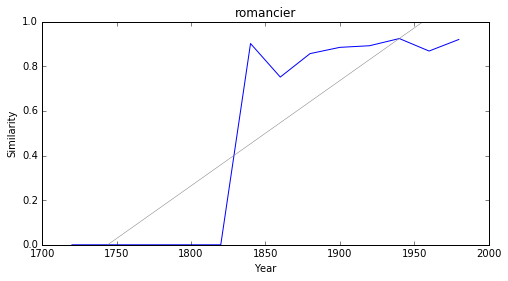

aventure


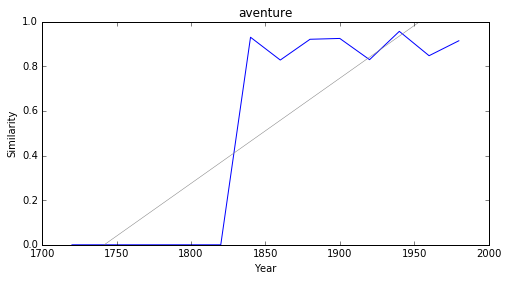

certitude


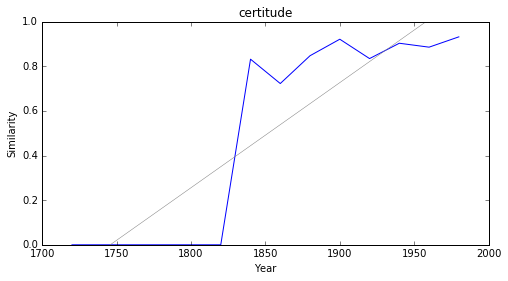

proche


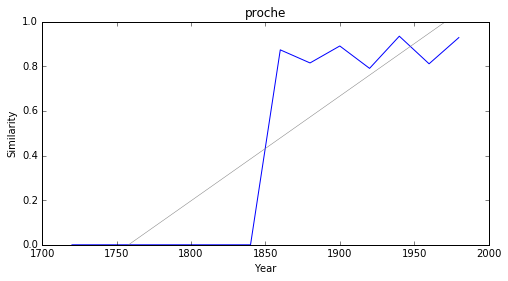

vision


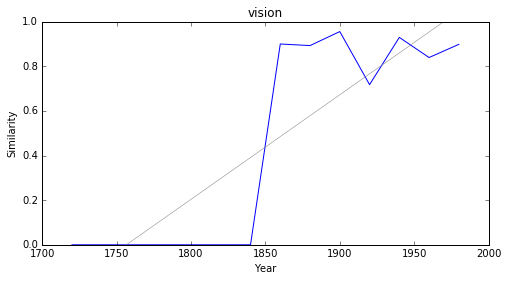

essence


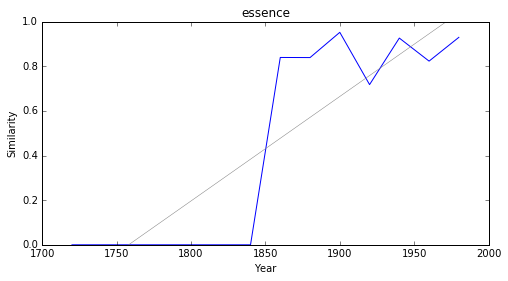

thème


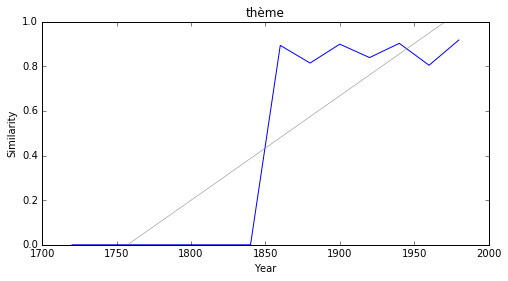

### <i><b>esprit</i></b>

              token     slope         p
188          métier  0.004854  0.000034
584            rêve  0.004845  0.000065
151  responsabilité  0.004721  0.000064
67        romancier  0.004715  0.000043
79         aventure  0.004714  0.000092
241          vision  0.004686  0.000091
688         essence  0.004683  0.000052
471           souci  0.004681  0.000070
59        tentation  0.004674  0.000031
610           somme  0.004669  0.000034



métier


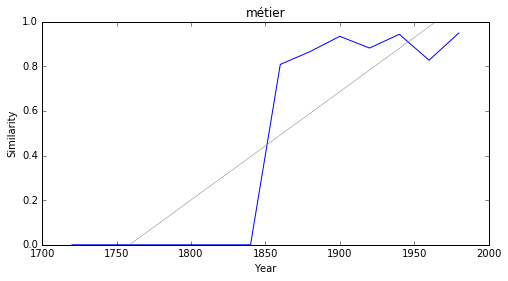

rêve


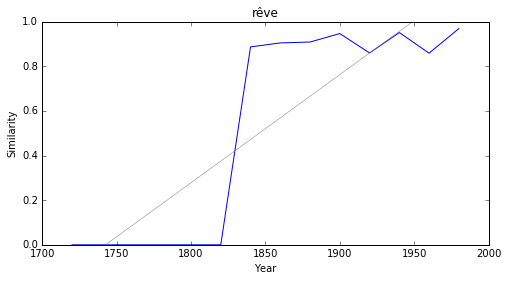

responsabilité


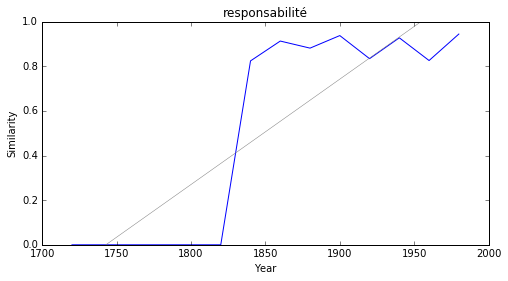

romancier


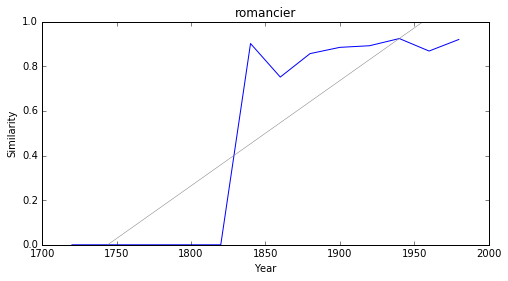

aventure


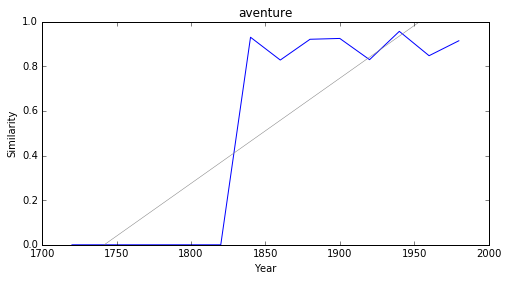

vision


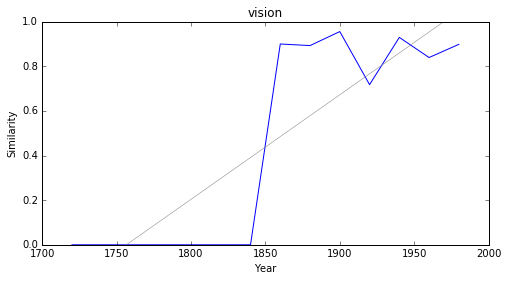

essence


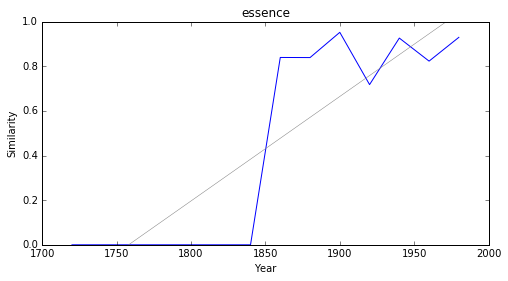

souci


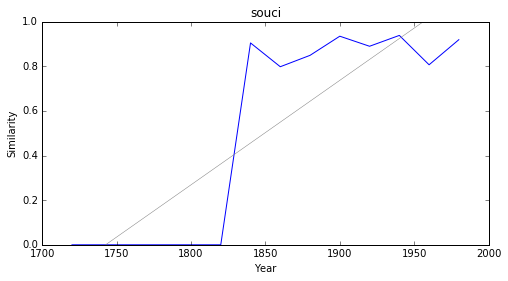

tentation


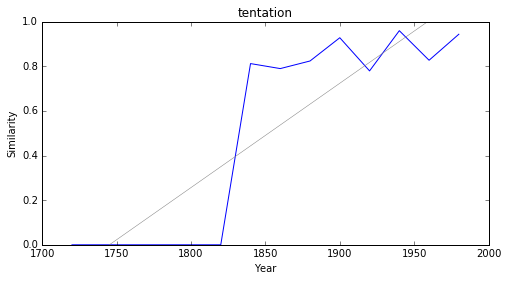

somme


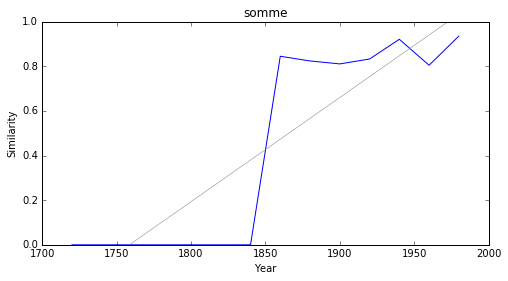

### <i><b>langue</i></b>

              token     slope         p
220          métier  0.004854  0.000034
677            rêve  0.004845  0.000065
180  responsabilité  0.004721  0.000064
81        romancier  0.004715  0.000043
95         aventure  0.004714  0.000092
524       certitude  0.004710  0.000023
292          vision  0.004686  0.000091
792         essence  0.004683  0.000052
291           thème  0.004682  0.000056
555           souci  0.004681  0.000070



métier


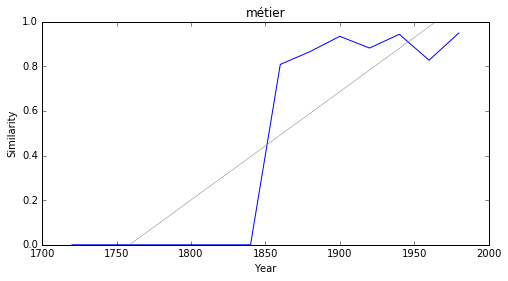

rêve


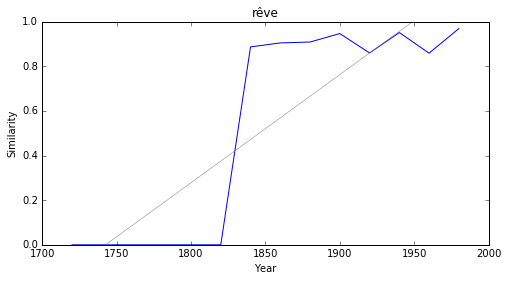

responsabilité


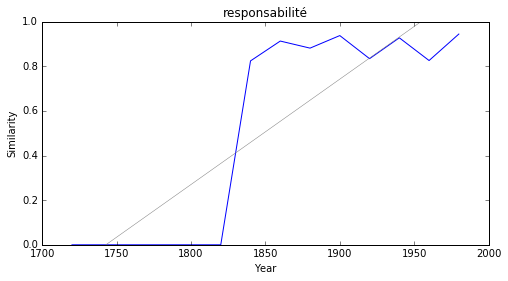

romancier


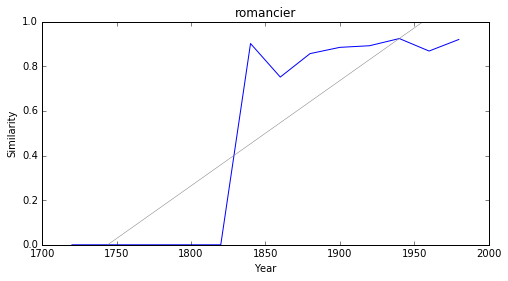

aventure


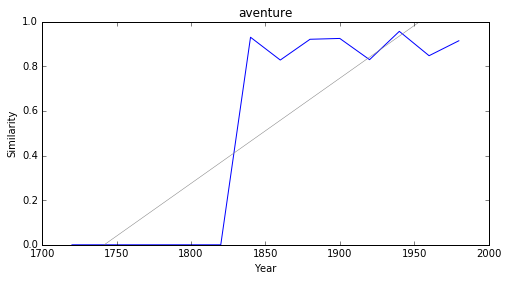

certitude


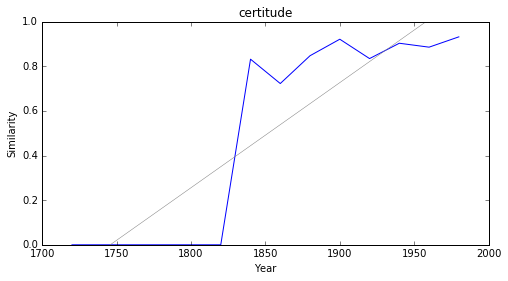

vision


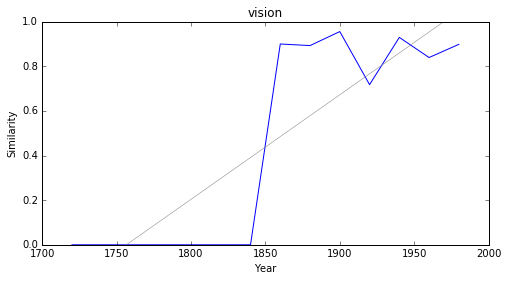

essence


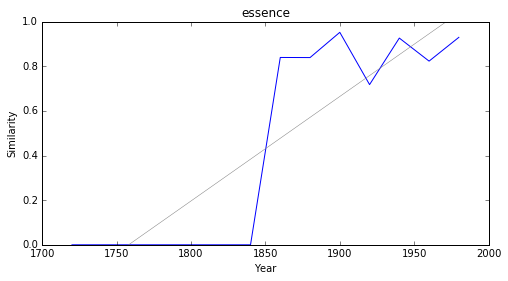

thème


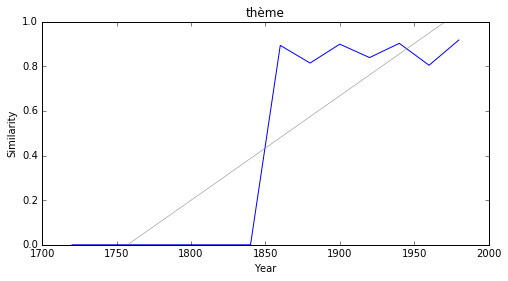

souci


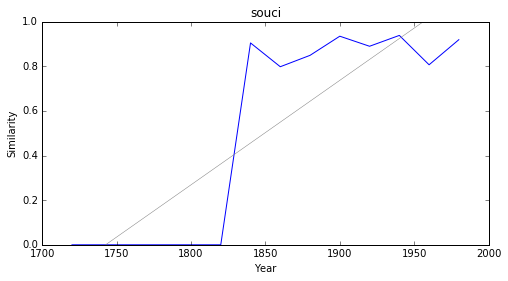

### <i><b>politique</i></b>

              token     slope         p
188  responsabilité  0.004721  0.000064
99         aventure  0.004714  0.000092
300          vision  0.004686  0.000091
830         essence  0.004683  0.000052
577           souci  0.004681  0.000070
6              pire  0.004678  0.000020
738           somme  0.004669  0.000034
360         légende  0.004659  0.000049
699         symbole  0.004656  0.000094
241        mystique  0.004640  0.000083



responsabilité


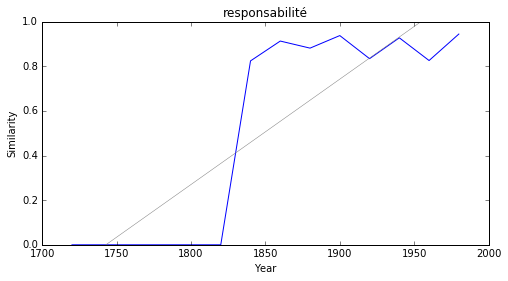

aventure


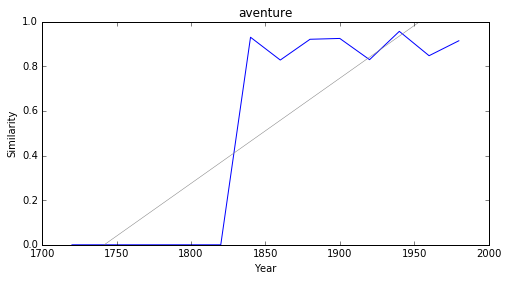

vision


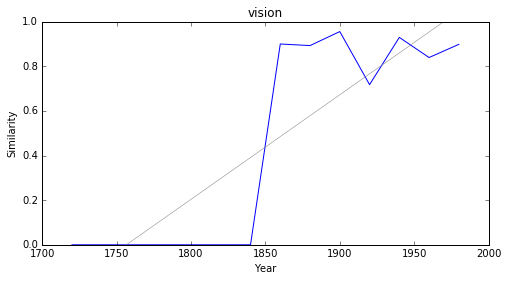

essence


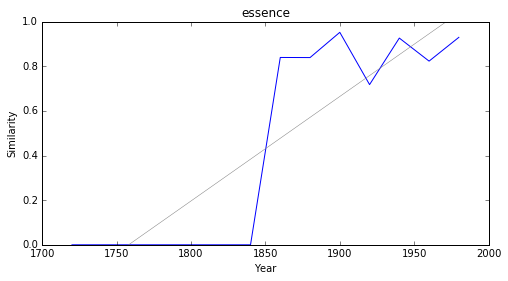

souci


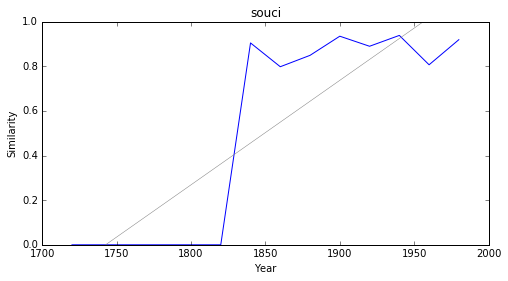

pire


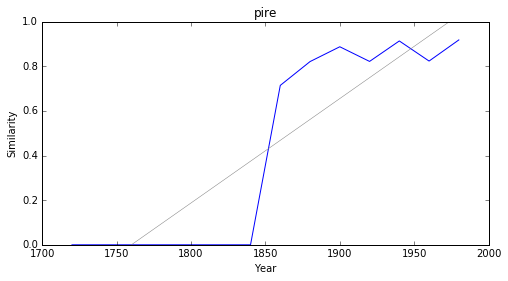

somme


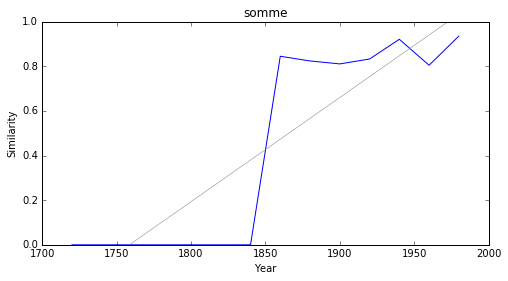

légende


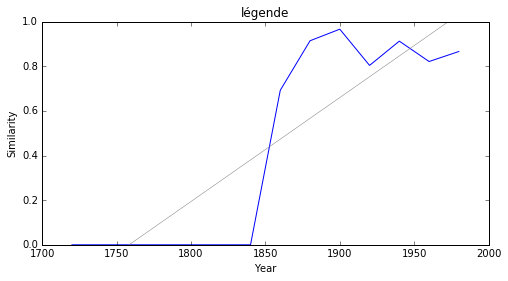

symbole


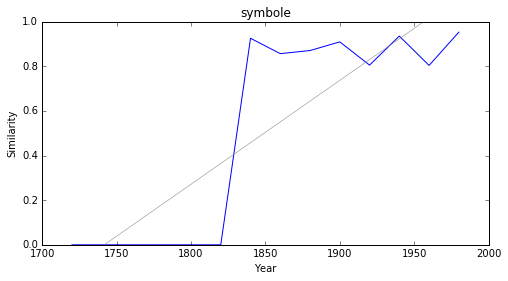

mystique


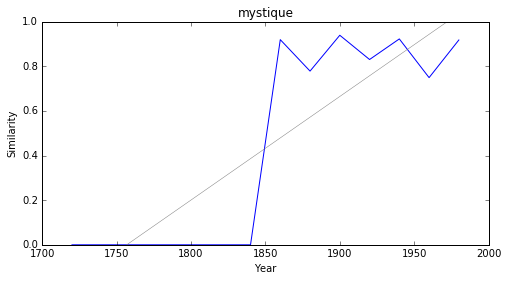

### <i><b>pouvoir</i></b>

           token     slope         p
276      définir  0.004642  0.000008
378          cas  0.004595  0.000026
522        façon  0.004580  0.000025
418   accommoder  0.004570  0.000034
406       risque  0.004542  0.000054
293  précisément  0.004540  0.000007
239        échec  0.004467  0.000024
230   passionner  0.004454  0.000064
374      réjouir  0.004432  0.000025
149       battre  0.004408  0.000100



définir


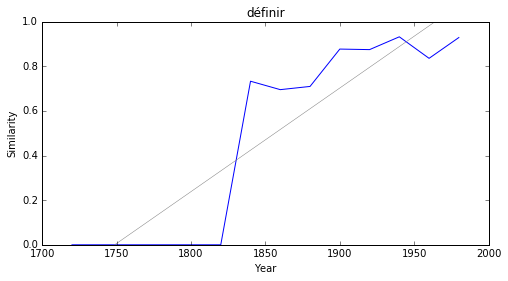

cas


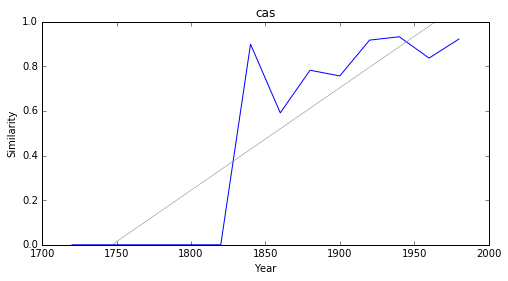

façon


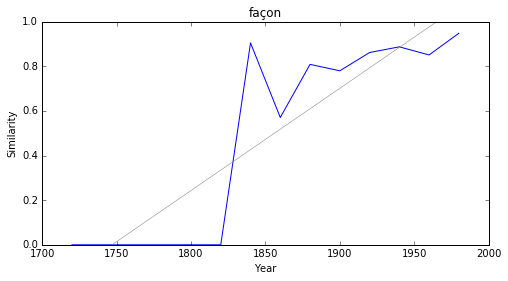

accommoder


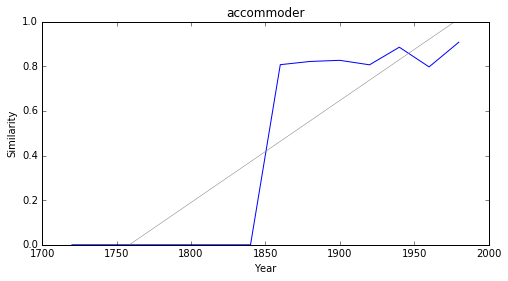

risque


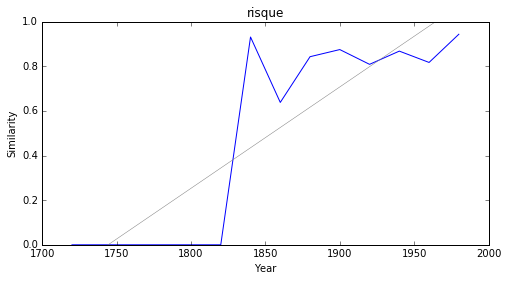

précisément


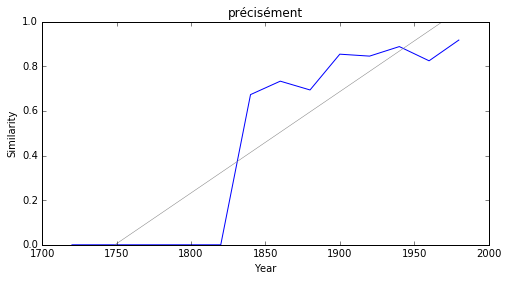

échec


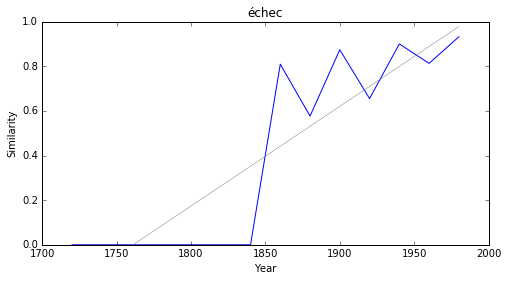

passionner


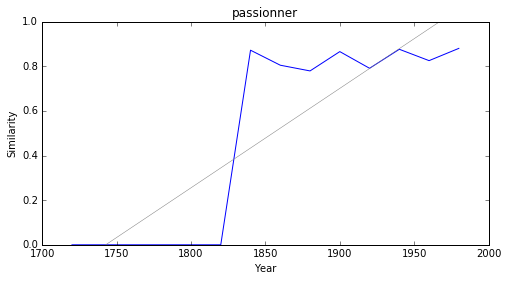

réjouir


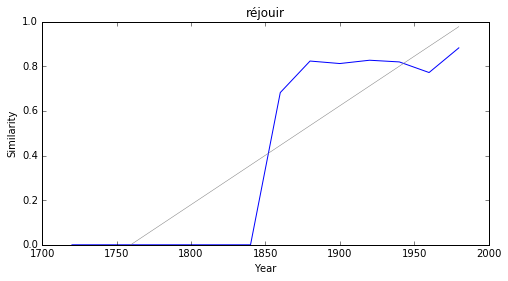

battre


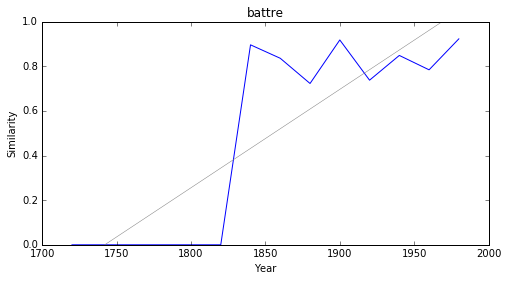

### <i><b>droit</i></b>

              token     slope         p
206          métier  0.004854  0.000034
650            rêve  0.004845  0.000065
97          formule  0.004795  0.000036
163  responsabilité  0.004721  0.000064
80         aventure  0.004714  0.000092
498       certitude  0.004710  0.000023
260          vision  0.004686  0.000091
769         essence  0.004683  0.000052
529           souci  0.004681  0.000070
5              pire  0.004678  0.000020



métier


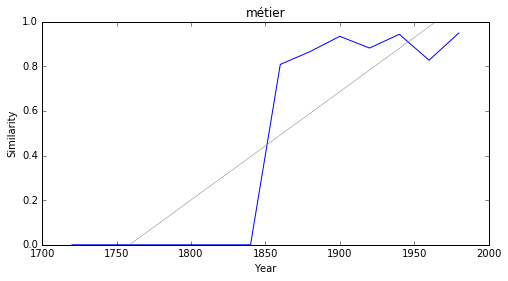

rêve


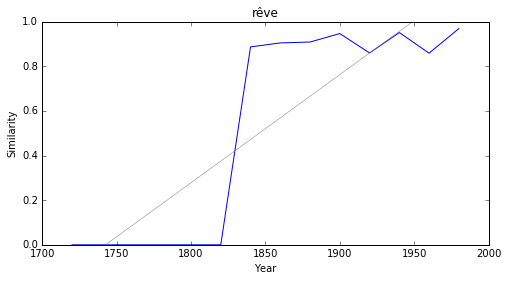

formule


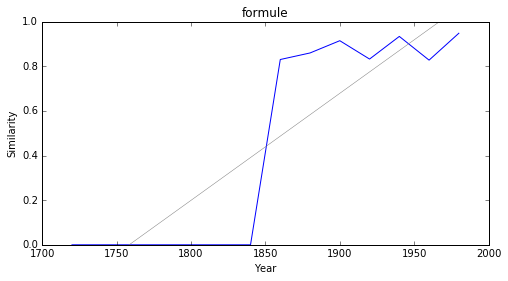

responsabilité


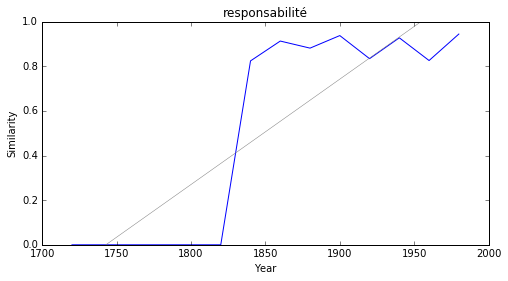

aventure


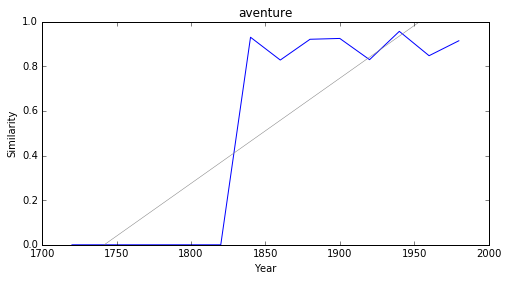

certitude


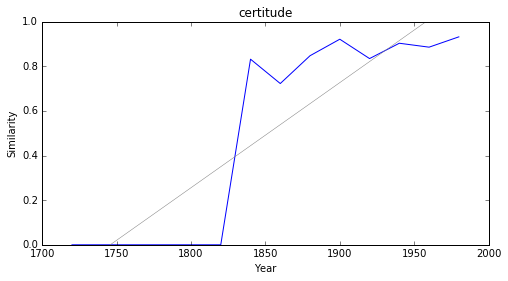

vision


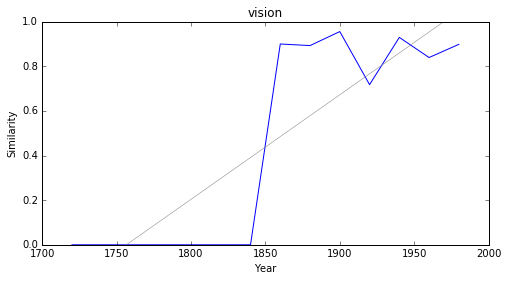

essence


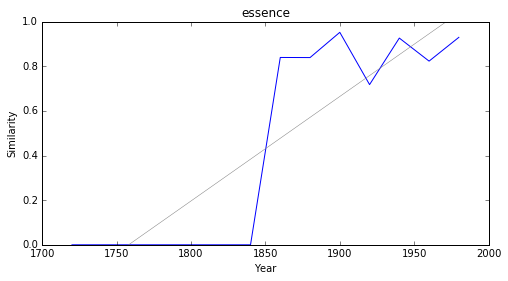

souci


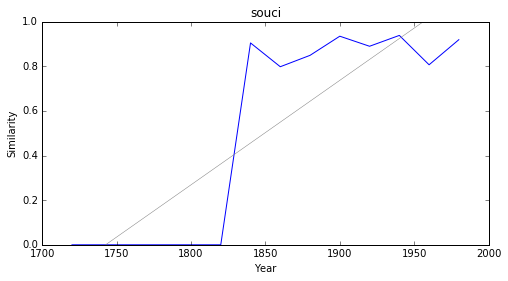

pire


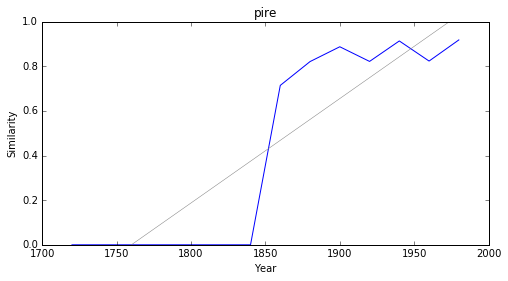

### <i><b>loi</i></b>

              token     slope         p
224          métier  0.004854  0.000034
683            rêve  0.004845  0.000065
182  responsabilité  0.004721  0.000064
98         aventure  0.004714  0.000092
284          vision  0.004686  0.000091
816         essence  0.004683  0.000052
555           souci  0.004681  0.000070
5              pire  0.004678  0.000020
72        tentation  0.004674  0.000031
723           somme  0.004669  0.000034



métier


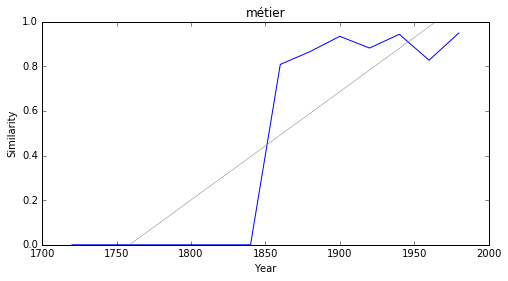

rêve


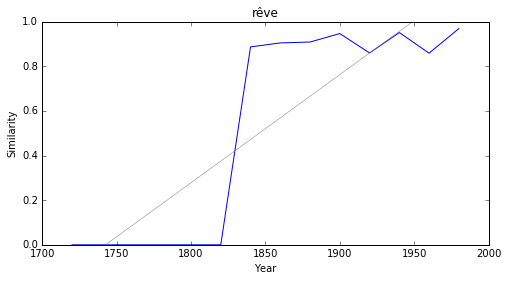

responsabilité


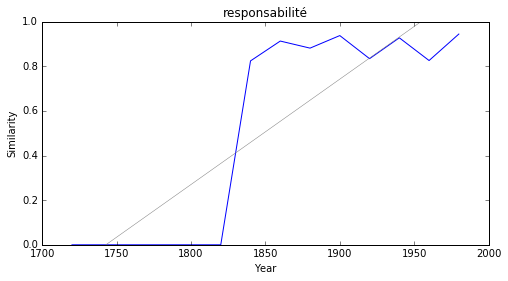

aventure


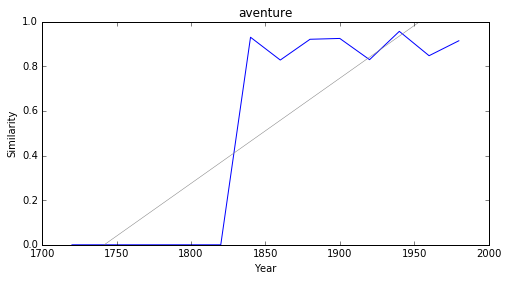

vision


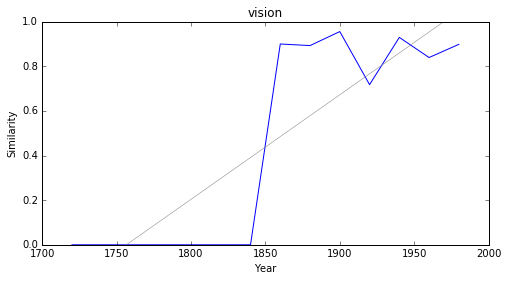

essence


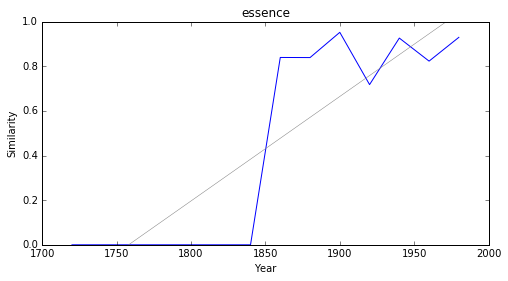

souci


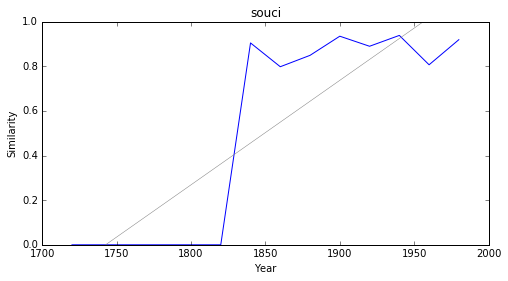

pire


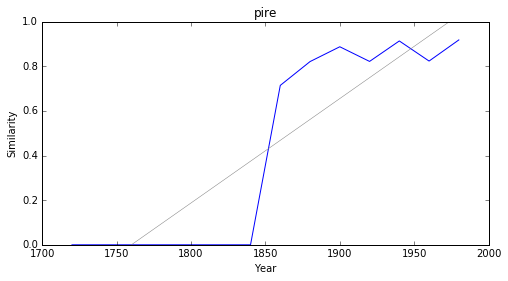

tentation


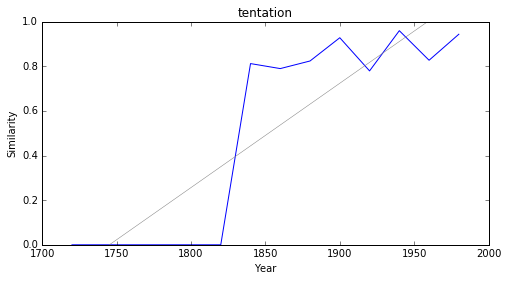

somme


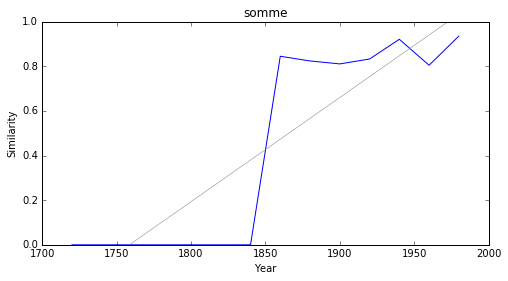

### <i><b>génie</i></b>

              token     slope         p
197          métier  0.004854  0.000034
643            rêve  0.004845  0.000065
101         formule  0.004795  0.000036
162  responsabilité  0.004721  0.000064
73        romancier  0.004715  0.000043
86         aventure  0.004714  0.000092
488       certitude  0.004710  0.000023
517          proche  0.004693  0.000046
262          vision  0.004686  0.000091
261           thème  0.004682  0.000056



métier


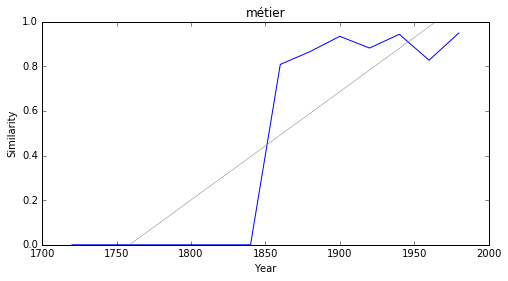

rêve


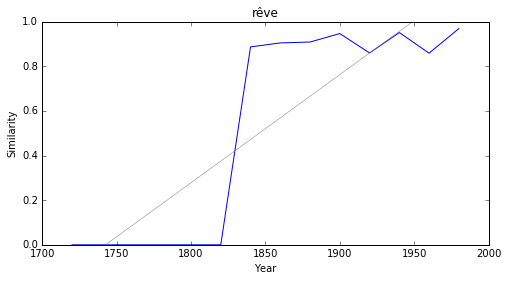

formule


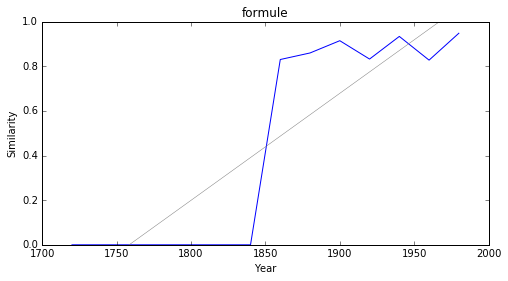

responsabilité


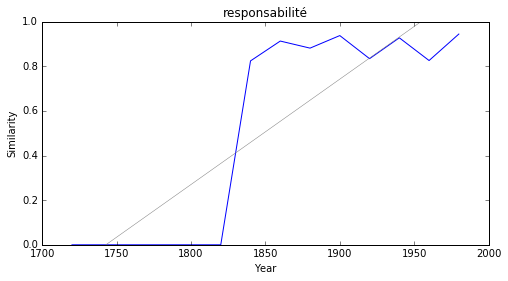

romancier


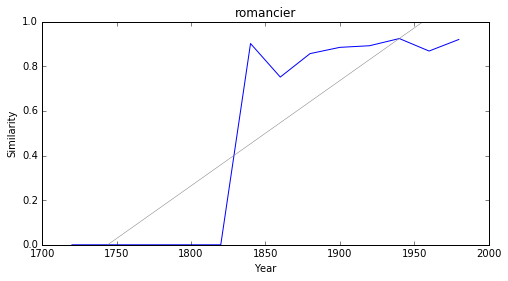

aventure


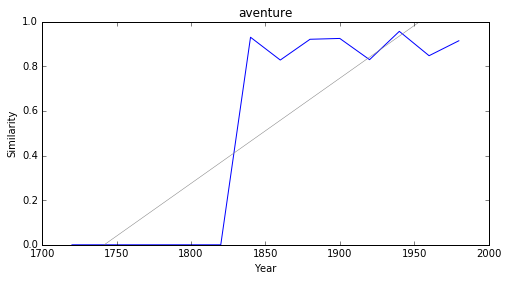

certitude


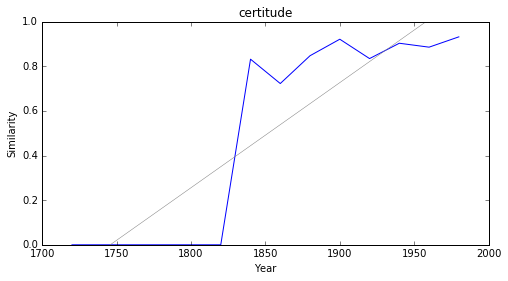

proche


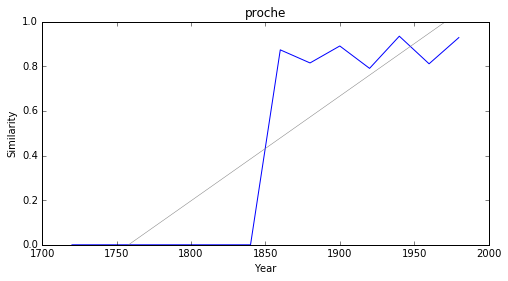

vision


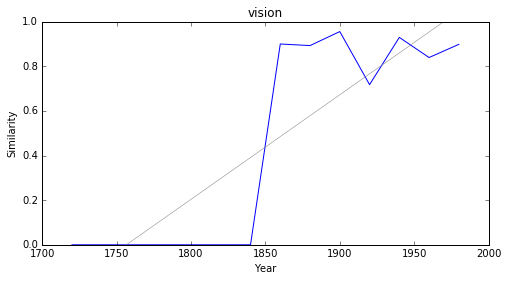

thème


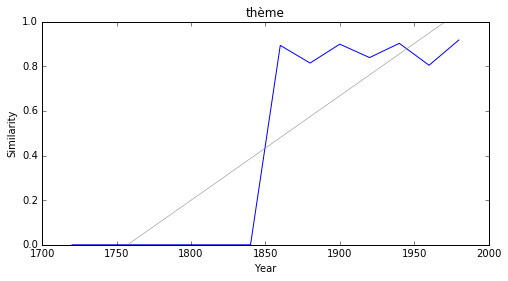

In [214]:
import pandas as pd
from IPython.display import Markdown, display
pd.set_option('display.max_rows', 1000)

for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df1 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df1.sort_values('slope', ascending=False).head(10))
    print('\n\n')
    
    for i, row in df1.sort_values('slope', ascending=False).head(10).iterrows():
        plot_cosine_series('littérature', row['token'], 8, 4)

métier


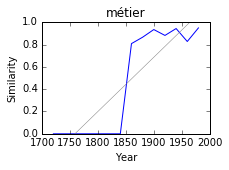

rêve


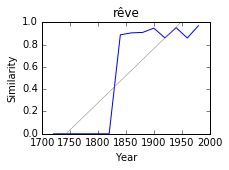

formule


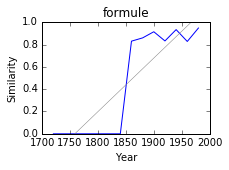

responsabilité


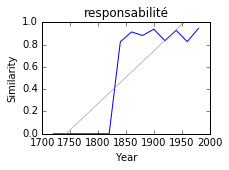

romancier


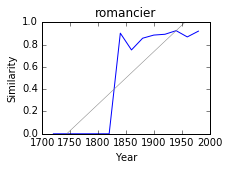

aventure


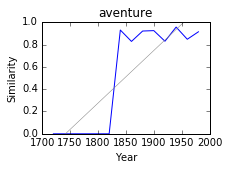

certitude


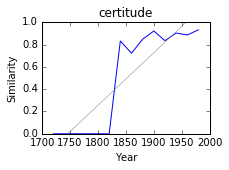

proche


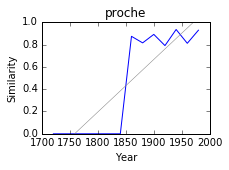

vision


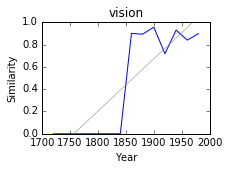

thème


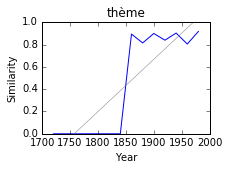

souci


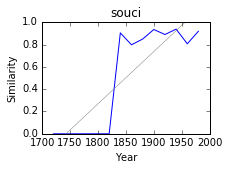

pire


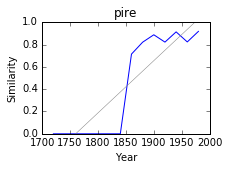

tentation


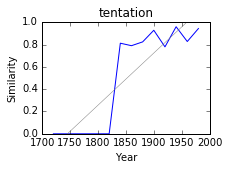

somme


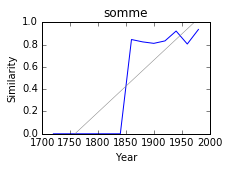

légende


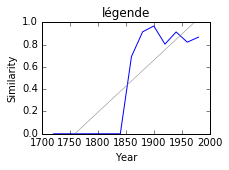

symbole


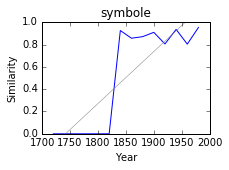

personnalité


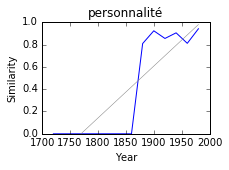

définir


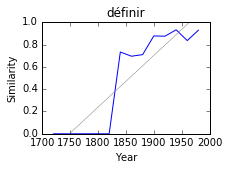

mystique


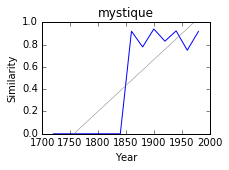

tempérament


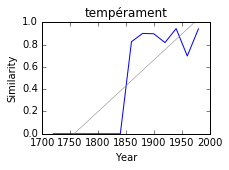

In [215]:
for i, row in df1.sort_values('slope', ascending=False).head(20).iterrows():
    plot_cosine_series('littérature', row['token'], 3, 2)

# Decreasing

This is the same process here : we want to see which terms tend to <b>disassociate</b> themselves from "littérature" (by default, which you can change with the trained models). Then again, you have to check the p values. "transplantation", "choeur" and "philé" are not considered significant, "chaldéen" is, and "destination", "morceau", etc. are as well. The fact that those are less significant is logical : the fewer the terms, the more erratic their series tend to be.

### <i><b>littérature</i></b>

             token     slope             p
182       monarque -0.005364  3.770473e-05
716      émulation -0.005345  3.031541e-05
642       vertueux -0.004584  5.651689e-04
427         avoyer -0.004378  9.070469e-04
425       quelques -0.004015  9.987445e-05
429  perfectionner -0.003982  1.532957e-04
33      modération -0.003971  2.634368e-04
85             sur -0.003900  1.558353e-04
144           deux -0.003850  8.959045e-07
718          notre -0.003751  4.159363e-07



métier


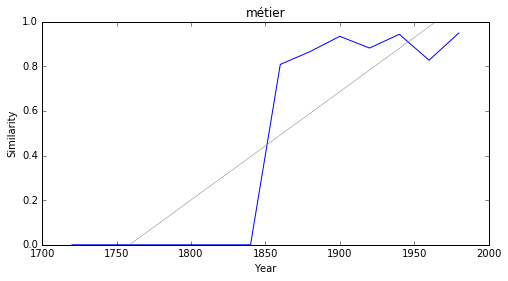

rêve


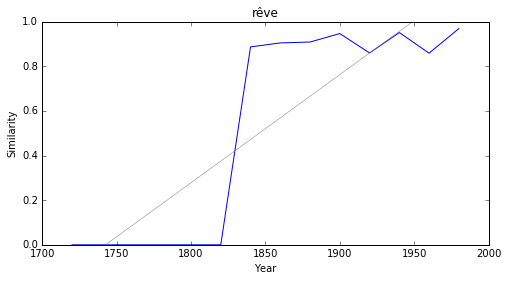

formule


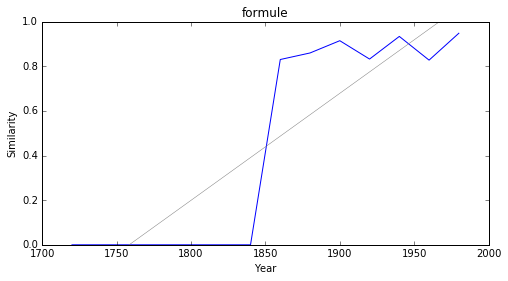

responsabilité


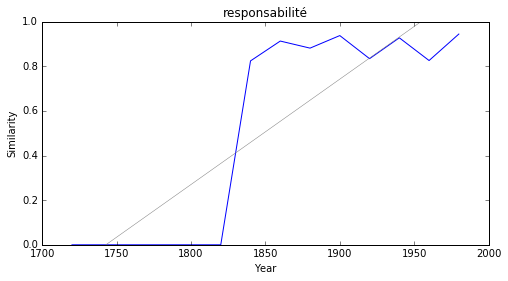

romancier


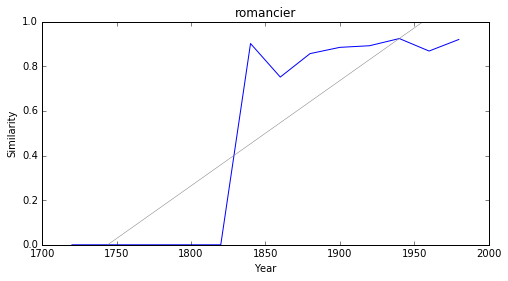

aventure


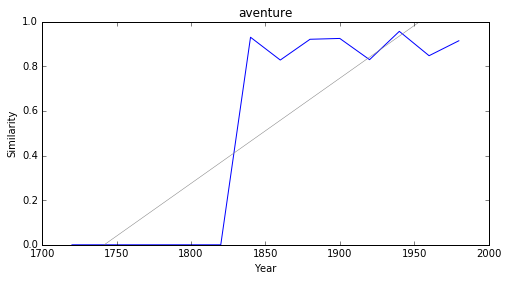

certitude


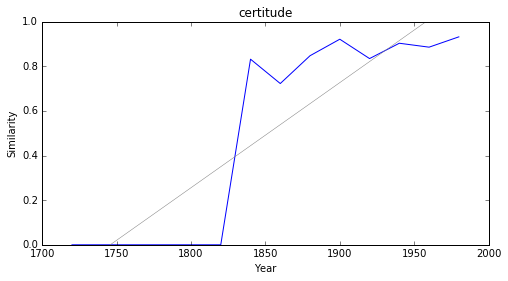

vision


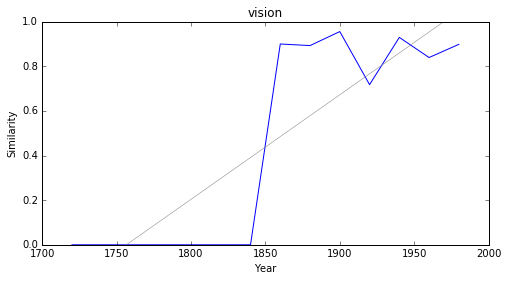

essence


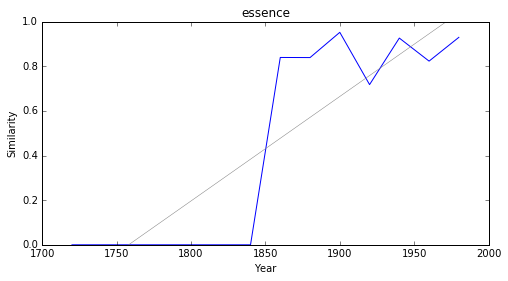

souci


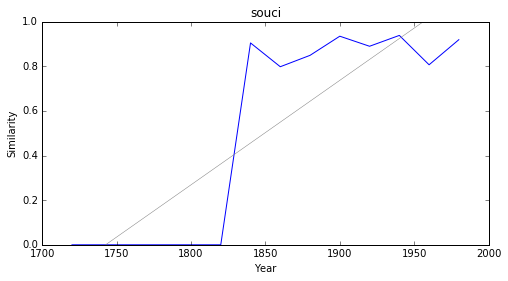

### <i><b>science</i></b>

             token     slope             p
181       monarque -0.005364  3.770473e-05
676      émulation -0.005345  3.031541e-05
710            aux -0.004783  1.249323e-05
715             an -0.004687  1.890560e-06
360           sans -0.004472  4.188851e-04
407         avoyer -0.004378  9.070469e-04
406       quelques -0.004015  9.987445e-05
408  perfectionner -0.003982  1.532957e-04
84             sur -0.003900  1.558353e-04
141           deux -0.003850  8.959045e-07



métier


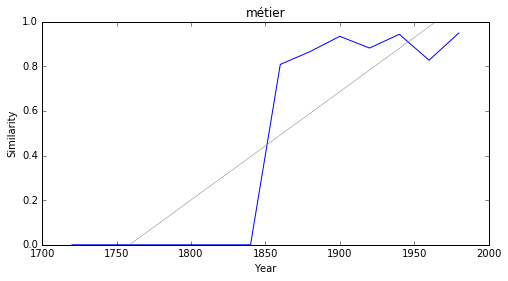

rêve


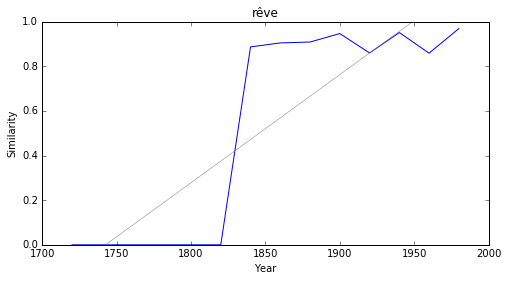

responsabilité


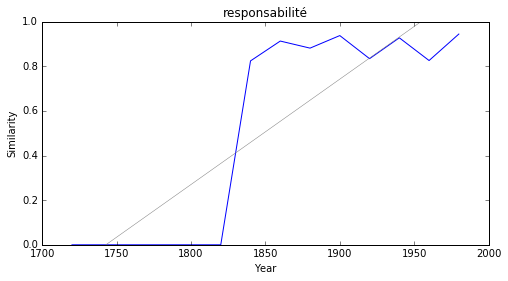

romancier


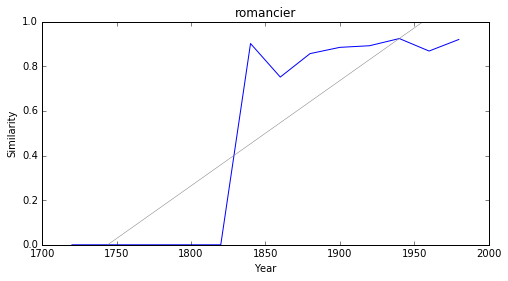

aventure


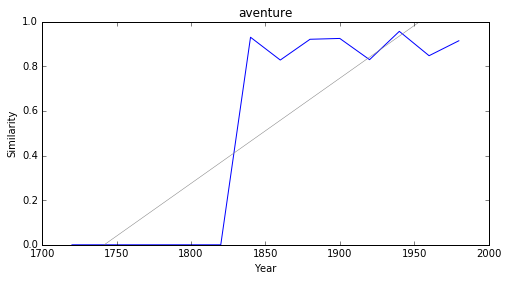

vision


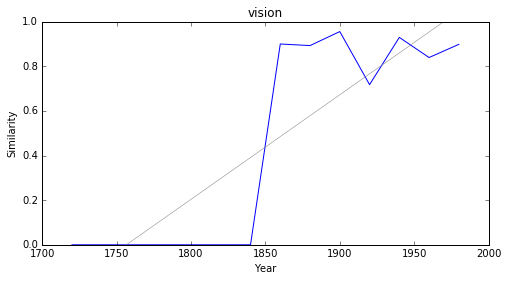

essence


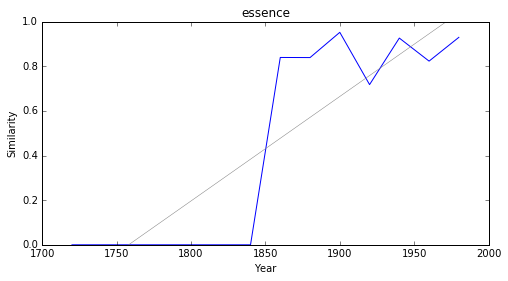

thème


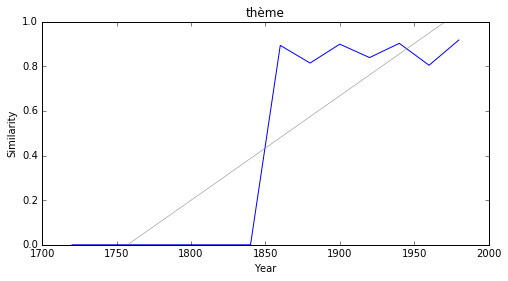

souci


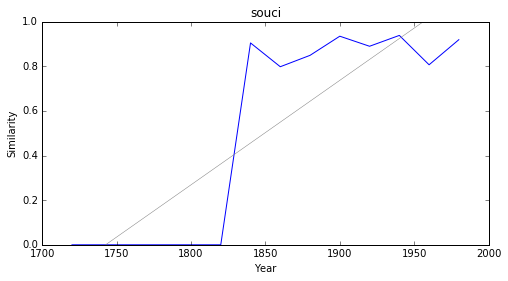

pire


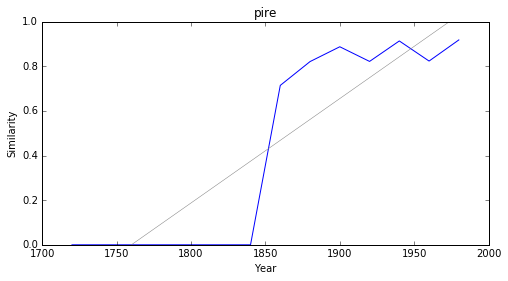

### <i><b>savoir</i></b>

             token     slope         p
112       monarque -0.005364  0.000038
474      émulation -0.005345  0.000030
551          votre -0.004578  0.000028
390            mon -0.004500  0.000196
221           sans -0.004472  0.000419
165            vos -0.004430  0.000022
265         avoyer -0.004378  0.000907
243        daigner -0.004208  0.000179
264       quelques -0.004015  0.000100
266  perfectionner -0.003982  0.000153



définir


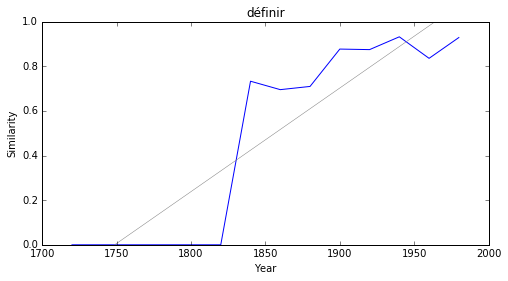

cas


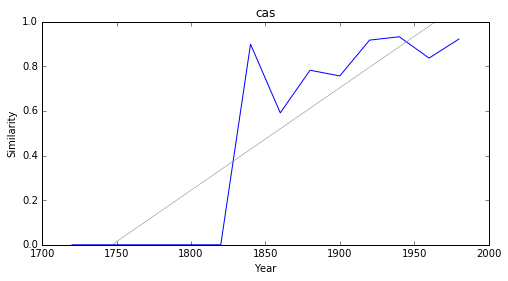

néant


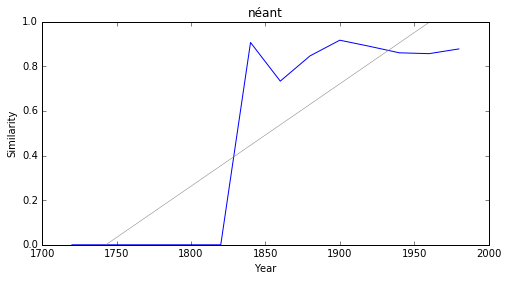

façon


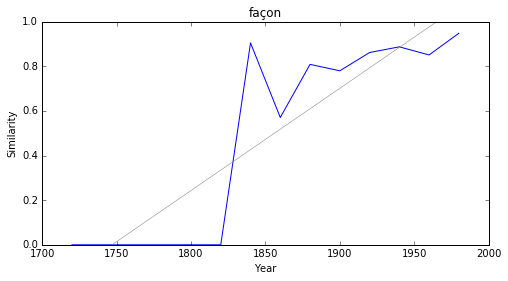

précisément


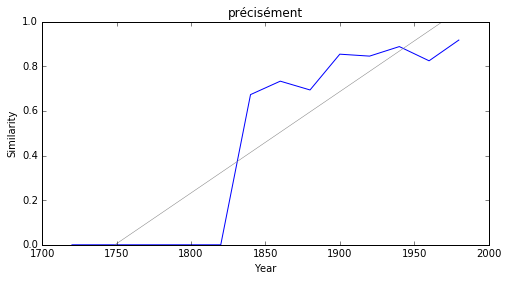

passionner


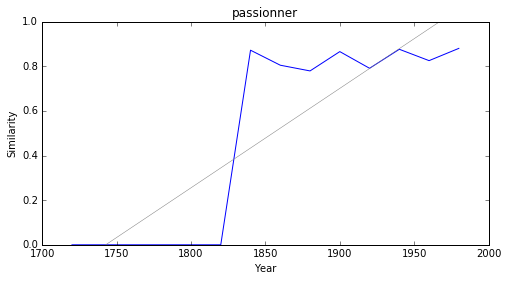

réjouir


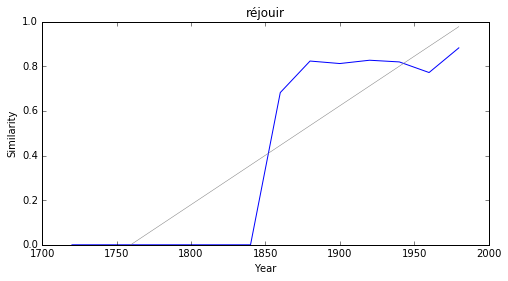

battre


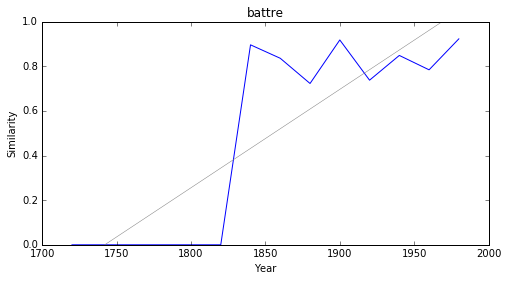

affirmer


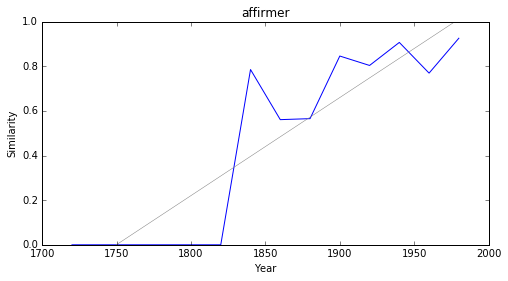

quelqu


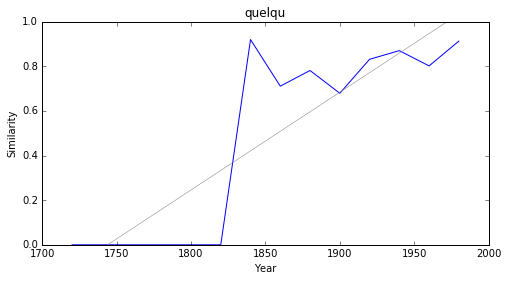

### <i><b>histoire</i></b>

             token     slope             p
193       monarque -0.005364  3.770473e-05
563             du -0.004453  4.353110e-06
613      françoise -0.004390  8.941616e-04
429         avoyer -0.004378  9.070469e-04
22       concourir -0.004158  3.693840e-03
428       quelques -0.004015  9.987445e-05
431  perfectionner -0.003982  1.532957e-04
89             sur -0.003900  1.558353e-04
273        aujourd -0.003853  5.909272e-04
154           deux -0.003850  8.959045e-07



rêve


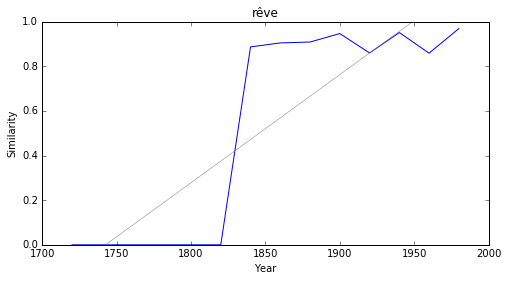

romancier


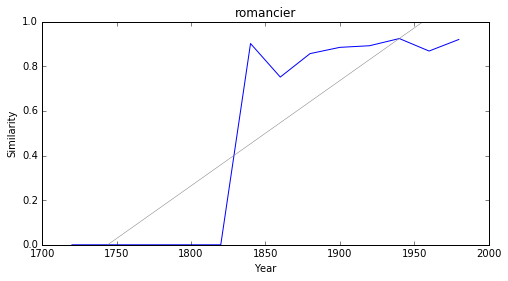

aventure


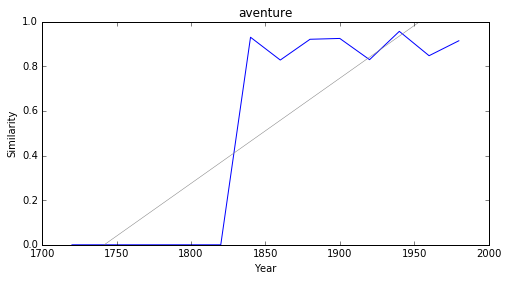

vision


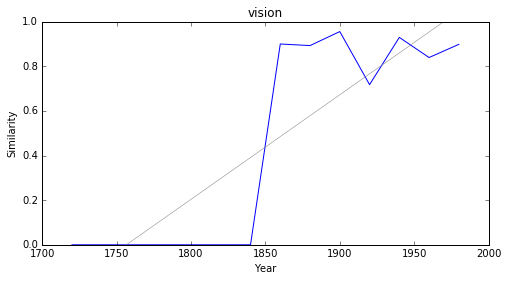

essence


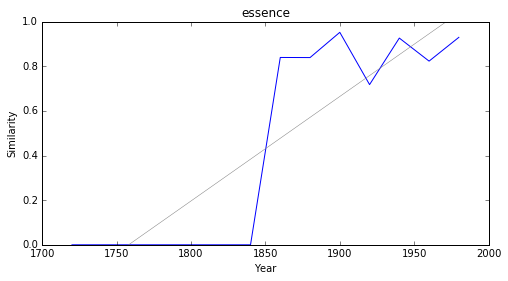

thème


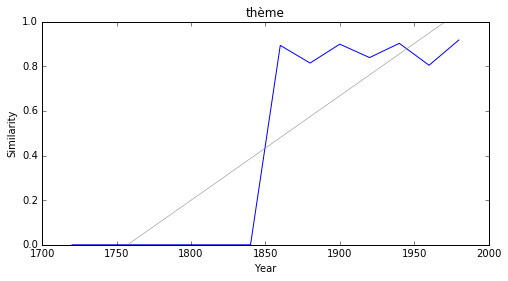

pire


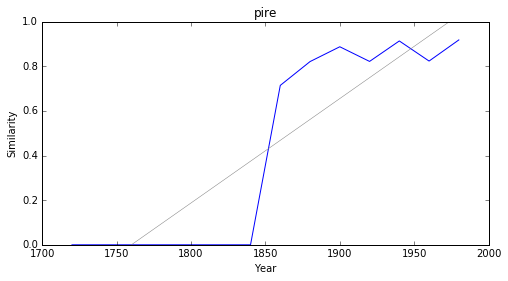

légende


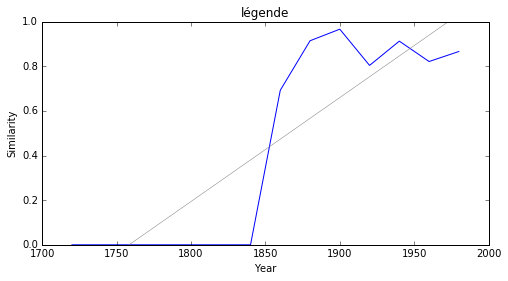

personnalité


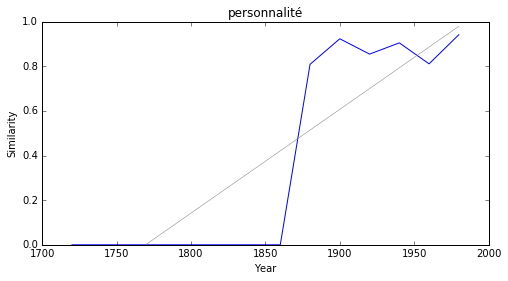

mystique


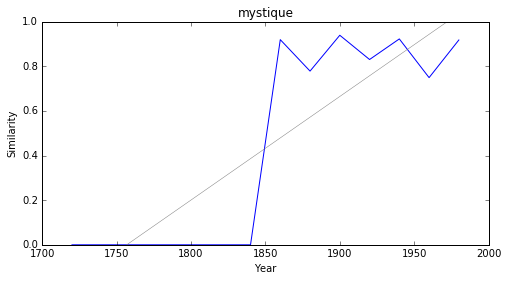

### <i><b>lettre</i></b>

         token     slope         p
253   monarque -0.005364  0.000038
898         au -0.005010  0.000025
770        son -0.004837  0.000003
880        aux -0.004783  0.000012
903      votre -0.004578  0.000028
832         du -0.004453  0.000004
511        vos -0.004430  0.000022
372  françoise -0.004390  0.000894
325     avoyer -0.004378  0.000907
647      leurs -0.004276  0.000033



métier


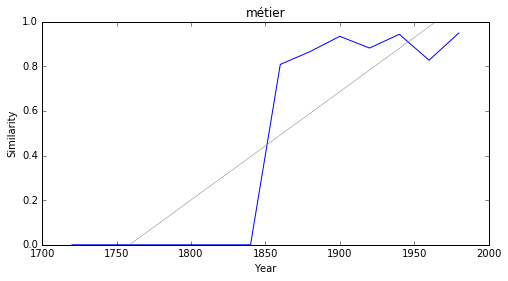

rêve


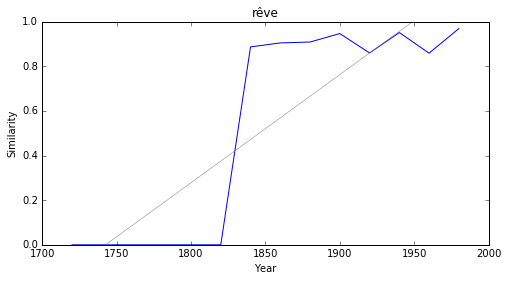

romancier


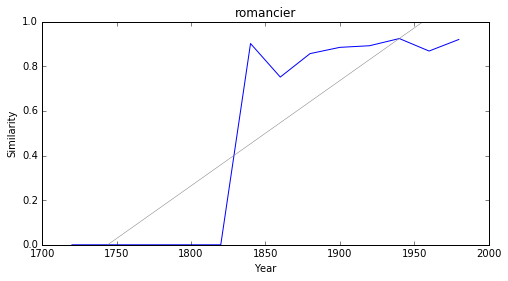

aventure


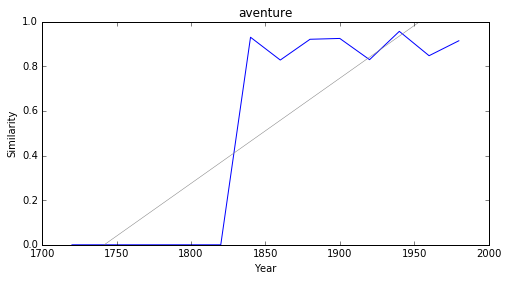

certitude


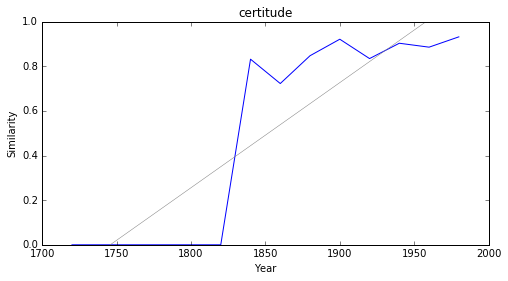

vision


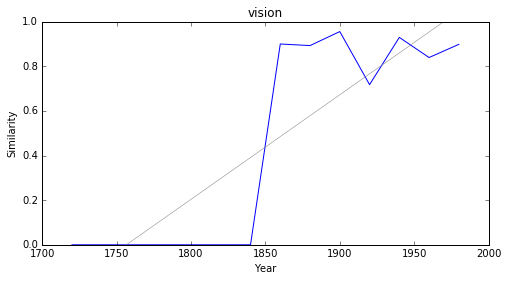

thème


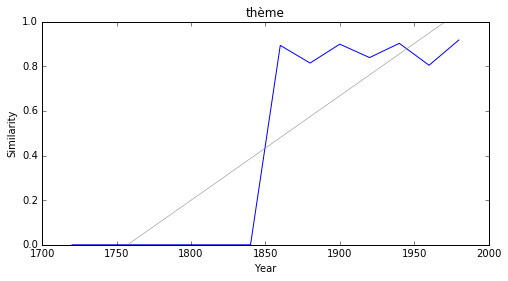

souci


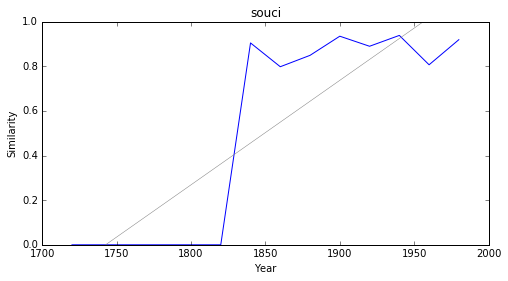

tentation


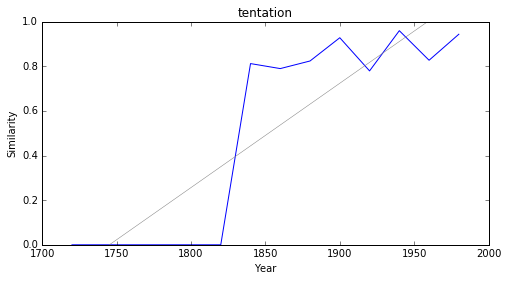

légende


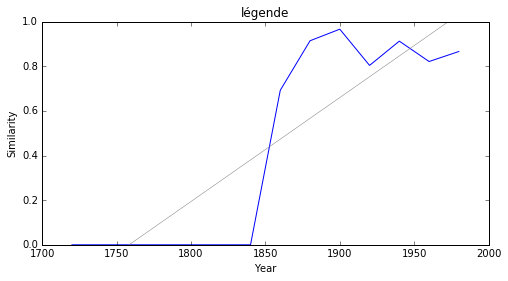

### <i><b>critique</i></b>

             token     slope             p
286       monarque -0.005364  3.770473e-05
703             an -0.004687  1.890560e-06
677       vertueux -0.004584  5.651689e-04
408      françoise -0.004390  8.941616e-04
363         avoyer -0.004378  9.070469e-04
117       quelques -0.004015  9.987445e-05
364  perfectionner -0.003982  1.532957e-04
744     modération -0.003971  2.634368e-04
495            sur -0.003900  1.558353e-04
278           deux -0.003850  8.959045e-07



métier


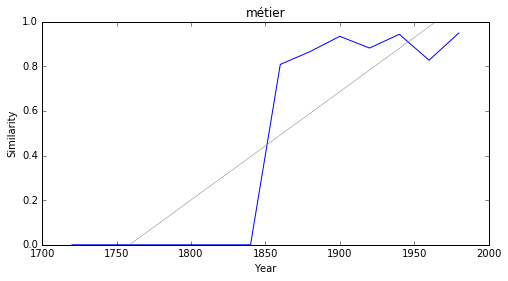

rêve


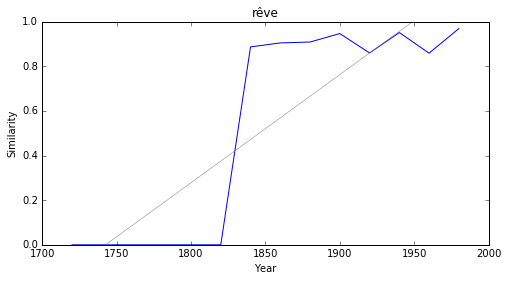

formule


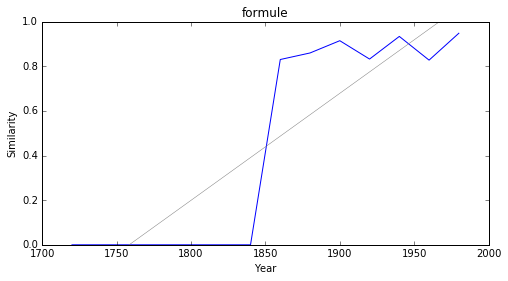

romancier


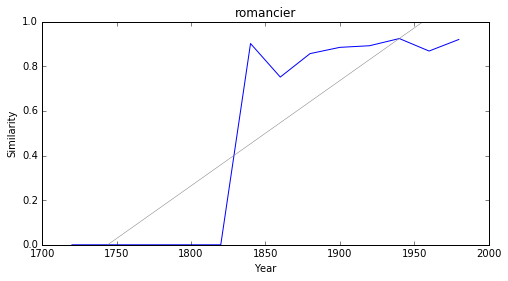

aventure


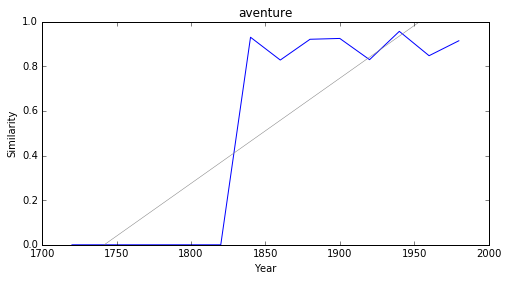

certitude


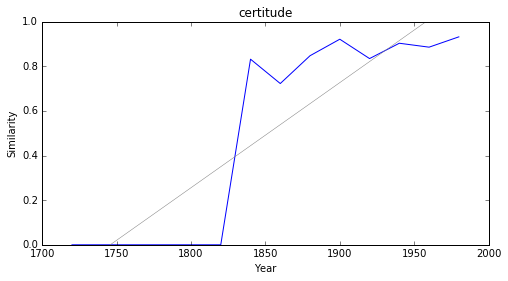

proche


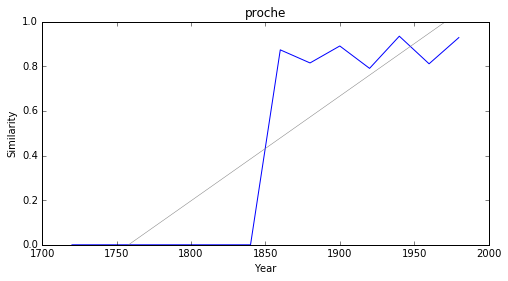

vision


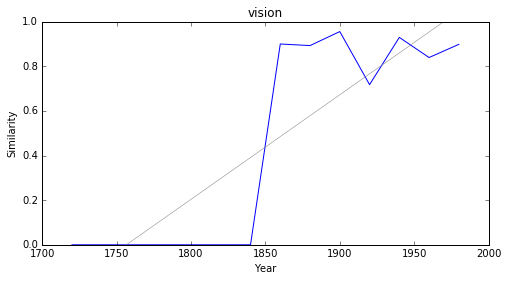

essence


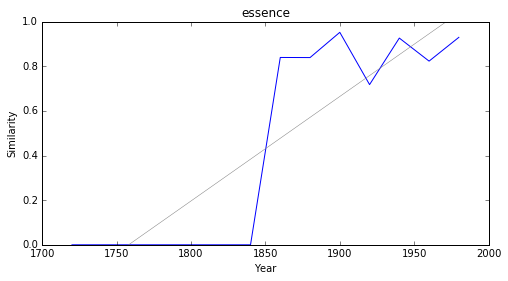

thème


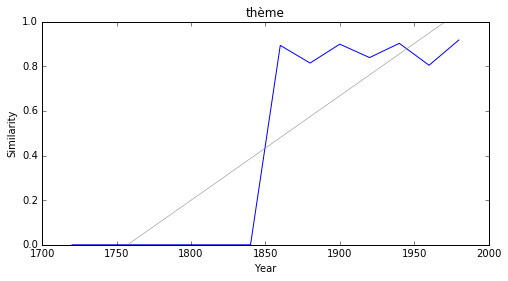

### <i><b>esprit</i></b>

         token     slope         p
158   monarque -0.005364  0.000038
605  émulation -0.005345  0.000030
670         au -0.005010  0.000025
269        son -0.004837  0.000003
631        aux -0.004783  0.000012
318       sans -0.004472  0.000419
476         du -0.004453  0.000004
522  françoise -0.004390  0.000894
356     avoyer -0.004378  0.000907
599      leurs -0.004276  0.000033



métier


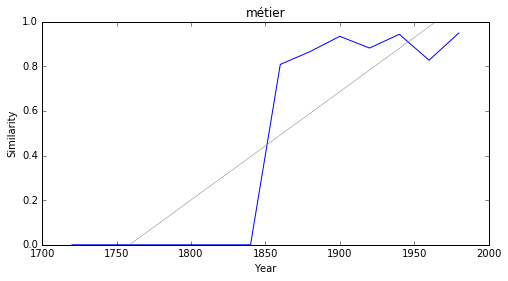

rêve


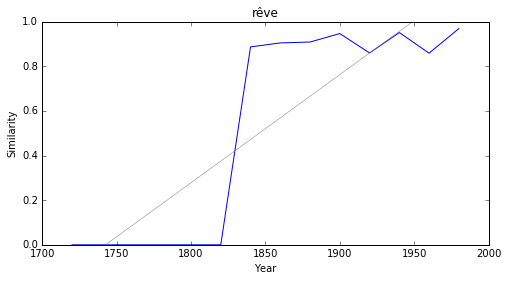

responsabilité


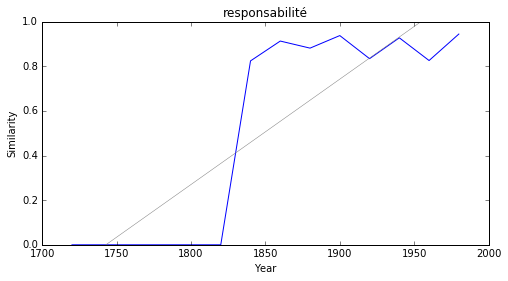

romancier


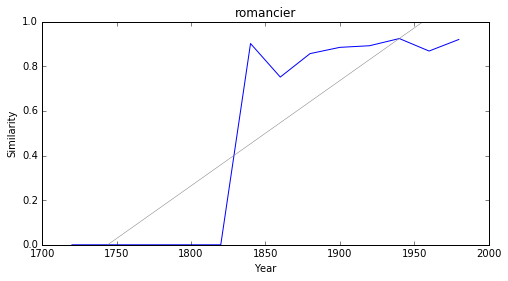

aventure


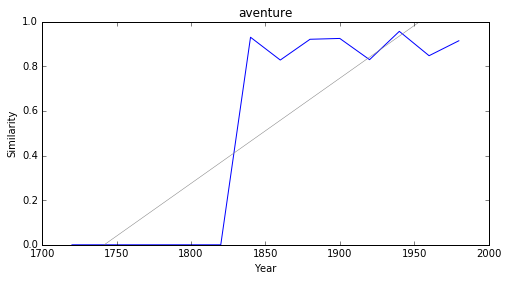

vision


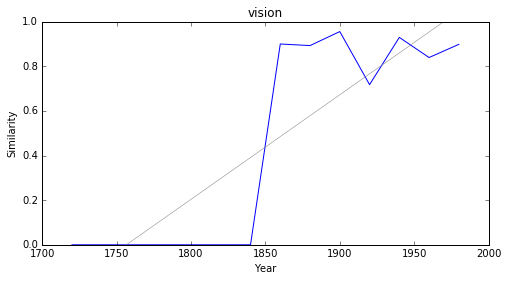

essence


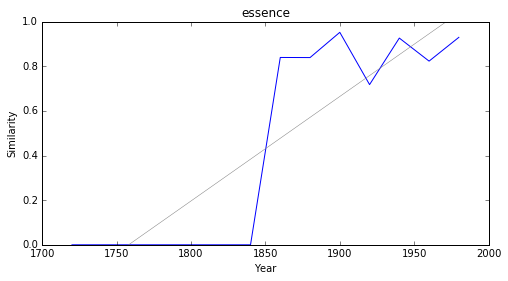

souci


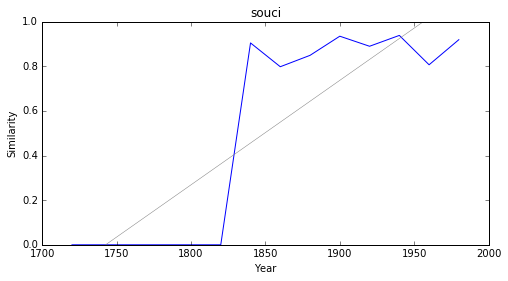

tentation


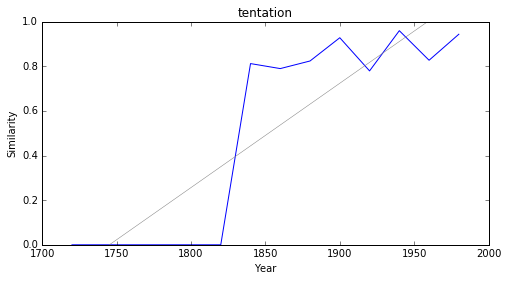

somme


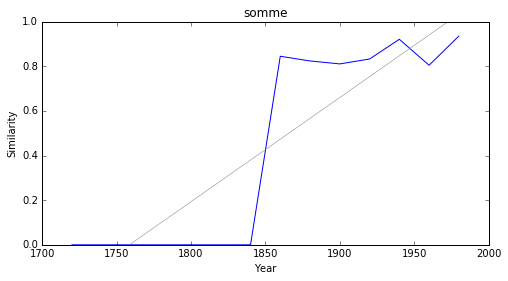

### <i><b>langue</i></b>

         token     slope         p
187   monarque -0.005364  0.000038
711  émulation -0.005345  0.000030
736        aux -0.004783  0.000012
562         du -0.004453  0.000004
609  françoise -0.004390  0.000894
426     avoyer -0.004378  0.000907
701      leurs -0.004276  0.000033
455      cette -0.004195  0.000022
21   concourir -0.004158  0.003694
297        ces -0.003993  0.000005



métier


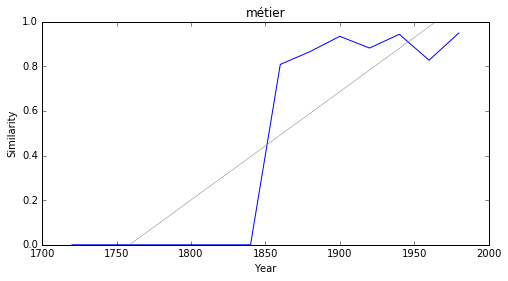

rêve


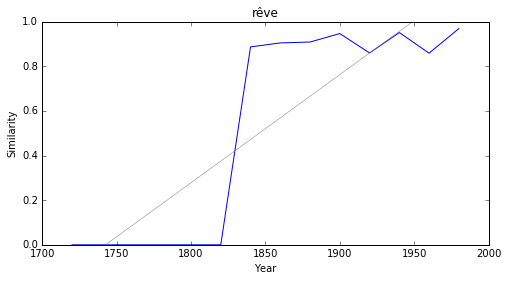

responsabilité


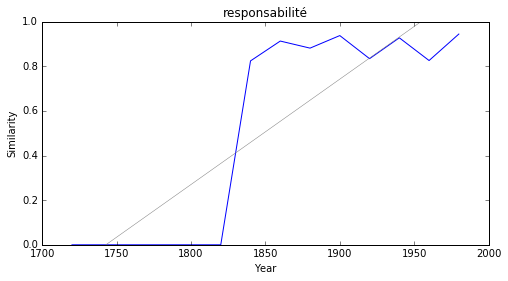

romancier


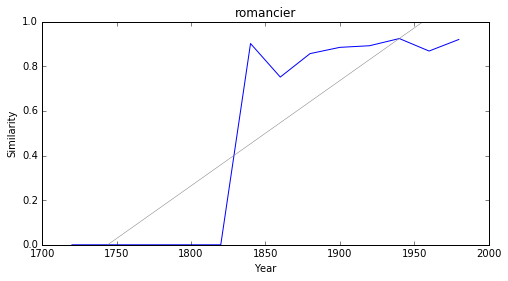

aventure


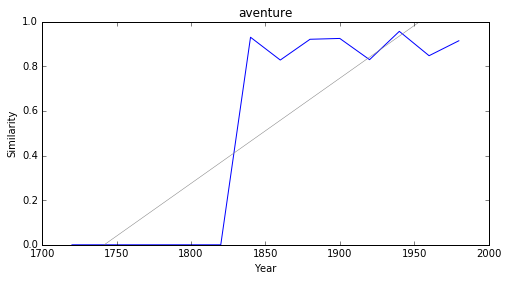

certitude


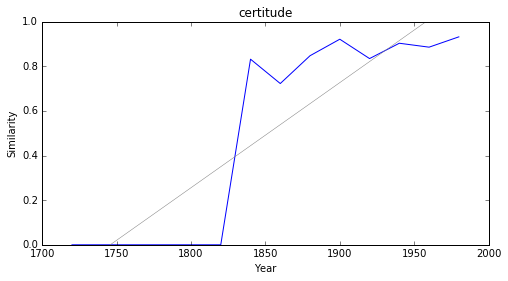

vision


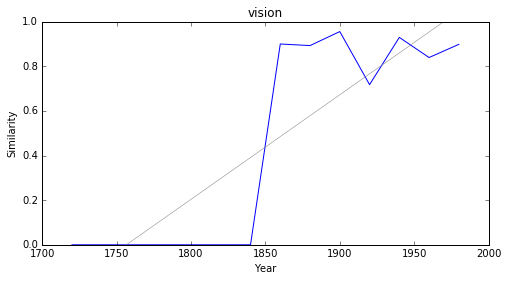

essence


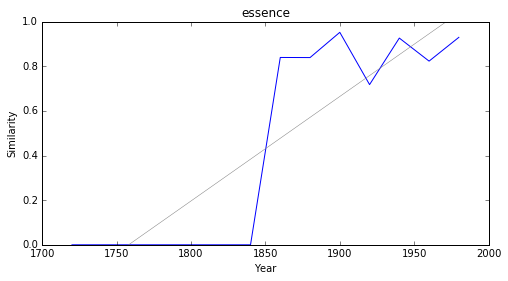

thème


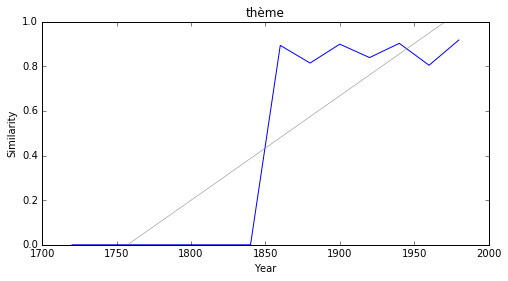

souci


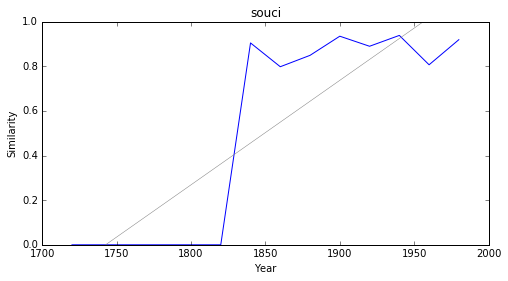

### <i><b>politique</i></b>

             token     slope             p
194       monarque -0.005364  3.770473e-05
770             an -0.004687  1.890560e-06
431         avoyer -0.004378  9.070469e-04
428       quelques -0.004015  9.987445e-05
434  perfectionner -0.003982  1.532957e-04
154           deux -0.003850  8.959045e-07
736          notre -0.003751  4.159363e-07
105          après -0.003631  8.088710e-05
536        pendant -0.003623  1.463102e-04
776           avec -0.003598  4.622502e-04



responsabilité


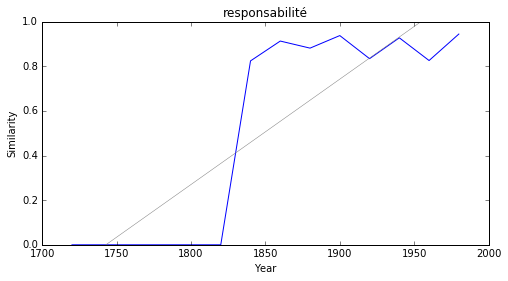

aventure


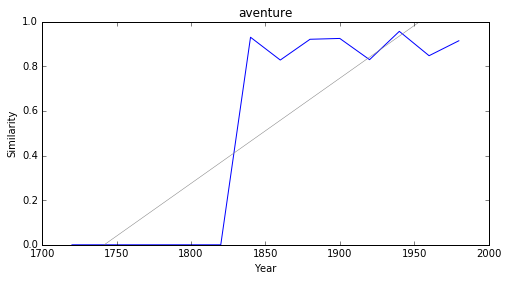

vision


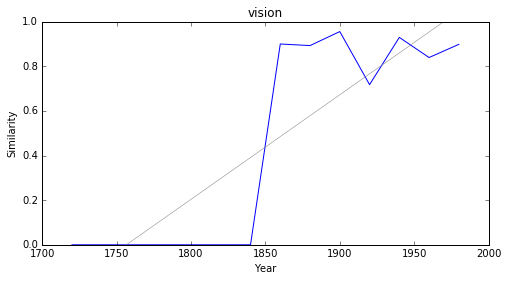

essence


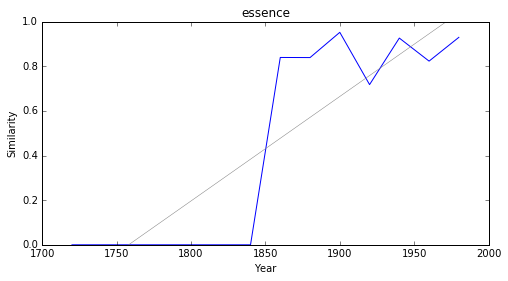

souci


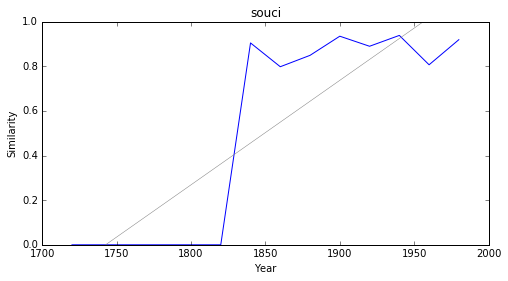

pire


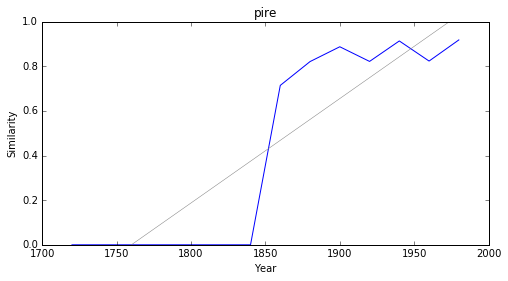

somme


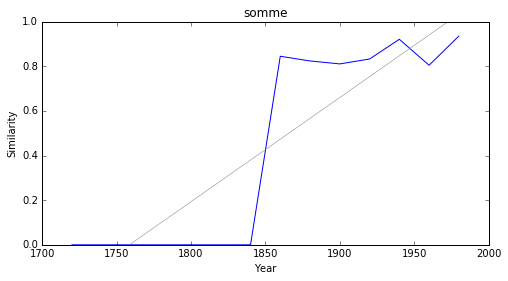

légende


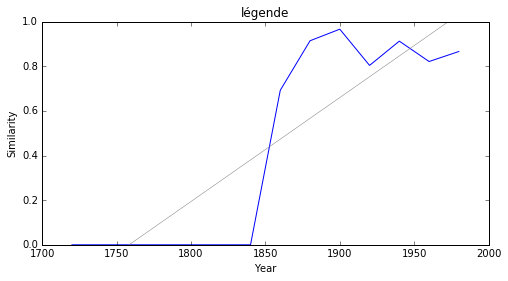

symbole


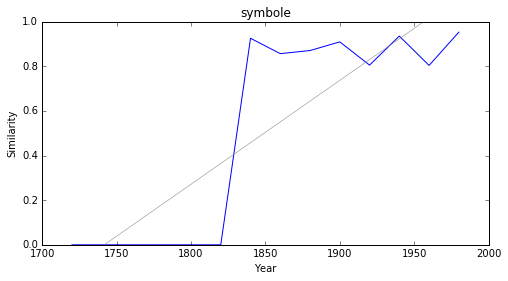

mystique


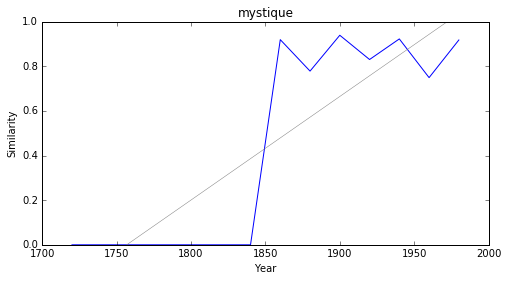

### <i><b>pouvoir</i></b>

       token     slope         p
195      son -0.004837  0.000003
483      aux -0.004783  0.000012
486       an -0.004687  0.000002
533    votre -0.004578  0.000028
384      mon -0.004500  0.000196
224     sans -0.004472  0.000419
163      vos -0.004430  0.000022
264   avoyer -0.004378  0.000907
457    leurs -0.004276  0.000033
245  daigner -0.004208  0.000179



définir


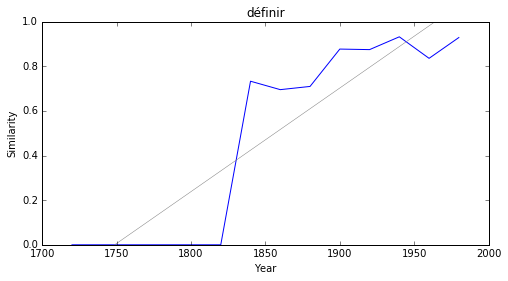

cas


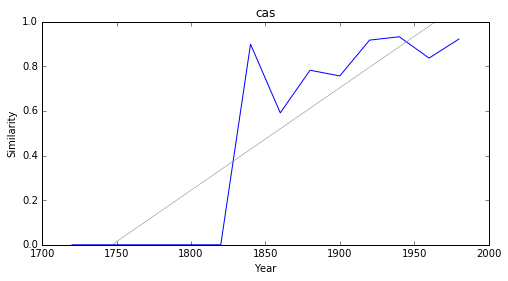

façon


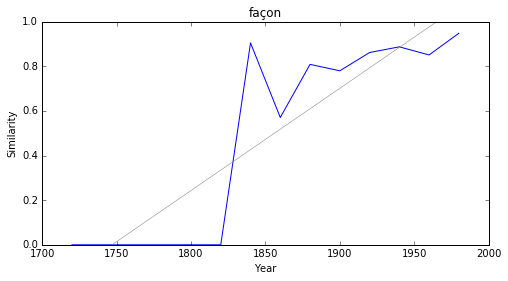

accommoder


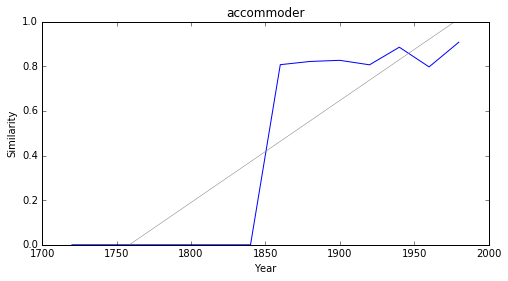

risque


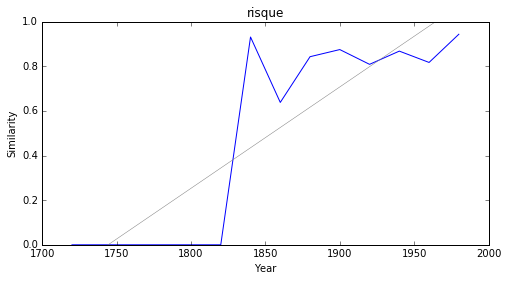

précisément


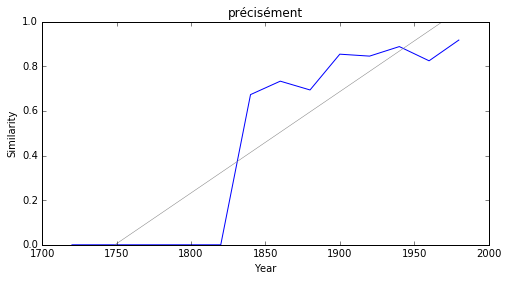

échec


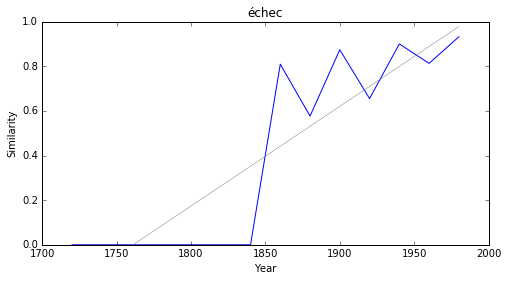

passionner


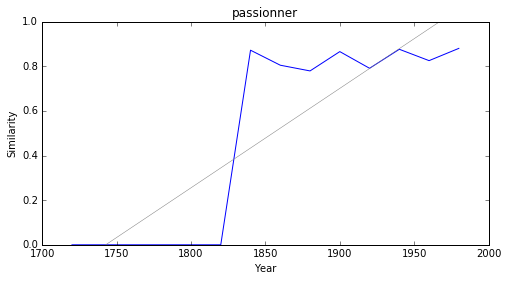

réjouir


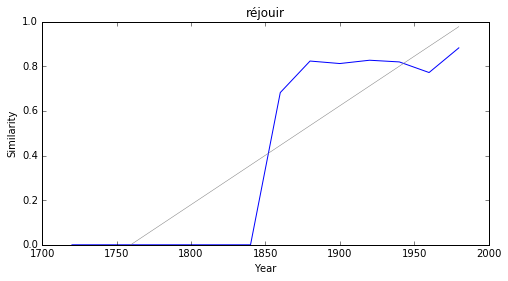

battre


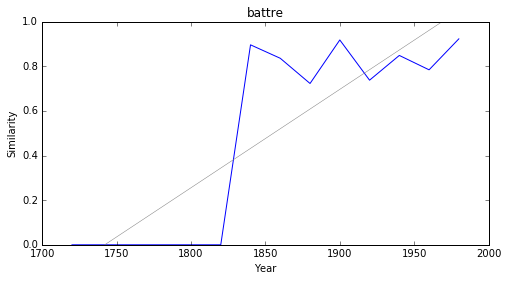

### <i><b>droit</i></b>

             token     slope             p
679      émulation -0.005345  3.031541e-05
710             an -0.004687  1.890560e-06
343           sans -0.004472  4.188851e-04
396         avoyer -0.004378  9.070469e-04
395       quelques -0.004015  9.987445e-05
397  perfectionner -0.003982  1.532957e-04
133           deux -0.003850  8.959045e-07
546       précepte -0.003790  3.687069e-03
681          notre -0.003751  4.159363e-07
85           après -0.003631  8.088710e-05



métier


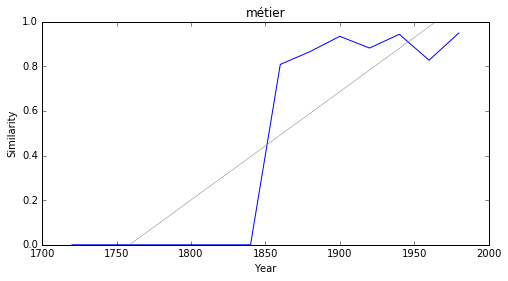

rêve


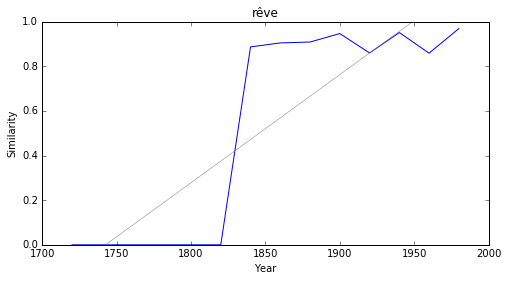

formule


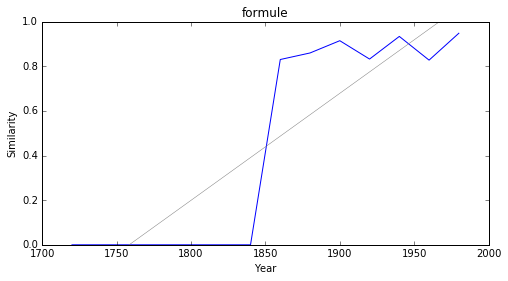

responsabilité


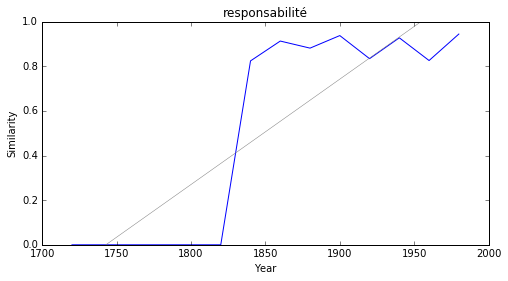

aventure


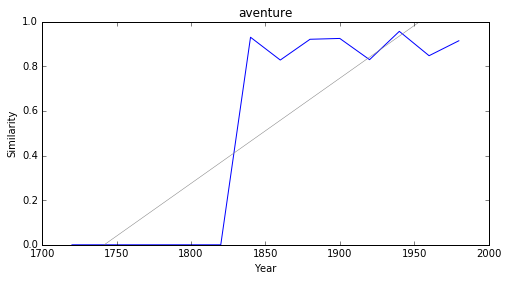

certitude


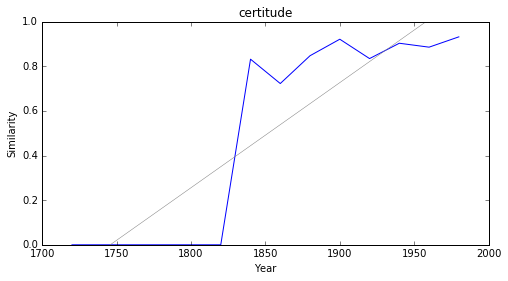

vision


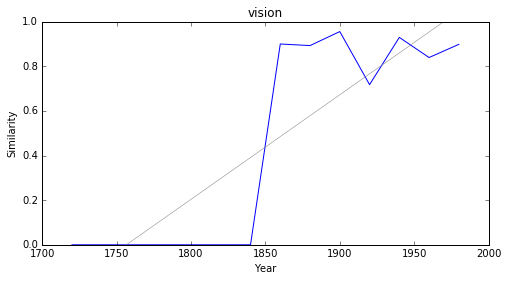

essence


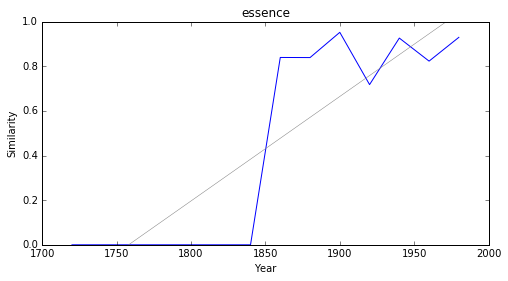

souci


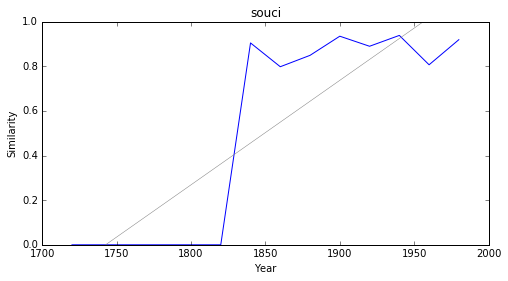

pire


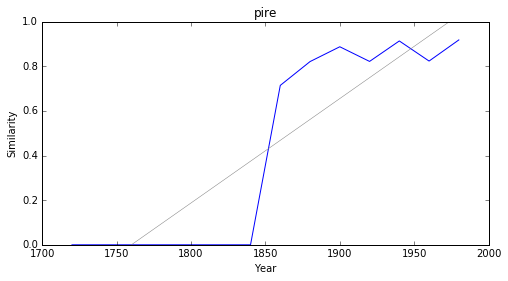

### <i><b>loi</i></b>

             token     slope             p
190       monarque -0.005364  3.770473e-05
750            aux -0.004783  1.249323e-05
754             an -0.004687  1.890560e-06
422         avoyer -0.004378  9.070469e-04
421       quelques -0.004015  9.987445e-05
424  perfectionner -0.003982  1.532957e-04
93             sur -0.003900  1.558353e-04
149           deux -0.003850  8.959045e-07
739              à -0.003847  7.113402e-04
413             où -0.003828  1.679092e-04



métier


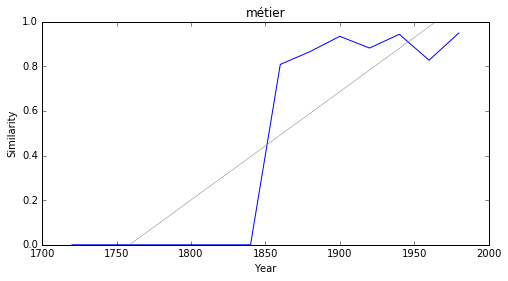

rêve


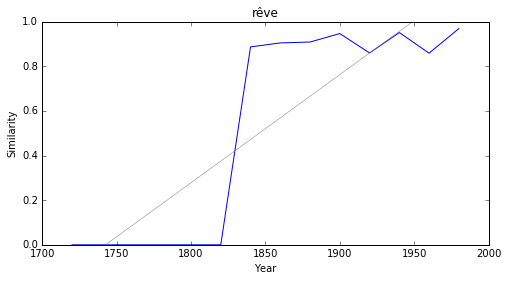

responsabilité


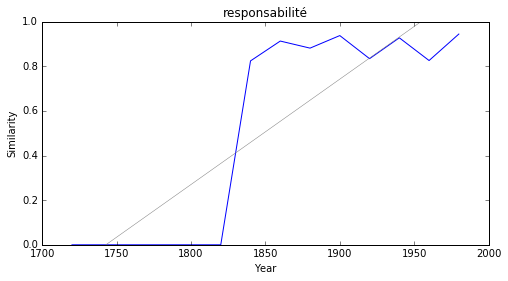

aventure


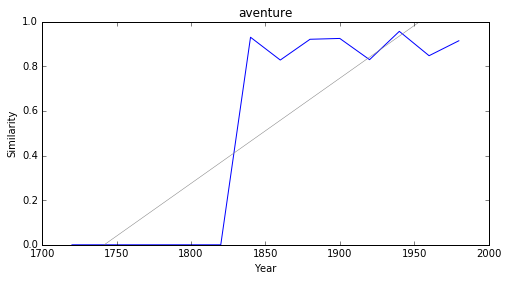

vision


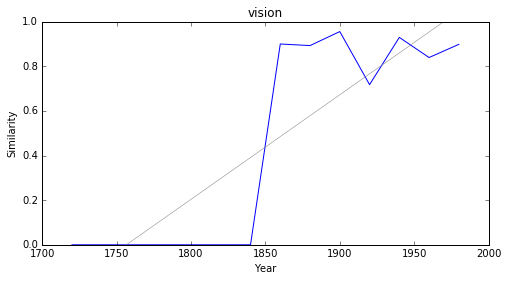

essence


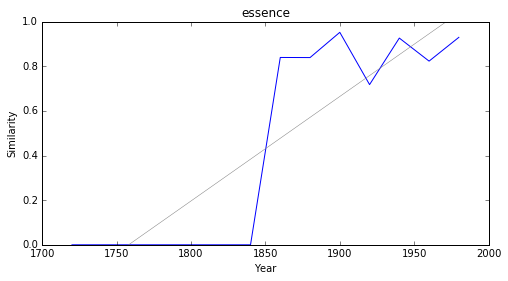

souci


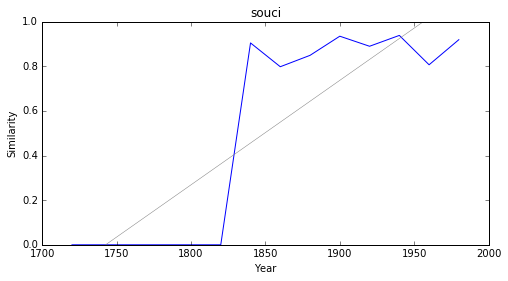

pire


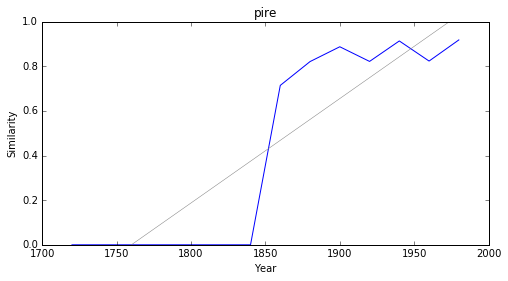

tentation


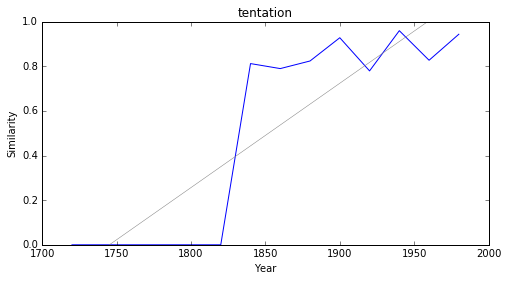

somme


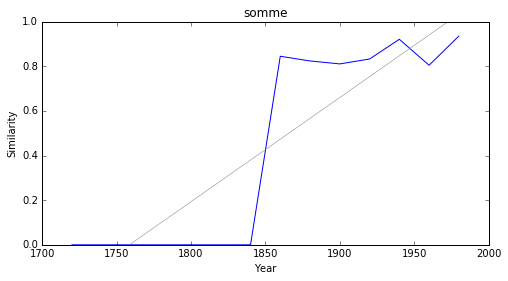

### <i><b>génie</i></b>

         token     slope         p
169   monarque -0.005364  0.000038
669  émulation -0.005345  0.000030
703        aux -0.004783  0.000012
706         an -0.004687  0.000002
341       sans -0.004472  0.000419
528         du -0.004453  0.000004
390     avoyer -0.004378  0.000907
663      leurs -0.004276  0.000033
419      cette -0.004195  0.000022
388   quelques -0.004015  0.000100



métier


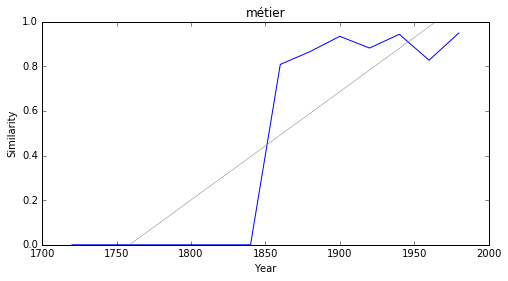

rêve


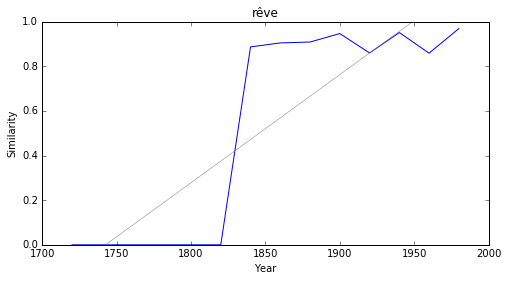

formule


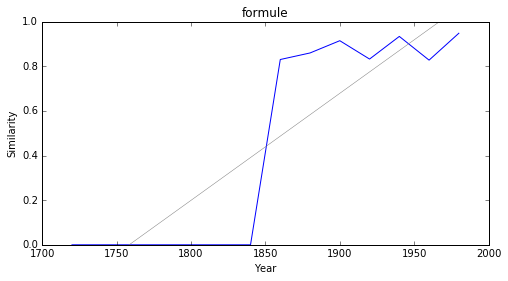

responsabilité


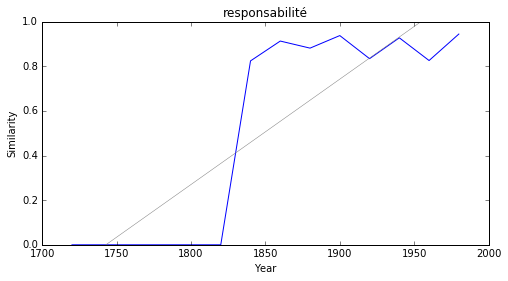

romancier


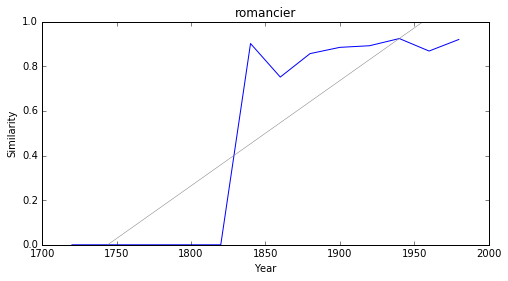

aventure


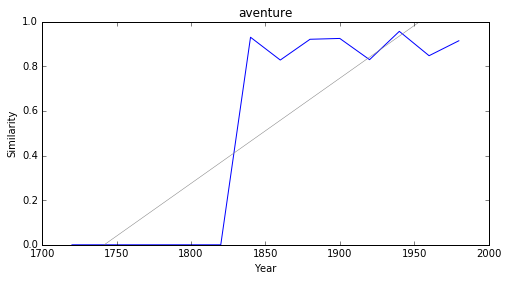

certitude


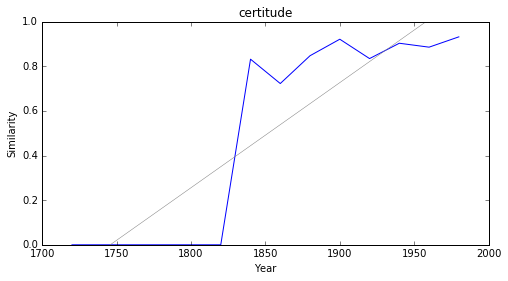

proche


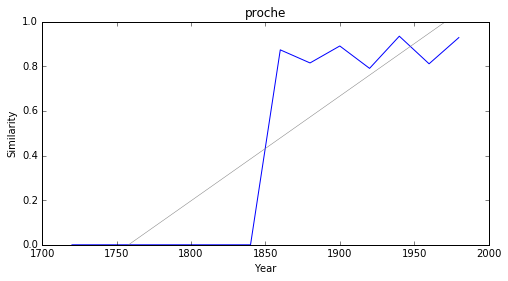

vision


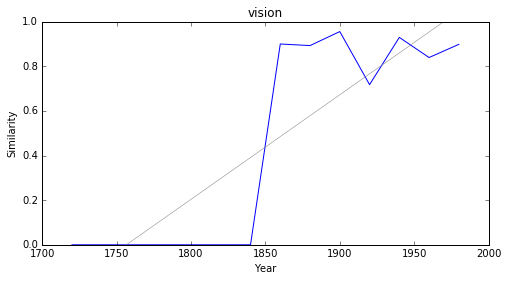

thème


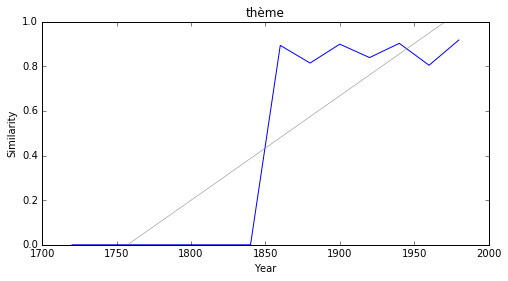

In [216]:
for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df2 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df2.sort_values('slope', ascending=True).head(10))
    print('\n\n')
    
    for i, row in df2.sort_values('slope', ascending=False).head(10).iterrows():
        plot_cosine_series('littérature', row['token'], 8, 4)

# Intersected neighbors

In this part, we show which significant terms tend to be, throughout time, the nearest neighbours to the main entry. That is to say that these vectors follow the same evolution through time as the main entry and are very near to the "littérature" vector. At this stage, we only ask for significant terms (filter above : "if fit.pvalues[1] < 0.05").

In [217]:
def intersect_neighbor_vocab(anchor, topn=2000):
    
    vocabs = []
    
    for year, model in models.items():
        similar = model.most_similar(anchor, topn=topn)
        vocabs.append(set([s[0] for s in similar]))
        
    return set.intersection(*vocabs)

In [218]:
intersect_vocab = intersect_neighbor_vocab('littérature')

In [219]:
entries={}

for word in testList:
    data = []
    for token in intersect_neighbor_vocab(word):
    
        series = cosine_series('littérature', token)
        fit = lin_reg(series)
    
        if fit.pvalues[1] < 0.05:
            data.append((token, fit.params[1], fit.pvalues[1]))
    entries[word]=data

In [220]:
import pandas as pd

### <i><b>littérature</i></b>

        token     slope         p
16   protéger -0.000775  0.007509
18     portée -0.000768  0.004673
55     ardeur -0.000767  0.000977
35      fruit -0.000764  0.002891
10       égal -0.000764  0.000680
60      élevé -0.000760  0.001536
46   conquête -0.000756  0.007120
8        arme -0.000756  0.003130
17  éducation -0.000750  0.003371
22     commun -0.000750  0.000217



protéger


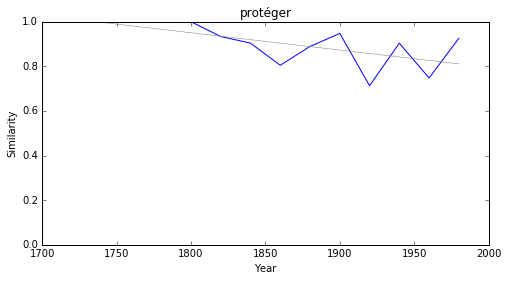

portée


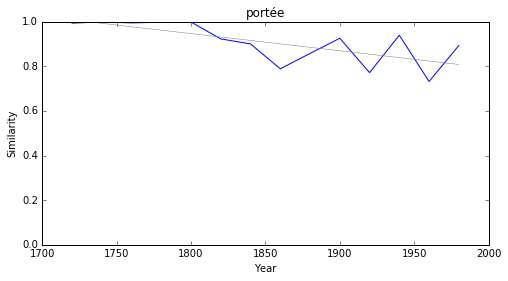

ardeur


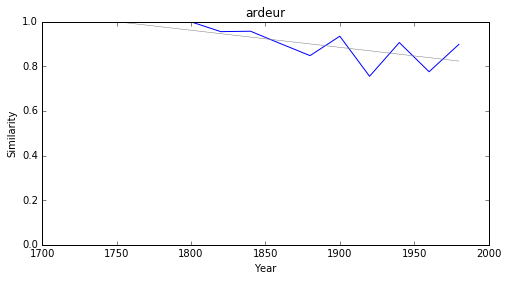

fruit


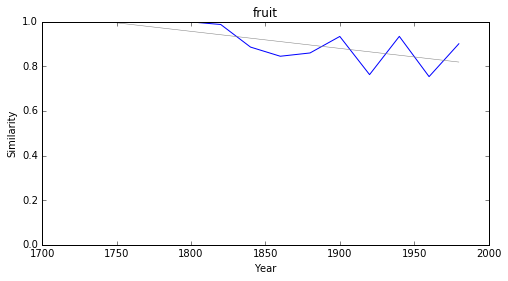

égal


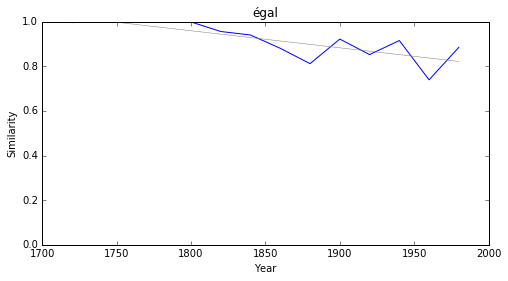

élevé


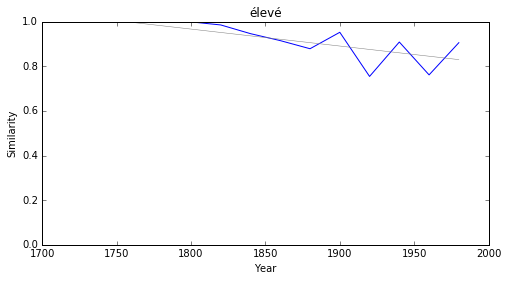

conquête


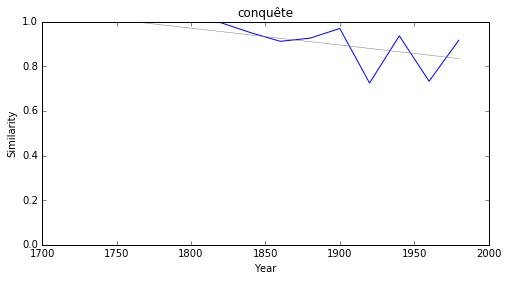

arme


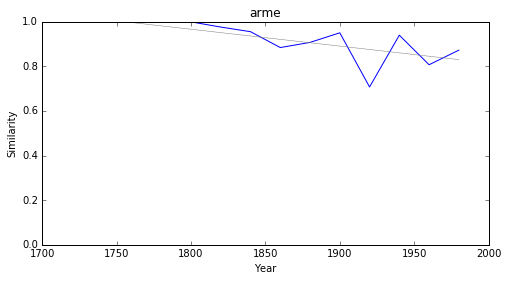

éducation


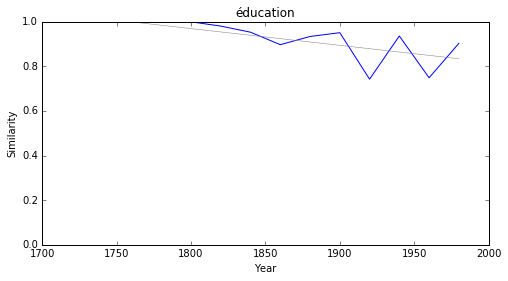

commun


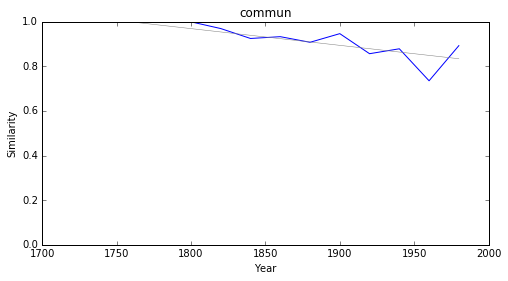

### <i><b>science</i></b>

        token     slope         p
41  politique -0.001496  0.001569
65     fonder -0.001218  0.002365
47     humain -0.001149  0.009987
51      ordre -0.001016  0.001923
18    établir -0.000970  0.001141
2   antiquité -0.000931  0.002647
21     romain -0.000929  0.000200
71     temple -0.000921  0.001371
59     prince -0.000919  0.003495
68  recherche -0.000890  0.003807



politique


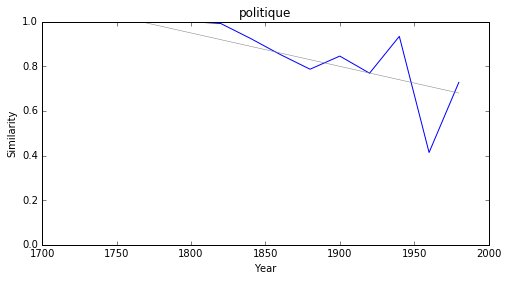

fonder


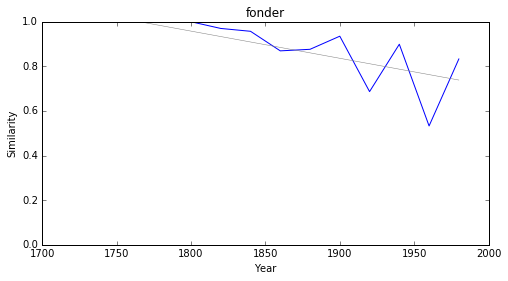

humain


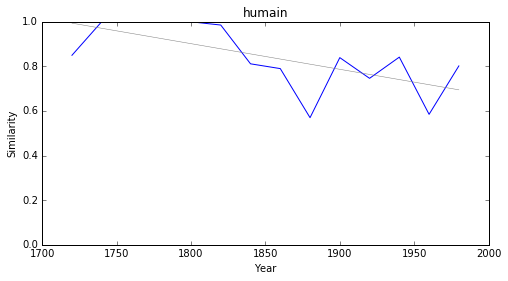

ordre


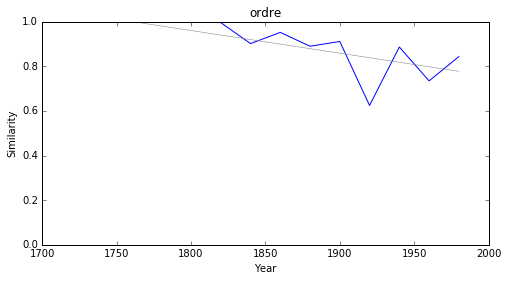

établir


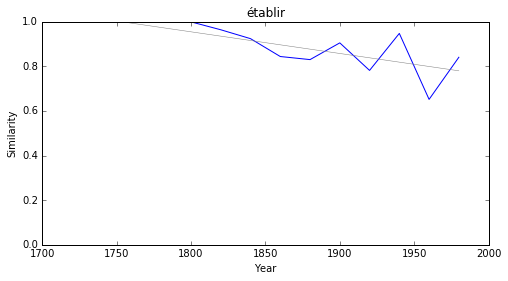

antiquité


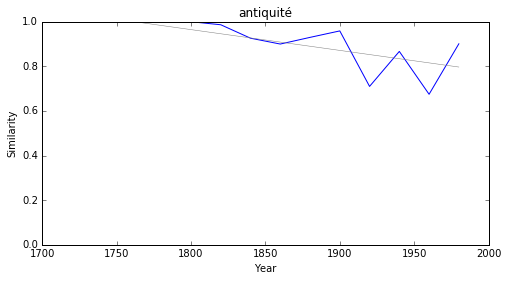

romain


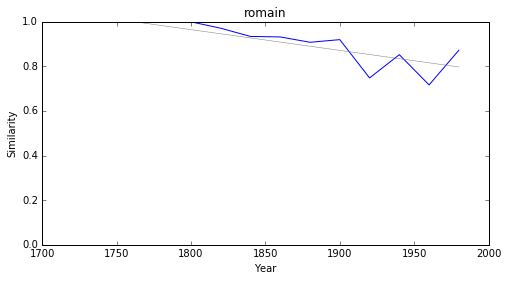

temple


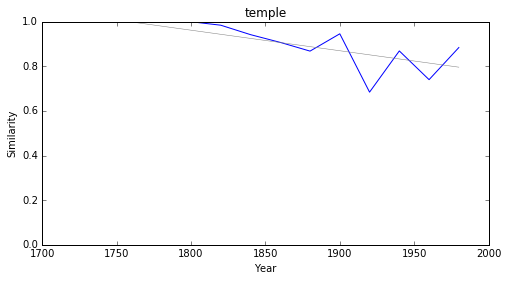

prince


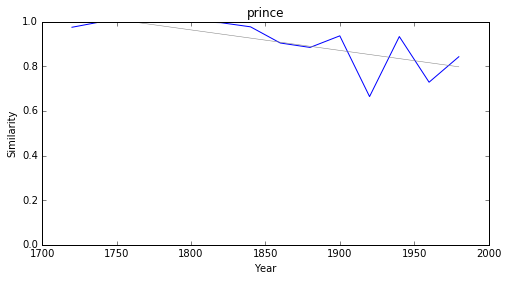

recherche


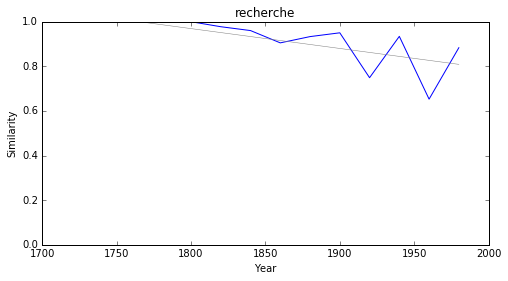

### <i><b>savoir</i></b>

       token     slope         p
47        me -0.003341  0.003828
172      non -0.003018  0.001346
173    quand -0.002854  0.003578
79   quelque -0.002849  0.002125
51    jamais -0.002761  0.003869
148     être -0.002724  0.000340
40     avoir -0.002709  0.001425
10       moi -0.002620  0.015956
150  falloir -0.002596  0.004500
94      rien -0.002590  0.006922



me


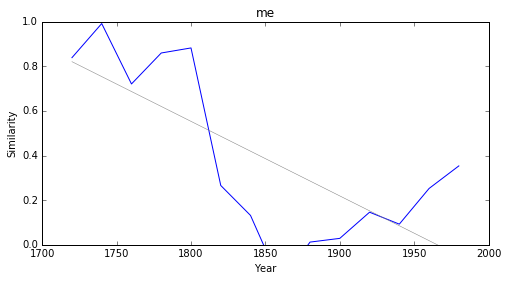

non


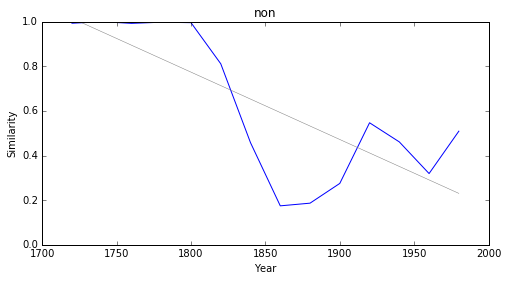

quand


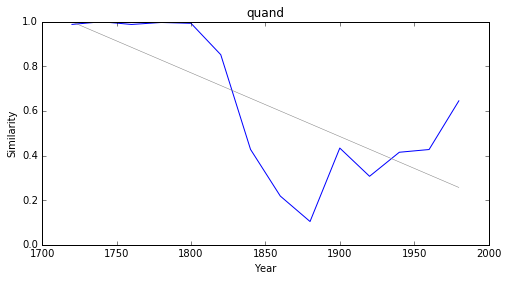

quelque


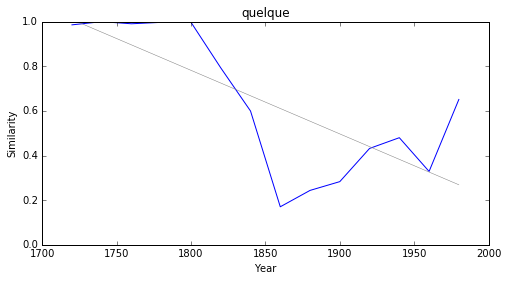

jamais


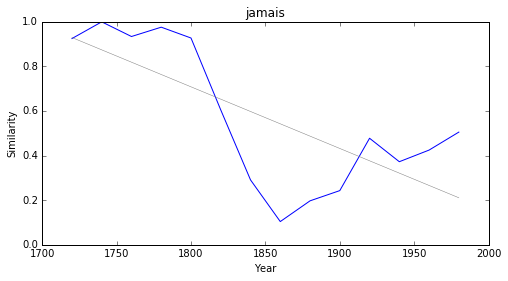

être


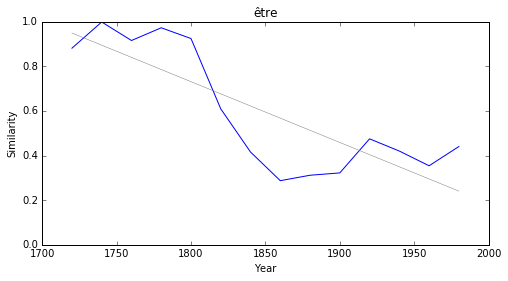

avoir


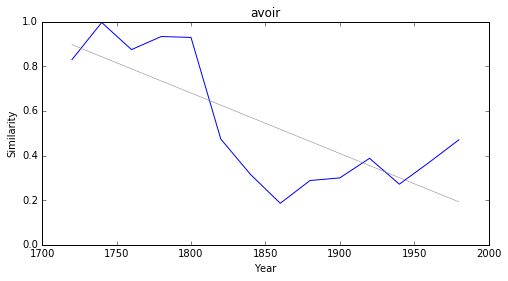

moi


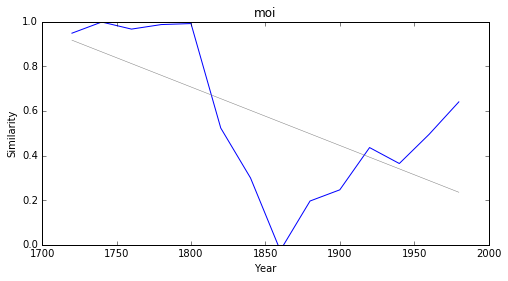

falloir


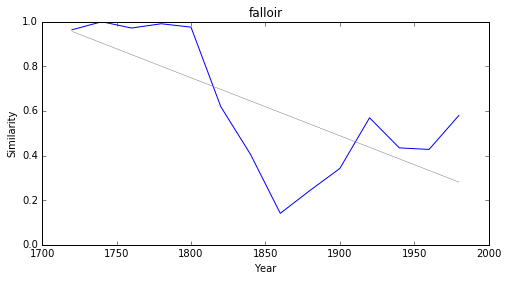

rien


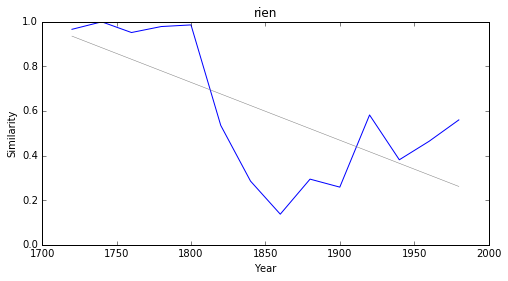

### <i><b>histoire</i></b>

        token     slope         p
81     fonder -0.001218  0.002365
1        cour -0.001055  0.005443
49    charger -0.001046  0.000174
54  assemblée -0.001027  0.012307
62     empire -0.001027  0.006126
8    glorieux -0.000993  0.000473
50    famille -0.000945  0.000254
56  antiquité -0.000931  0.002647
16     romain -0.000929  0.000200
55     temple -0.000921  0.001371



fonder


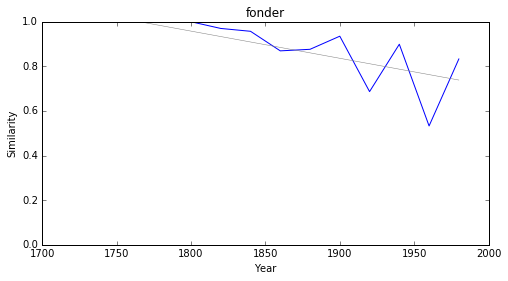

cour


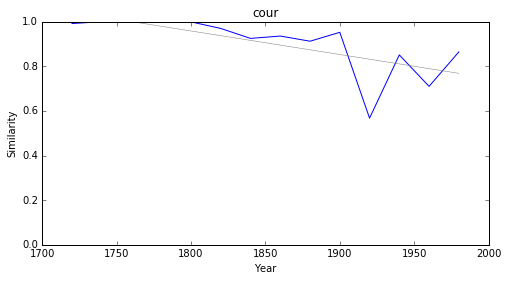

charger


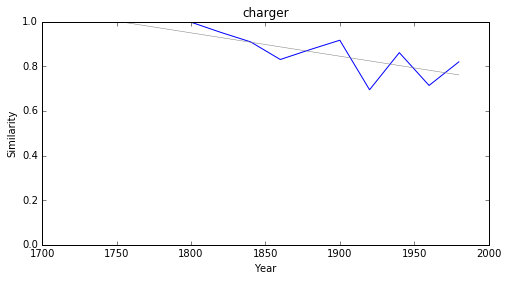

assemblée


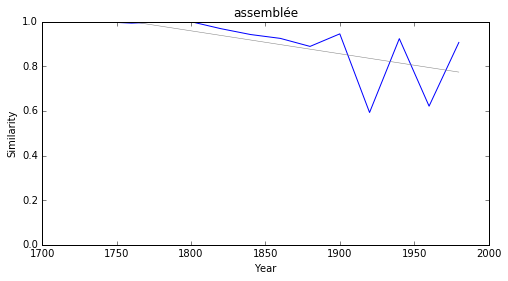

empire


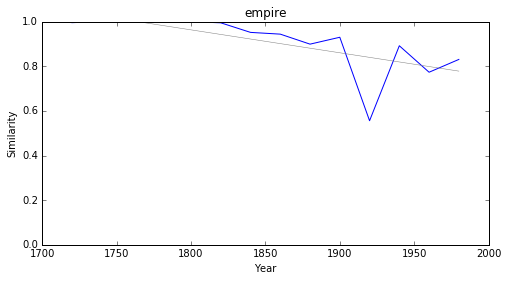

glorieux


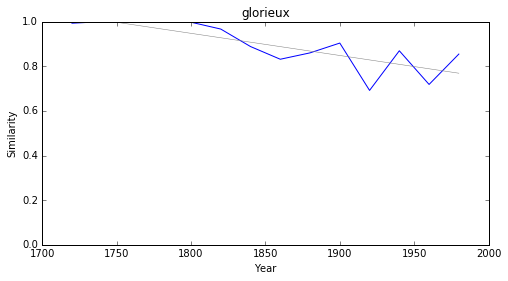

famille


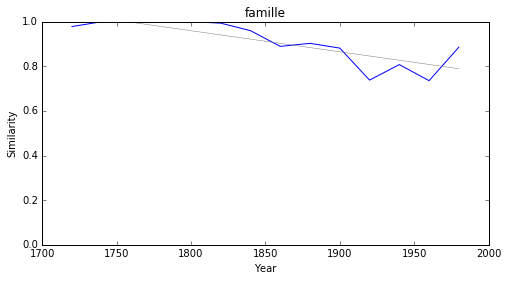

antiquité


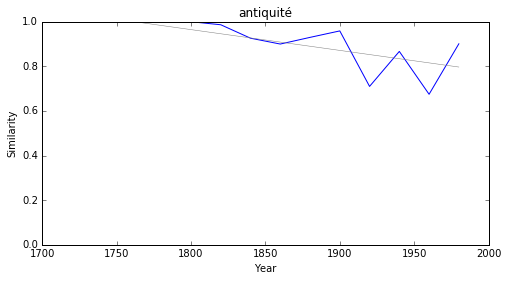

romain


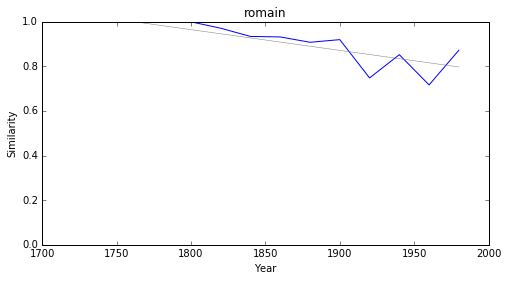

temple


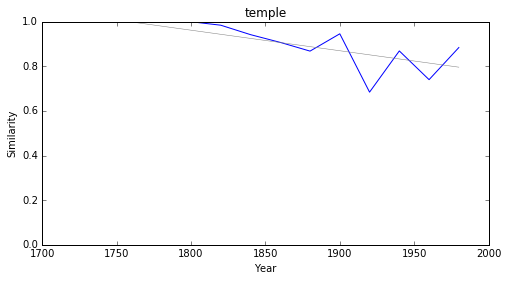

### <i><b>lettre</i></b>

        token     slope         p
35     fonder -0.001218  0.002365
20    charger -0.001046  0.000174
10   brillant -0.001014  0.001514
43  érudition -0.000997  0.000038
45        âge -0.000982  0.000364
16  souverain -0.000969  0.001717
12     romain -0.000929  0.000200
6      temple -0.000921  0.001371
33     nombre -0.000920  0.000229
30     prince -0.000919  0.003495



fonder


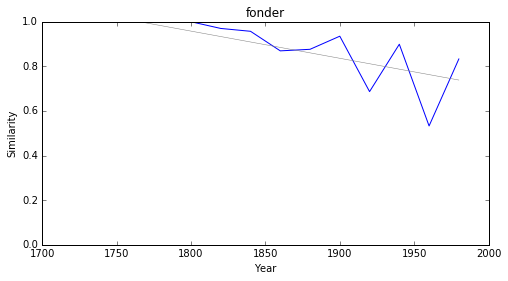

charger


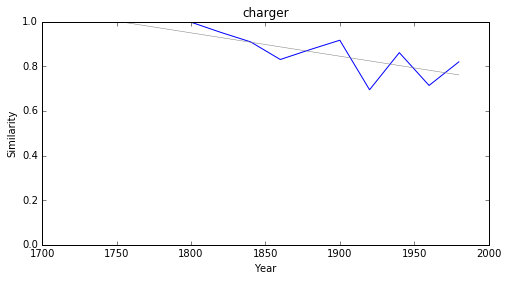

brillant


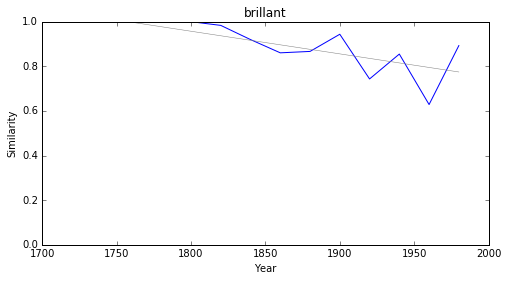

érudition


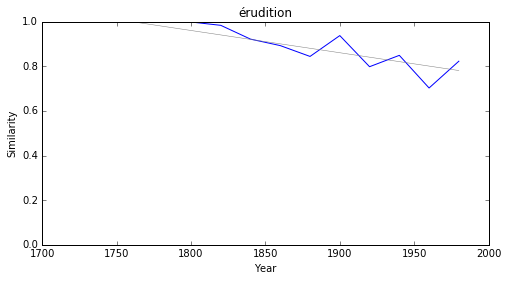

âge


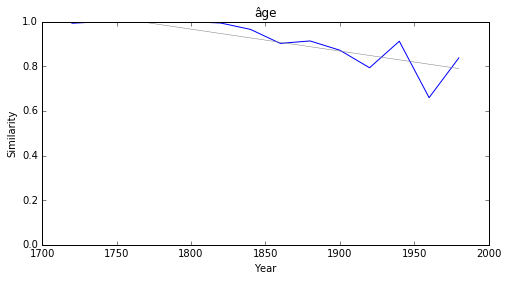

souverain


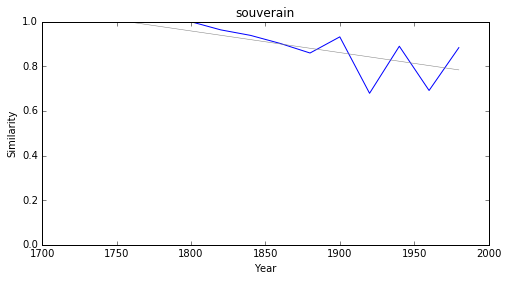

romain


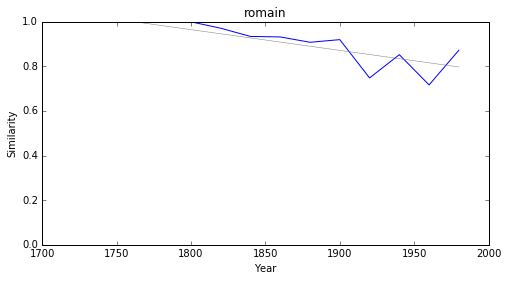

temple


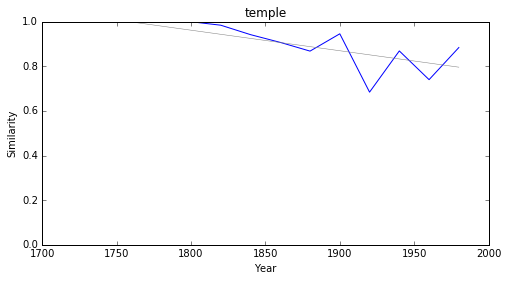

nombre


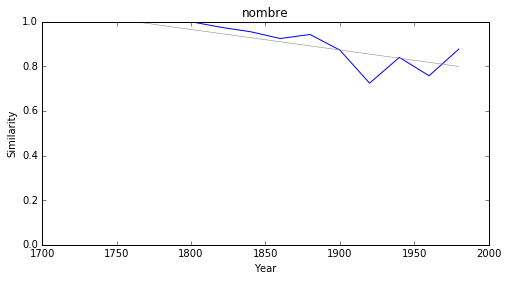

prince


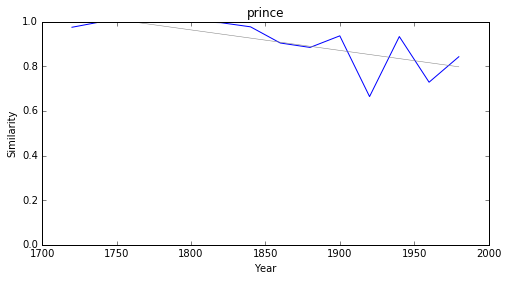

### <i><b>critique</i></b>

         token     slope         p
11     profond -0.000830  0.002056
5   réputation -0.000813  0.005772
17    fonction -0.000770  0.000503
1    véritable -0.000765  0.005760
2        fruit -0.000764  0.002891
6      marquer -0.000759  0.000663
13   réflexion -0.000753  0.002514
3       commun -0.000750  0.000217
0   perfection -0.000711  0.002249
10    autorité -0.000710  0.000975



profond


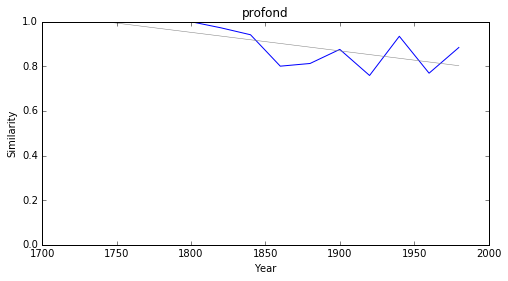

réputation


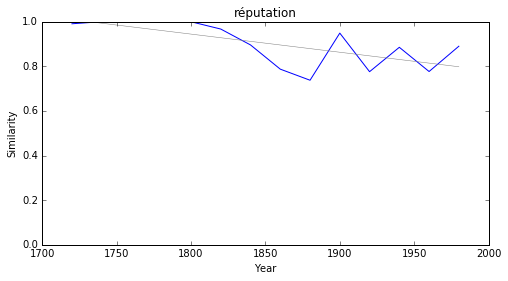

fonction


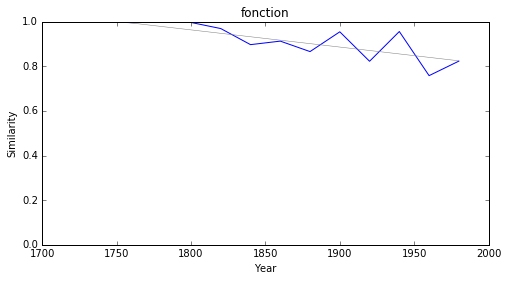

véritable


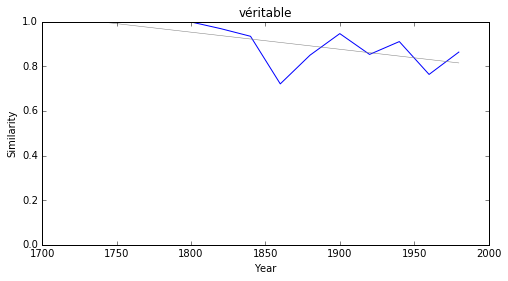

fruit


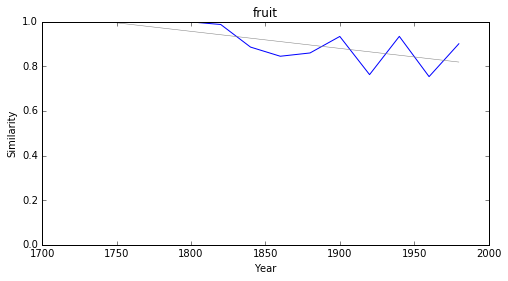

marquer


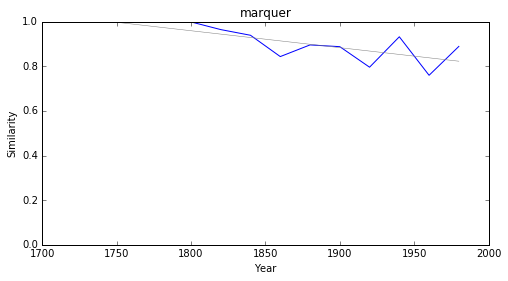

réflexion


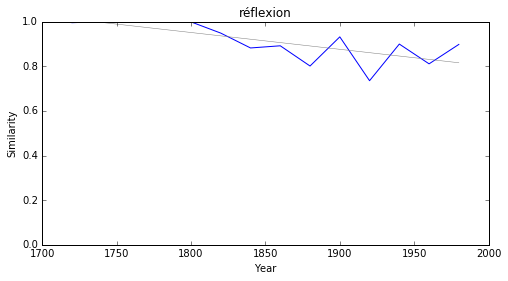

commun


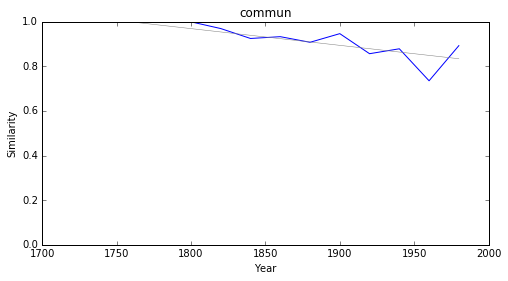

perfection


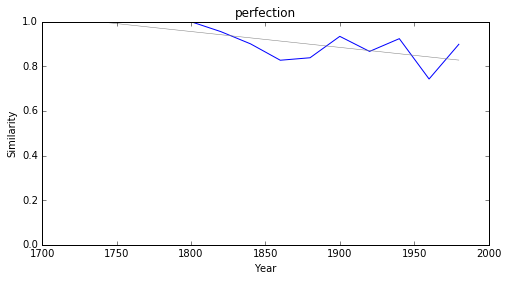

autorité


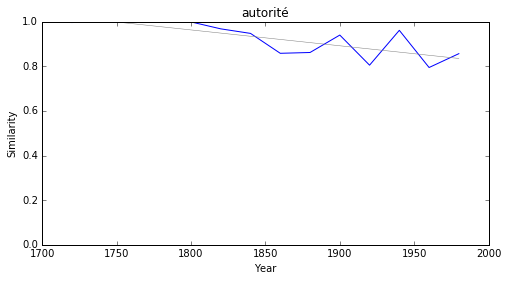

### <i><b>esprit</i></b>

       token     slope         p
109     haut -0.001509  0.000288
36    humain -0.001149  0.009987
68     ordre -0.001016  0.001923
3    établir -0.000970  0.001141
74       vif -0.000937  0.001658
13     noble -0.000934  0.000480
38   capable -0.000931  0.001350
107   plutôt -0.000920  0.004935
108   nombre -0.000920  0.000229
5     exiger -0.000899  0.009326



haut


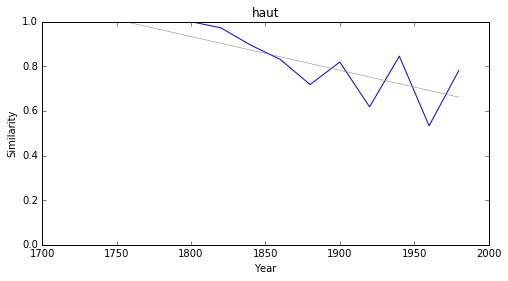

humain


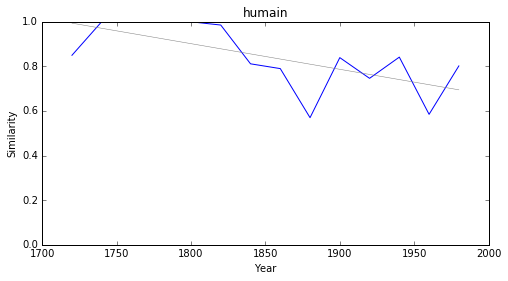

ordre


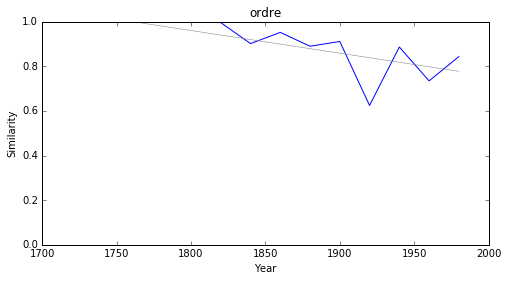

établir


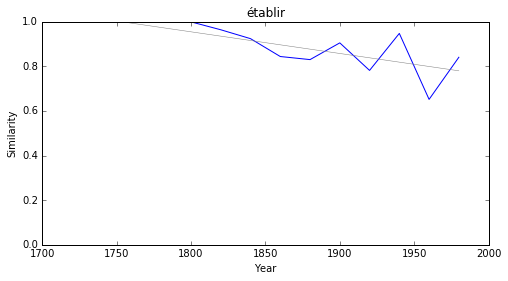

vif


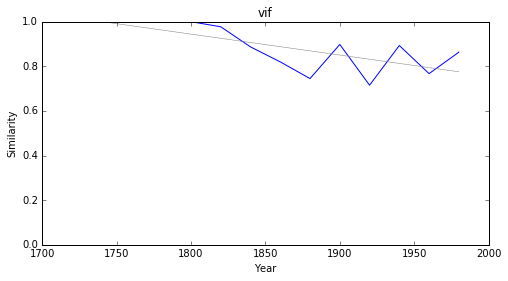

noble


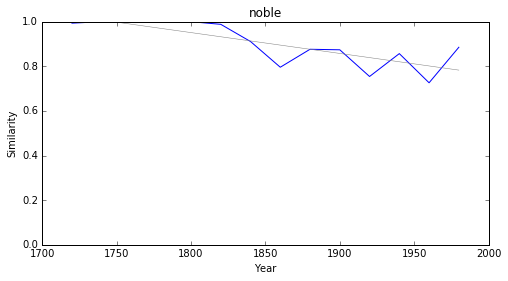

capable


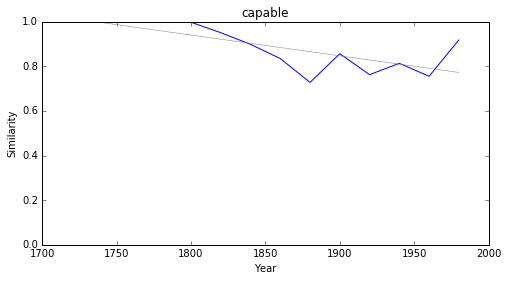

plutôt


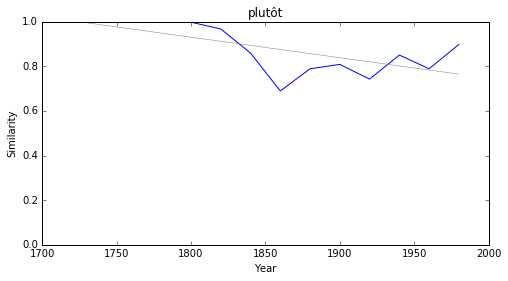

nombre


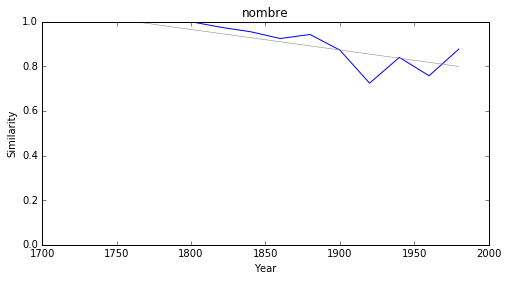

exiger


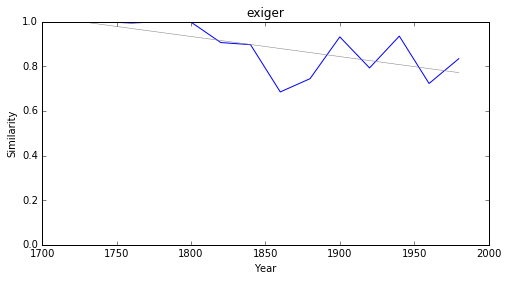

### <i><b>langue</i></b>

           token     slope         p
44       famille -0.000945  0.000254
14        romain -0.000929  0.000200
21          ciel -0.000921  0.001803
51        temple -0.000921  0.001371
78        nombre -0.000920  0.000229
53      province -0.000886  0.001376
68        moeurs -0.000846  0.000743
15  gouvernement -0.000839  0.007372
33         degré -0.000831  0.001930
10          grec -0.000812  0.004774



famille


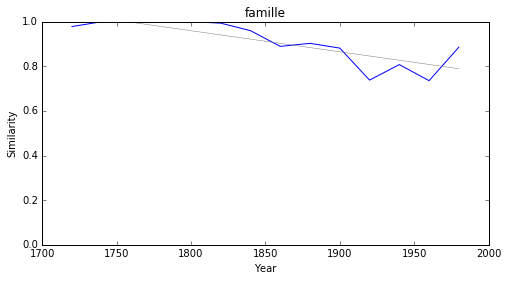

romain


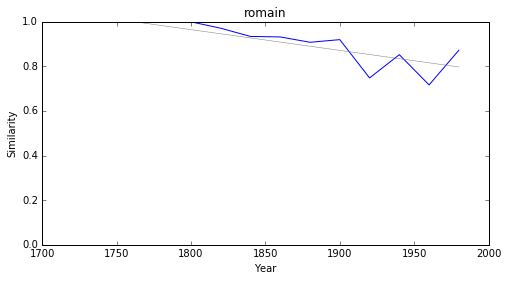

ciel


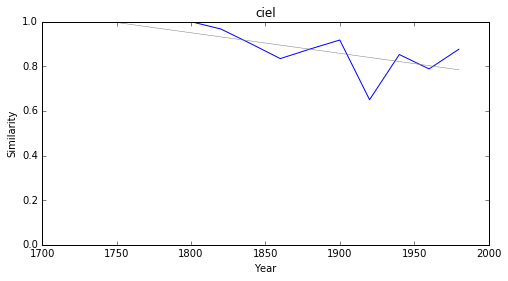

temple


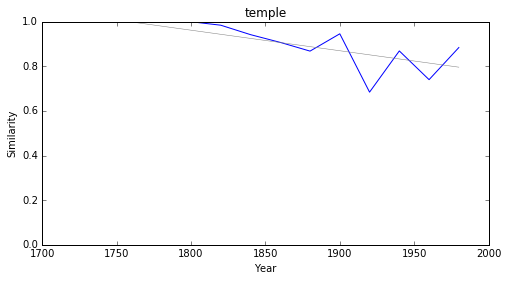

nombre


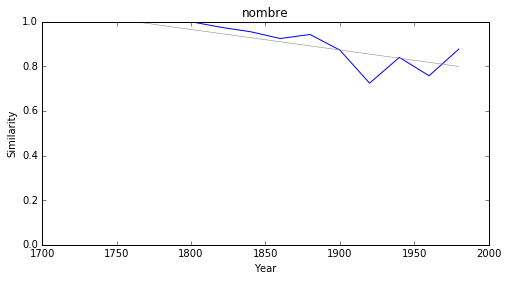

province


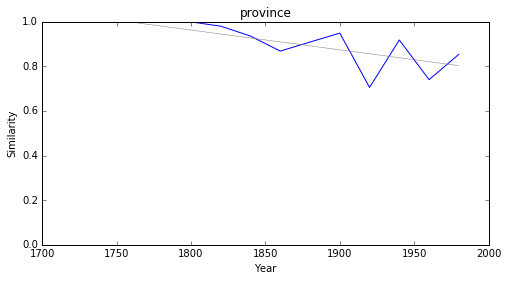

moeurs


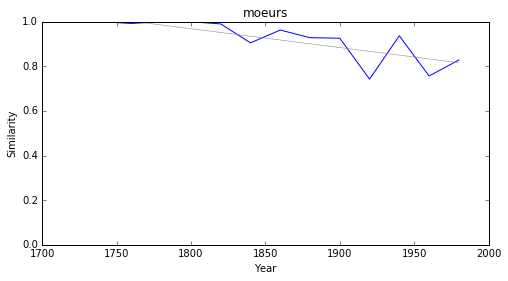

gouvernement


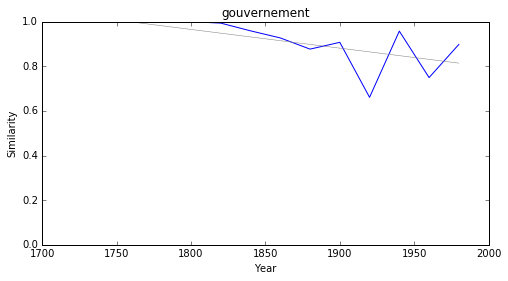

degré


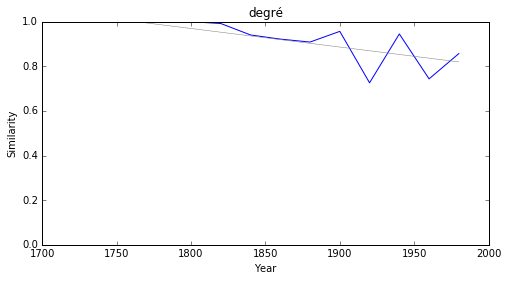

grec


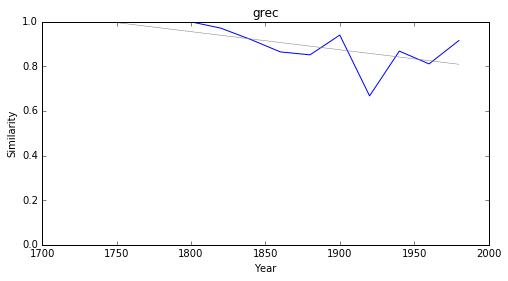

### <i><b>politique</i></b>

         token     slope         p
0         état -0.001481  0.001346
30      divers -0.001314  0.004653
48      fonder -0.001218  0.002365
37      humain -0.001149  0.009987
18  occupation -0.001110  0.001883
10      empire -0.001027  0.006126
38       ordre -0.001016  0.001923
6        corps -0.000984  0.026114
12     établir -0.000970  0.001141
23   souverain -0.000969  0.001717



état


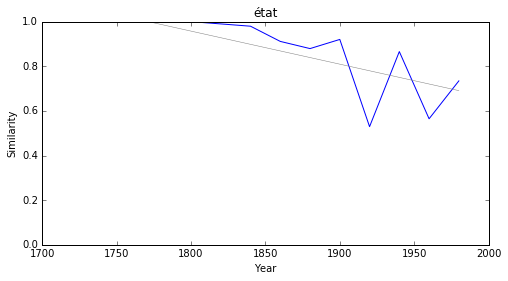

divers


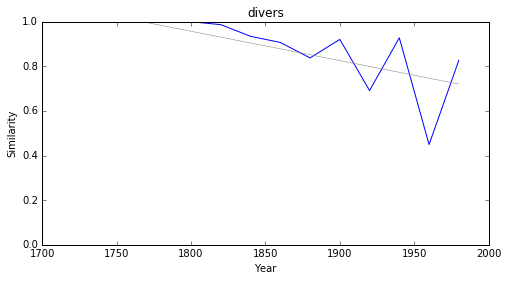

fonder


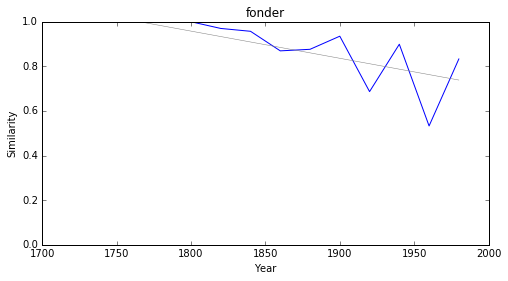

humain


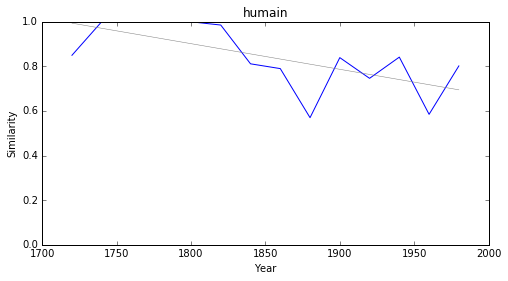

occupation


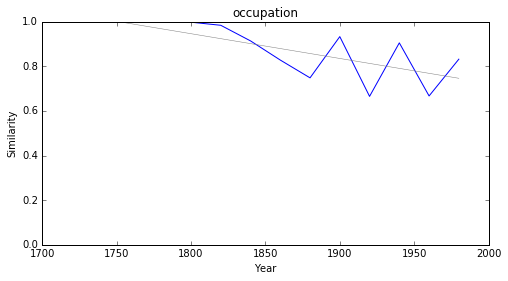

empire


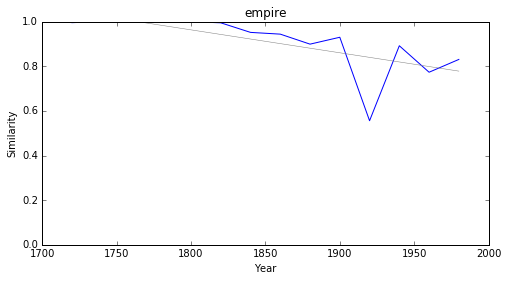

ordre


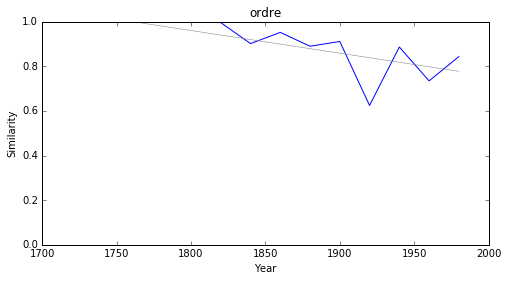

corps


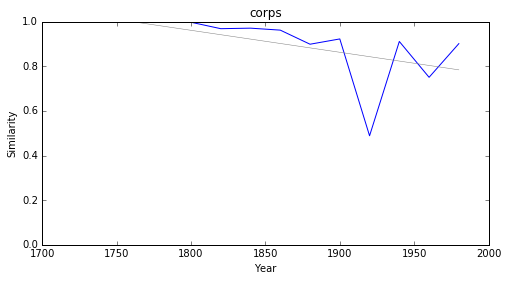

établir


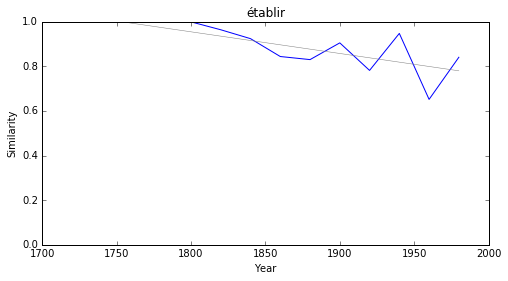

souverain


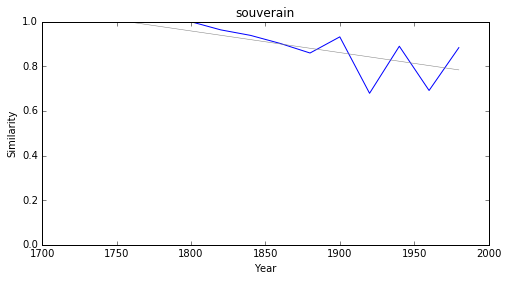

### <i><b>pouvoir</i></b>

       token     slope         p
36        se -0.003776  0.000115
23         y -0.003200  0.000746
50        on -0.002997  0.003591
157    quand -0.002854  0.003578
72   quelque -0.002849  0.002125
48    jamais -0.002761  0.003869
37     aller -0.002675  0.002832
10       moi -0.002620  0.015956
138  falloir -0.002596  0.004500
85      rien -0.002590  0.006922



se


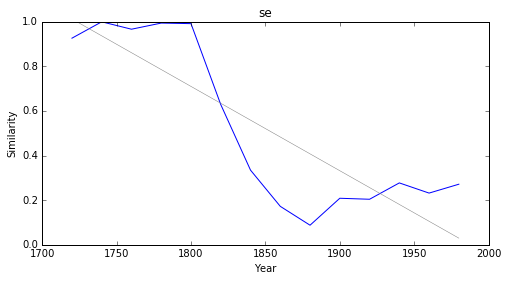

y


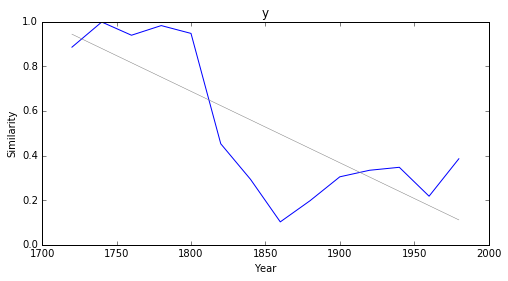

on


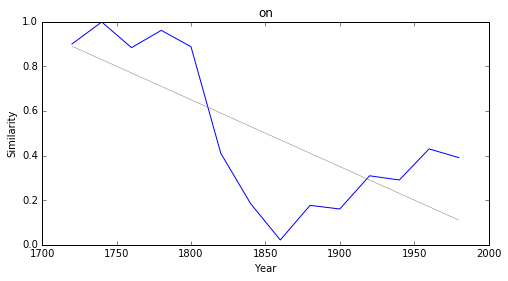

quand


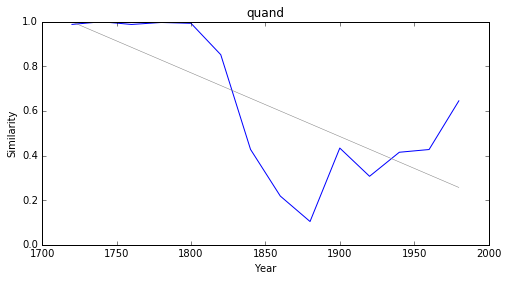

quelque


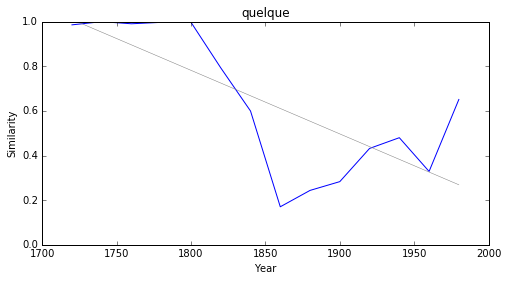

jamais


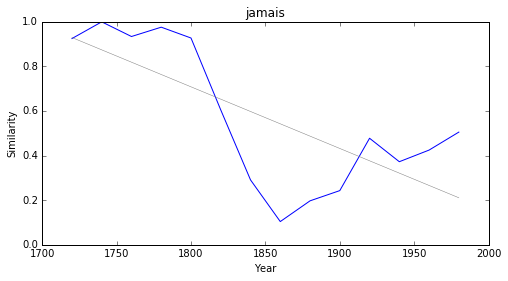

aller


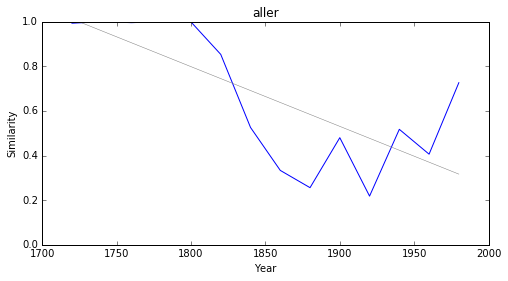

moi


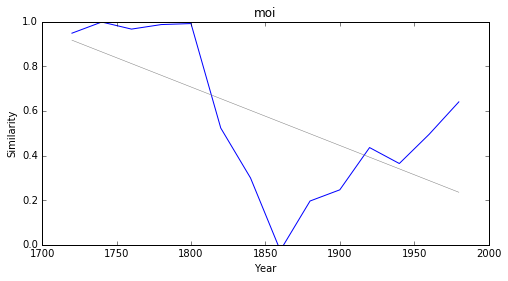

falloir


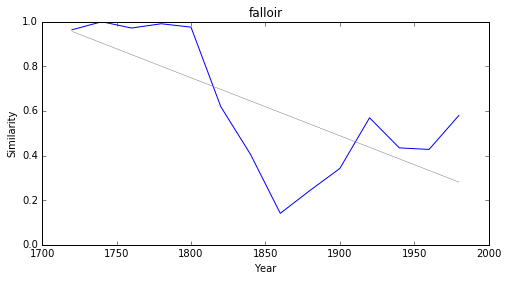

rien


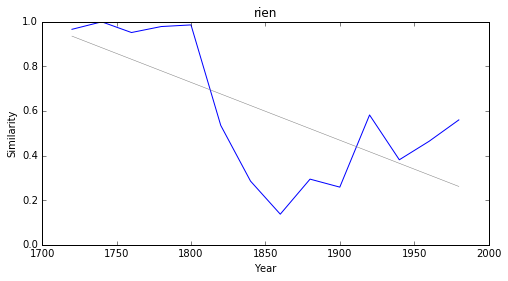

### <i><b>droit</i></b>

      token     slope         p
0    élever -0.001030  0.001966
59     prêt -0.001004  0.007566
68   offrir -0.000975  0.005804
4   établir -0.000970  0.001141
62   servir -0.000928  0.047153
30  exercer -0.000910  0.001181
33   pareil -0.000872  0.039707
91     soin -0.000861  0.003099
47   chacun -0.000849  0.045599
66   sortir -0.000849  0.013387



élever


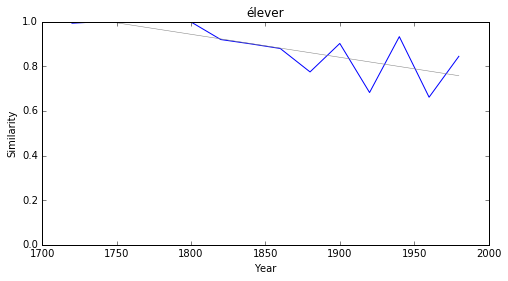

prêt


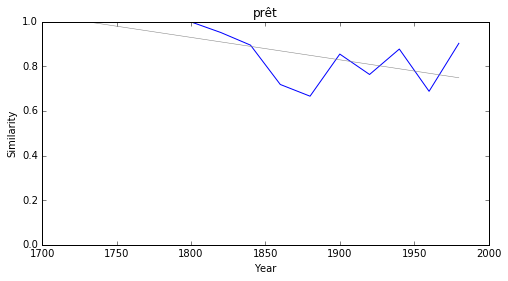

offrir


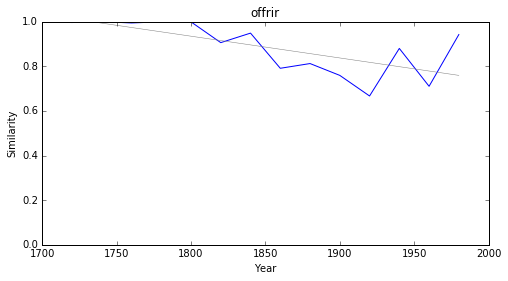

établir


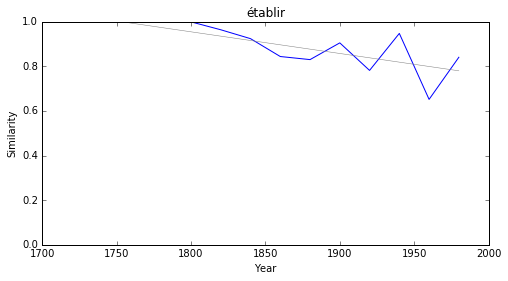

servir


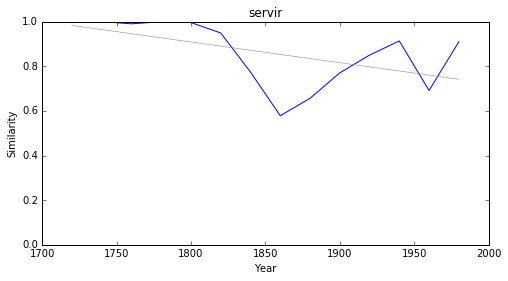

exercer


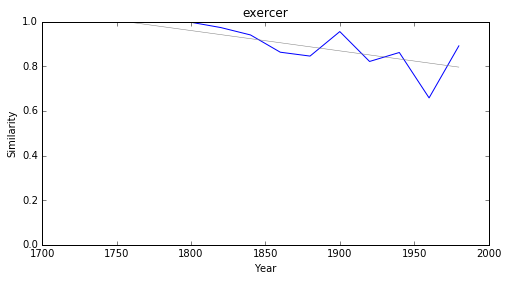

pareil


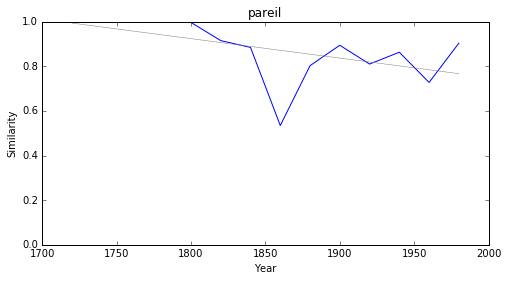

soin


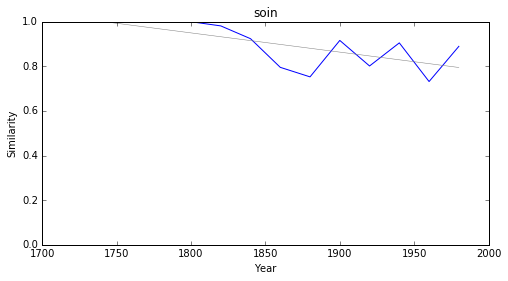

chacun


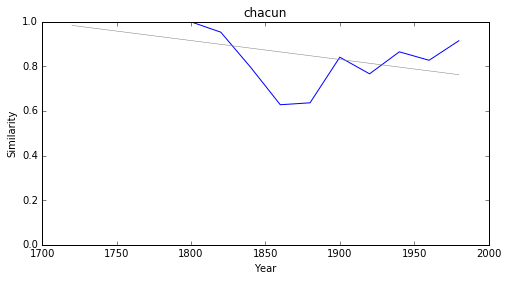

sortir


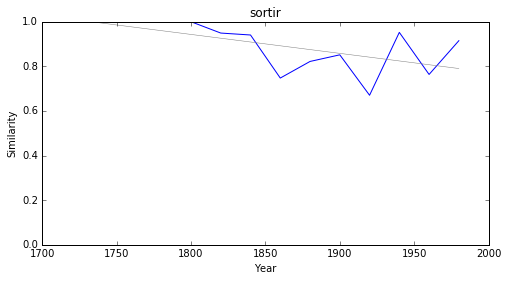

### <i><b>loi</i></b>

        token     slope         p
4       règne -0.001077  0.008000
51      ordre -0.001016  0.001923
10      corps -0.000984  0.026114
16   couronne -0.000973  0.012788
18    établir -0.000970  0.001141
30  souverain -0.000969  0.001717
27        roi -0.000954  0.042428
49    étendre -0.000925  0.017203
58     prince -0.000919  0.003495
3      projet -0.000908  0.003319



règne


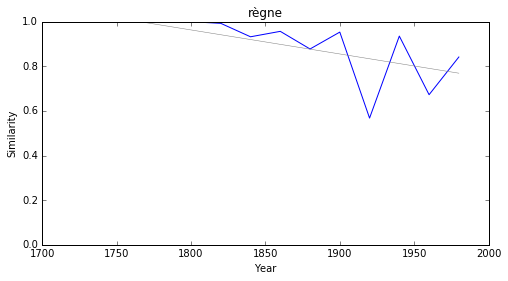

ordre


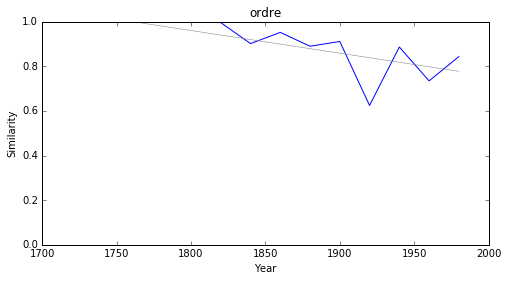

corps


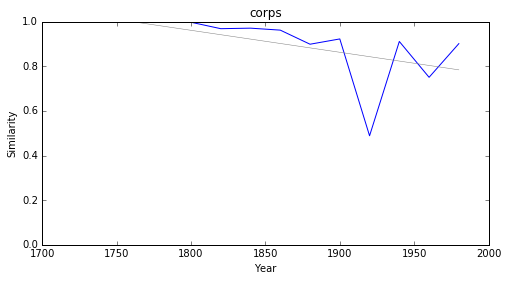

couronne


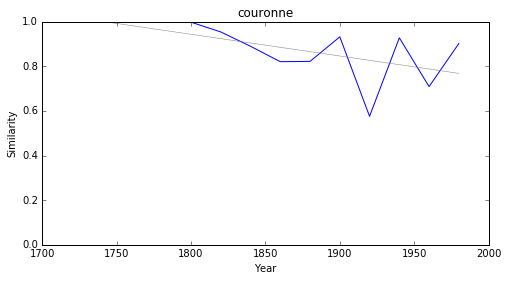

établir


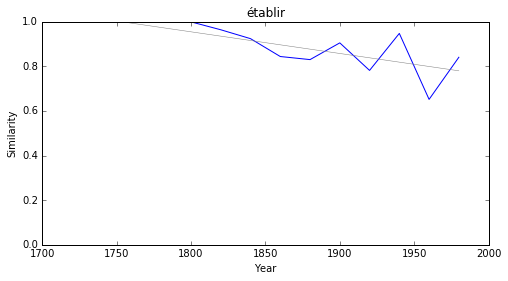

souverain


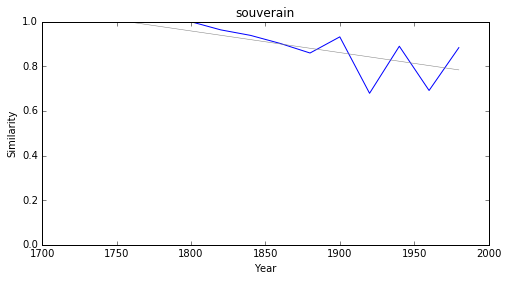

roi


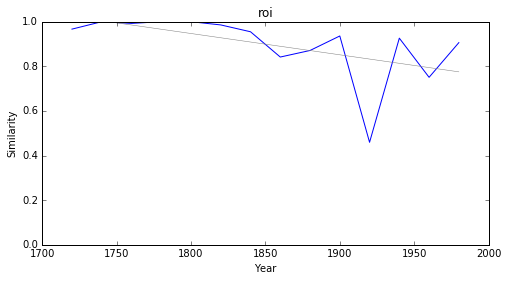

étendre


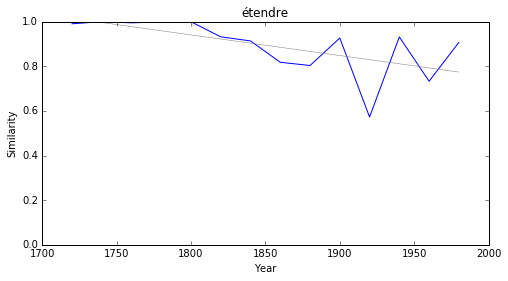

prince


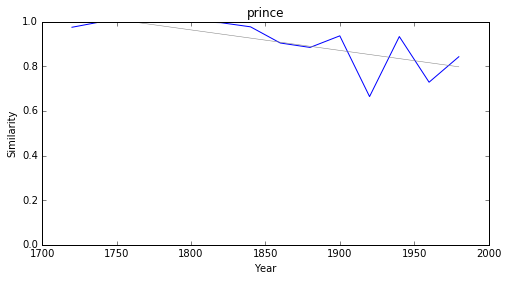

projet


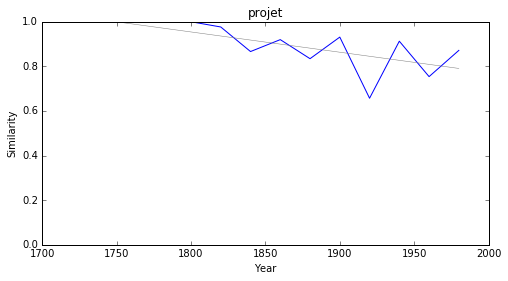

### <i><b>génie</i></b>

           token     slope         p
65     souverain -0.000969  0.001717
26       exercer -0.000910  0.001181
38           feu -0.000896  0.001696
22        former -0.000877  0.003633
34         repos -0.000847  0.001566
18         fixer -0.000846  0.003404
17  gouvernement -0.000839  0.007372
21       profond -0.000830  0.002056
10        placer -0.000827  0.006377
31           pur -0.000796  0.001517



souverain


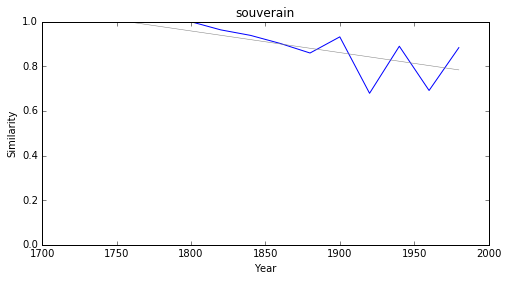

exercer


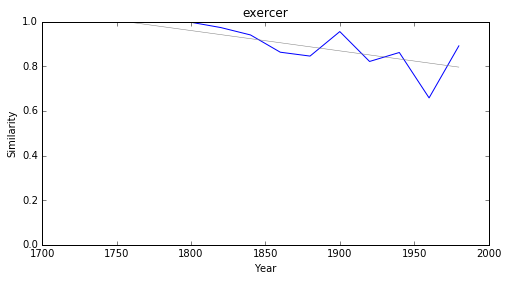

feu


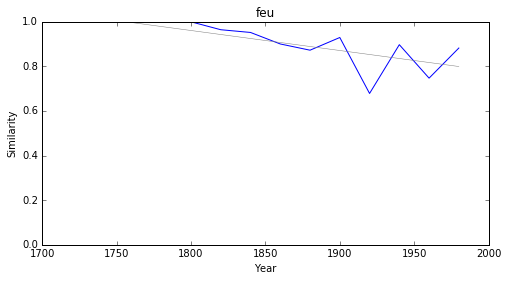

former


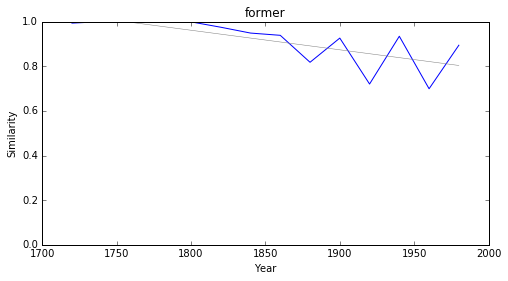

repos


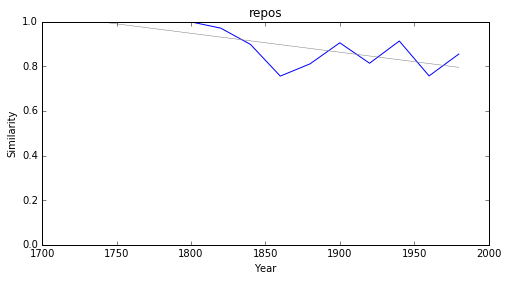

fixer


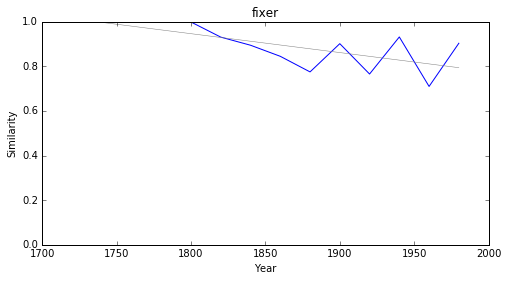

gouvernement


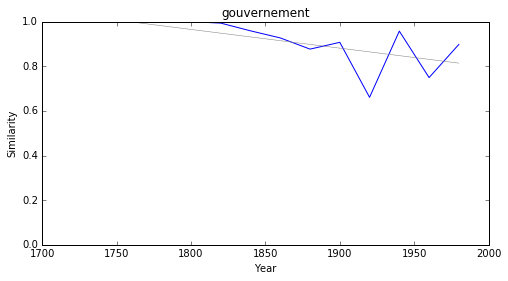

profond


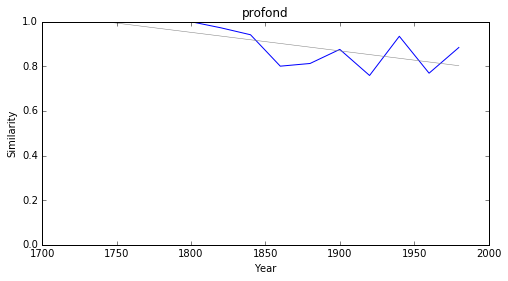

placer


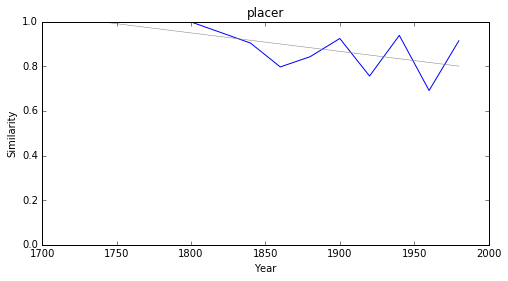

pur


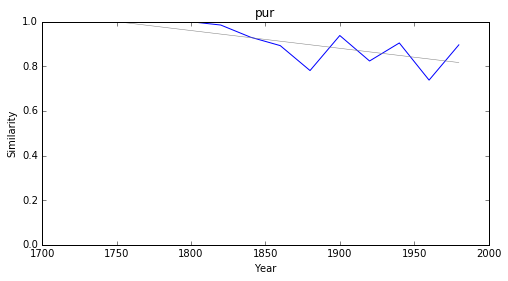

In [221]:
from IPython.display import Markdown, display

for word in testList :
    display(Markdown("### <i><b>"+word+"</i></b>"))
    df3 = pd.DataFrame(entries[word], columns=('token', 'slope', 'p'))
    print(df3.sort_values('slope', ascending=True).head(10))
    print('\n\n')
    
    for i, row in df3.sort_values('slope', ascending=True).head(10).iterrows():
        plot_cosine_series('littérature', row['token'], 8, 4)